In [1]:
# import block
# some of these may not be needed
import numpy as np
from astropy.io import fits
import pdb
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rc
import matplotlib
from astropy.visualization import hist
from datetime import datetime
from pathlib import Path
import os
from ccdproc import ImageFileCollection
import ccdproc as ccdp
from astropy.modeling.models import Polynomial1D,Chebyshev1D,Legendre1D,Hermite1D, Gaussian1D,Gaussian2D,Polynomial2D
from astropy.modeling import fitting
from astropy.stats import mad_std
from astropy.nddata import CCDData, StdDevUncertainty
from scipy import stats
from astropy import units as u
from photutils.aperture import CircularAperture,CircularAnnulus
from photutils.aperture import aperture_photometry
from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder
from astropy.table import Table
from imexam.imexamine import Imexamine
from astropy.coordinates import SkyCoord
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# grab show_image
phot_tutorial_dir = '/Users/polinapetrov/F21/ASTR8060/phot_tutorial/notebooks'
import sys
sys.path.insert(0,phot_tutorial_dir)
from convenience_functions import show_image

Ginga not installed, use other viewer, or no viewer


In [2]:
# plotting defaults
# Use custom style for larger fonts and figures
plt.style.use(phot_tutorial_dir+'/guide.mplstyle')

# Set some default parameters for the plots below"
rc('font', size=12)
rc('axes', grid=True)

In [3]:
data_dir = '/Users/polinapetrov/F21/ASTR8060/Imaging/'
reduced_dir = '/Users/polinapetrov/F21/ASTR8060/reduced_2/'

# Q1

Using imexam, measure the PSF FWHM of one of the stars in the PG1633+099 Landolt standard field. Are there significant trends or variations in the FWHM for the same star observed at different times throughout the night? How about for different stars observed at similar times but different airmasses? How about across the chip in a single exposure? Make plots to support your findings regarding the variation of the PSF with time/airmass/chip location.

In [142]:
#first looking at the same star observed at different times throughout the night
#reading in four frames (U-band) of the same field taken at different times throughout the night

files = [reduced_dir+'a081otzf.fits',reduced_dir+'a130otzf.fits',reduced_dir+'a202otzf.fits',reduced_dir+'a237otzf.fits']
hdus = [fits.open(file) for file in files]
hdrs = [hdu[0].header for hdu in hdus]
files_data = [hdu[0].data for hdu in hdus]

In [143]:
sources_all = []
for frame_data in files_data:
    mean, median, std = sigma_clipped_stats(frame_data, sigma=3.0)
    daofind = DAOStarFinder(fwhm=4.0, threshold=5.*std)
    sources = daofind(frame_data - median)
    for col in sources.colnames:  
        sources[col].info.format = '%.8g'  # for consistent table output
    sources_all.append(sources)

In [144]:
#From DS9
#For a081otzf.fits: x=1254.4521, 1222.0718
#For a130otzf.fits: x=1197.1986, y=1215.856
#For a202otzf.fits: x=1188.1456, y=1209.1798
#For a237otzf.fits: x=1100.3311, y=1210.839

x_vals = []
y_vals = []
for i in range(0,len(sources_all)):
    s = sources_all[i]
    if i == 0:
        star_ind = np.where((s['xcentroid']>1250) & (s['xcentroid']<1255) & (s['ycentroid']>1220) & (s['ycentroid']<1225))
        x_vals.append(s['xcentroid'][star_ind])
        y_vals.append(s['ycentroid'][star_ind])
    if i == 1:
        star_ind = np.where((s['xcentroid']>1195) & (s['xcentroid']<1200) & (s['ycentroid']>1212) & (s['ycentroid']<1217))
        x_vals.append(s['xcentroid'][star_ind])
        y_vals.append(s['ycentroid'][star_ind])
    if i == 2:
        star_ind = np.where((s['xcentroid']>1185) & (s['xcentroid']<1190) & (s['ycentroid']>1205) & (s['ycentroid']<1210))
        x_vals.append(s['xcentroid'][star_ind])
        y_vals.append(s['ycentroid'][star_ind])
    if i == 3:
        star_ind = np.where((s['xcentroid']>1098) & (s['xcentroid']<1103) & (s['ycentroid']>1207) & (s['ycentroid']<1212))
        x_vals.append(s['xcentroid'][star_ind])
        y_vals.append(s['ycentroid'][star_ind])

In [145]:
plots=Imexamine()

xc=1253.1318	yc=1220.7239


INFO:imexam.util:xc=1253.1318	yc=1220.7239


Background per pixel: 8.848745298960775


INFO:imexam.util:Background per pixel: 8.848745298960775


Max. pix. flux =   502.125
amp =   515.021
fwhm =     4.348


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =   502.125
amp =   515.021
fwhm =     4.348


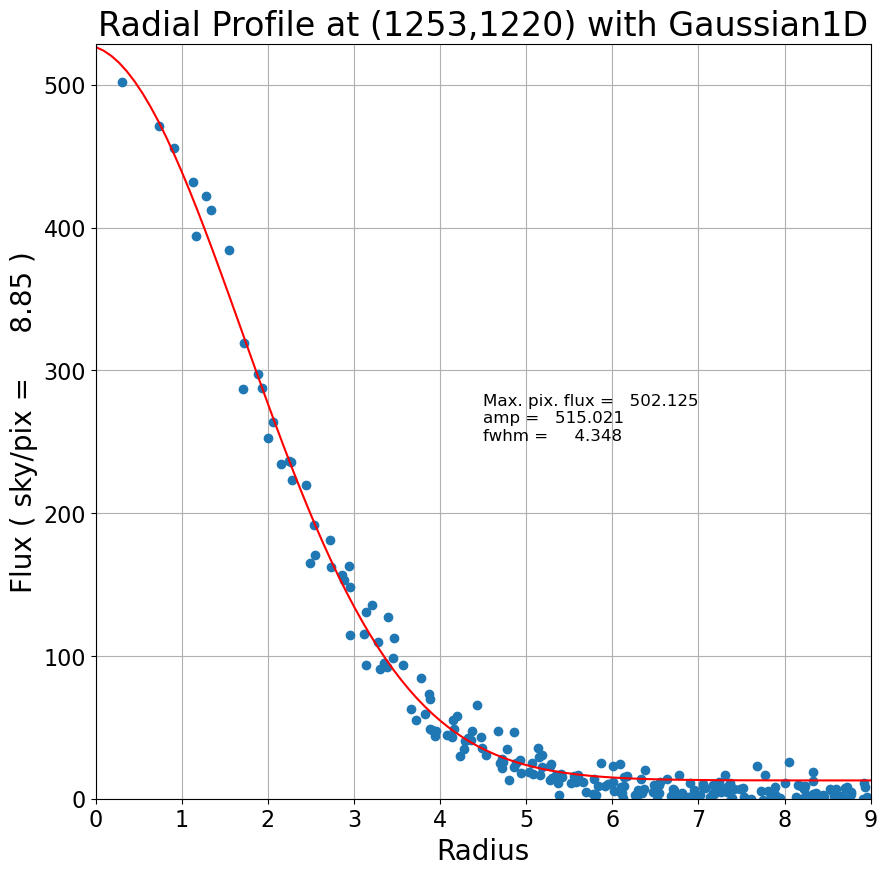

xc=1195.9159	yc=1214.6447


INFO:imexam.util:xc=1195.9159	yc=1214.6447


Background per pixel: 27.290096387513366


INFO:imexam.util:Background per pixel: 27.290096387513366


Max. pix. flux =  1830.712
amp =  2022.228
fwhm =     5.015


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  1830.712
amp =  2022.228
fwhm =     5.015


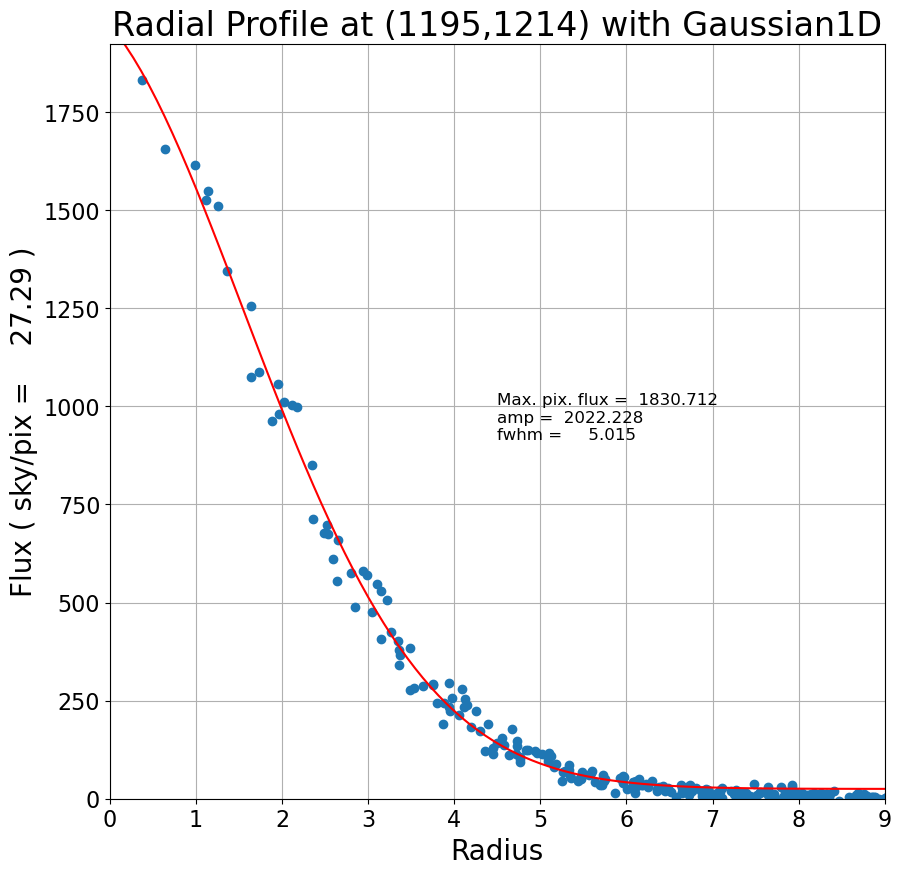

xc=1187.2135	yc=1208.3032


INFO:imexam.util:xc=1187.2135	yc=1208.3032


Background per pixel: 27.195684607516935


INFO:imexam.util:Background per pixel: 27.195684607516935


Max. pix. flux =  2388.272
amp =  2752.690
fwhm =     4.170


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  2388.272
amp =  2752.690
fwhm =     4.170


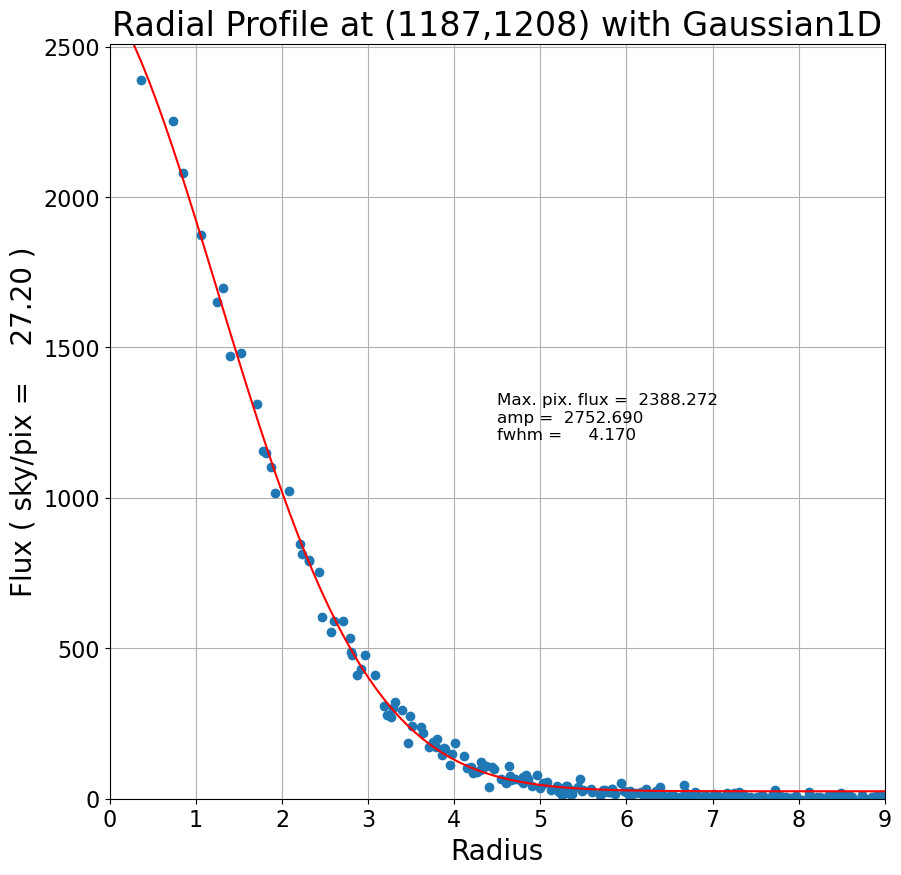

xc=1099.6745	yc=1209.7446


INFO:imexam.util:xc=1099.6745	yc=1209.7446


Background per pixel: 38.73032152553116


INFO:imexam.util:Background per pixel: 38.73032152553116


Max. pix. flux =   863.141
amp =   856.670
fwhm =     5.280


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =   863.141
amp =   856.670
fwhm =     5.280


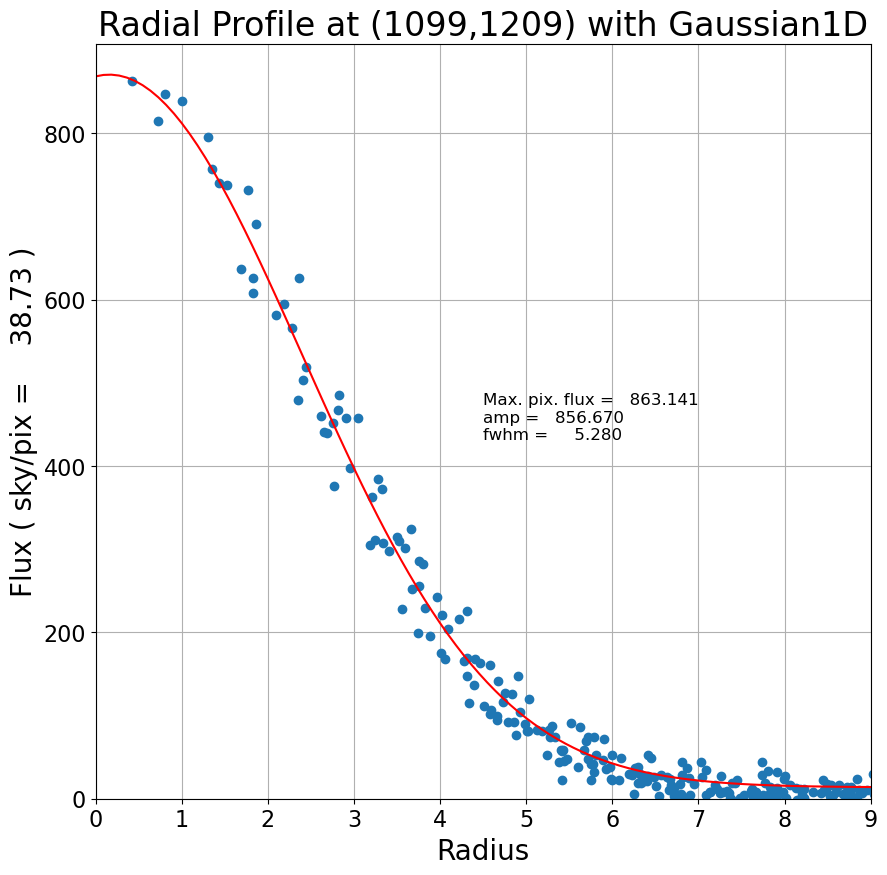

In [146]:
#plotting to find FWHM
for i in range(0,len(files_data)):
    frame_data = files_data[i]
    x = x_vals[i]
    y = y_vals[i]
    plots.radial_profile(x,y,frame_data,genplot=True)

FWHM values throughout the night are as follows:
- 4.348 at time 5:02
- 5.015 at time 6:50
- 4.170 at time 8:18
- 5.280 at time 9:35

In [147]:
#FWHM obtained from above plots
FWHM = [4.348,5.015,4.170,5.280]

#getting times
imgs = ccdp.ImageFileCollection(reduced_dir,glob_include='*otzf.fits')
pg1633_times = imgs.filter(imagetyp='science',filter='U',object='pg1633').summary['date-obs'].data.data
pg1633_times = [pg1633_times[0],pg1633_times[2],pg1633_times[4],pg1633_times[6]]
times = []
for time in pg1633_times:
    formatted = time[11:19]
    times.append(formatted)

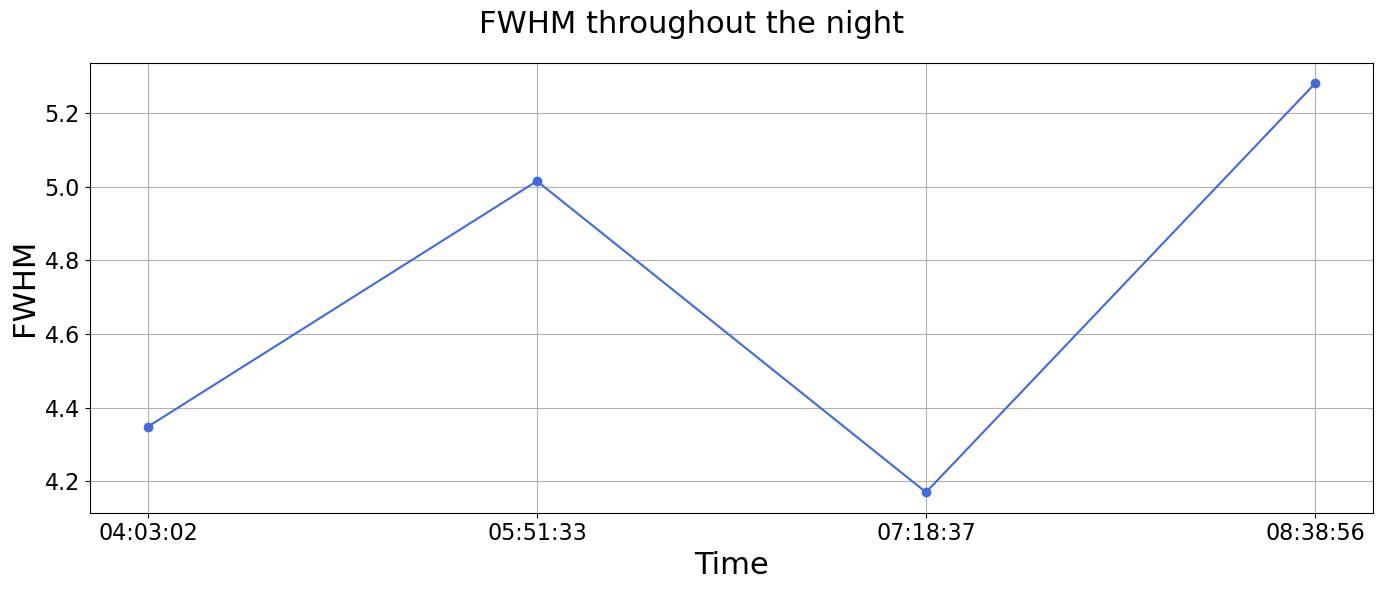

In [148]:
#plotting FWHM as a function of time
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(times,FWHM,color='royalblue',marker='o',ls='solid')
ax.set_xlabel(r'Time',fontsize=22)
ax.set_ylabel(r'FWHM',fontsize=22)
fig.suptitle('FWHM throughout the night',fontsize=22)
fig.tight_layout()

For the same star observed at different times throughout the night, there seems to be some slight fluctuations in the FWHM, but nothing greater than a 1 pixel fluctuation.

xc=956.1490	yc=1071.9061


INFO:imexam.util:xc=956.1490	yc=1071.9061


Background per pixel: 50.67311205836862


INFO:imexam.util:Background per pixel: 50.67311205836862


Max. pix. flux =  3470.795
amp = 11261.350
fwhm =    11.502


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  3470.795
amp = 11261.350
fwhm =    11.502


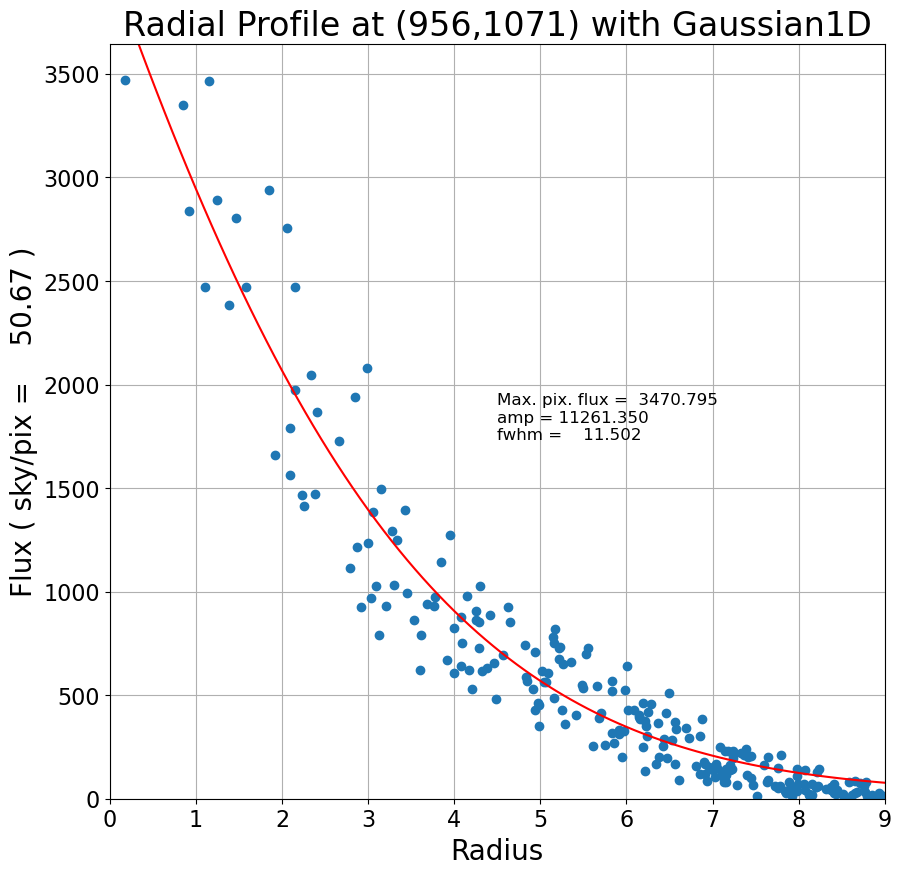

xc=961.5317	yc=1109.1289


INFO:imexam.util:xc=961.5317	yc=1109.1289


Background per pixel: 329.03329499297564


INFO:imexam.util:Background per pixel: 329.03329499297564


Max. pix. flux = 49134.944
amp = 53335.441
fwhm =     4.250


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux = 49134.944
amp = 53335.441
fwhm =     4.250


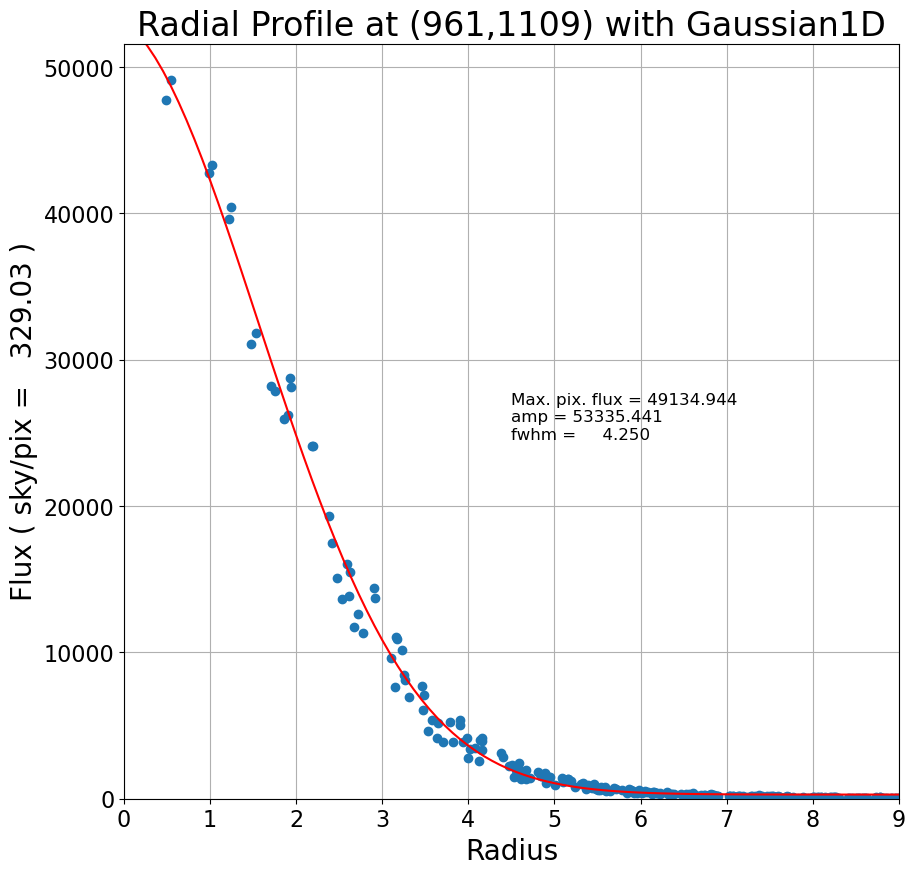

In [149]:
#next looking at different stars observed at similar times but different airmasses

#Frame 160, B-band, 7:24, X=1.09 --> x=956.61071, y=1072.7276 (from DS9)
#Frame 167, B-band, 7:31, X=1.75 --> x=962.57081 , y=1110.5867 (from DS9)

diff_airmass_files1 = [reduced_dir+'a160otzf.fits',reduced_dir+'a167otzf.fits']
hdus = [fits.open(file) for file in diff_airmass_files1]
data = [hdu[0].data for hdu in hdus]

sources1 = []
for frame in data:
    mean, median, std = sigma_clipped_stats(frame, sigma=3.0)
    daofind = DAOStarFinder(fwhm=4.0, threshold=5.*std)
    sources = daofind(frame - median)
    for col in sources.colnames:  
        sources[col].info.format = '%.8g'  # for consistent table output
    sources1.append(sources)

x_vals = []
y_vals = []
for i in range(0,len(sources1)):
    s = sources1[i]
    if i == 0:
        star_ind = np.where((s['xcentroid']>946) & (s['xcentroid']<966) & (s['ycentroid']>1062) & (s['ycentroid']<1082))
        x_vals.append(s['xcentroid'][star_ind])
        y_vals.append(s['ycentroid'][star_ind])
    if i == 1:
        star_ind = np.where((s['xcentroid']>952) & (s['xcentroid']<972) & (s['ycentroid']>1100) & (s['ycentroid']<1120))
        x_vals.append(s['xcentroid'][star_ind])
        y_vals.append(s['ycentroid'][star_ind])

for i in range(0,len(data)):
    frame_data = data[i]
    x = x_vals[i]
    y = y_vals[i]
    plots.radial_profile(x,y,frame_data,genplot=True)

Shown above:
- NGC6823 in B-band, taken at 7:24 with airmass X=1.09 --> FWHM = 11.502
- M16 in B-band, taken at 7:31 with airmass X=1.75 --> FWHM = 4.250

xc=980.7339	yc=1030.4812


INFO:imexam.util:xc=980.7339	yc=1030.4812


Background per pixel: 77.60435614588017


INFO:imexam.util:Background per pixel: 77.60435614588017


Max. pix. flux =  4296.187
amp =  5786.547
fwhm =     4.581


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  4296.187
amp =  5786.547
fwhm =     4.581


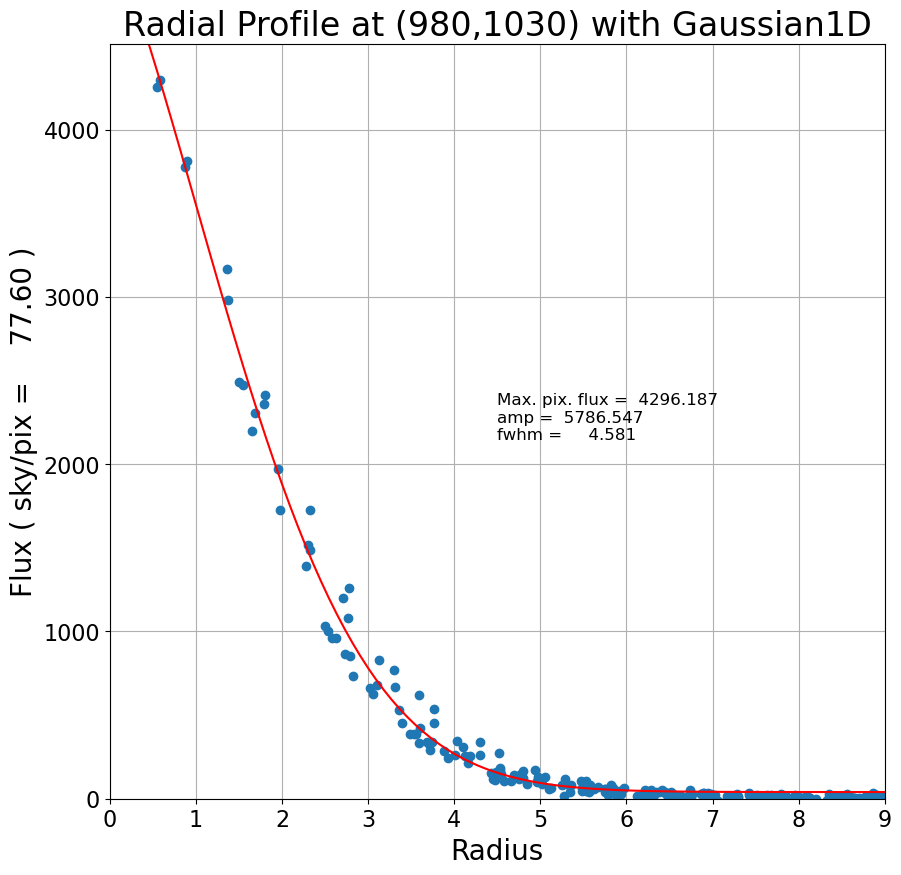

xc=956.6202	yc=995.1430


INFO:imexam.util:xc=956.6202	yc=995.1430


Background per pixel: 200.6268070308925


INFO:imexam.util:Background per pixel: 200.6268070308925


Max. pix. flux =  2944.068
amp =  3116.168
fwhm =     3.776


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  2944.068
amp =  3116.168
fwhm =     3.776


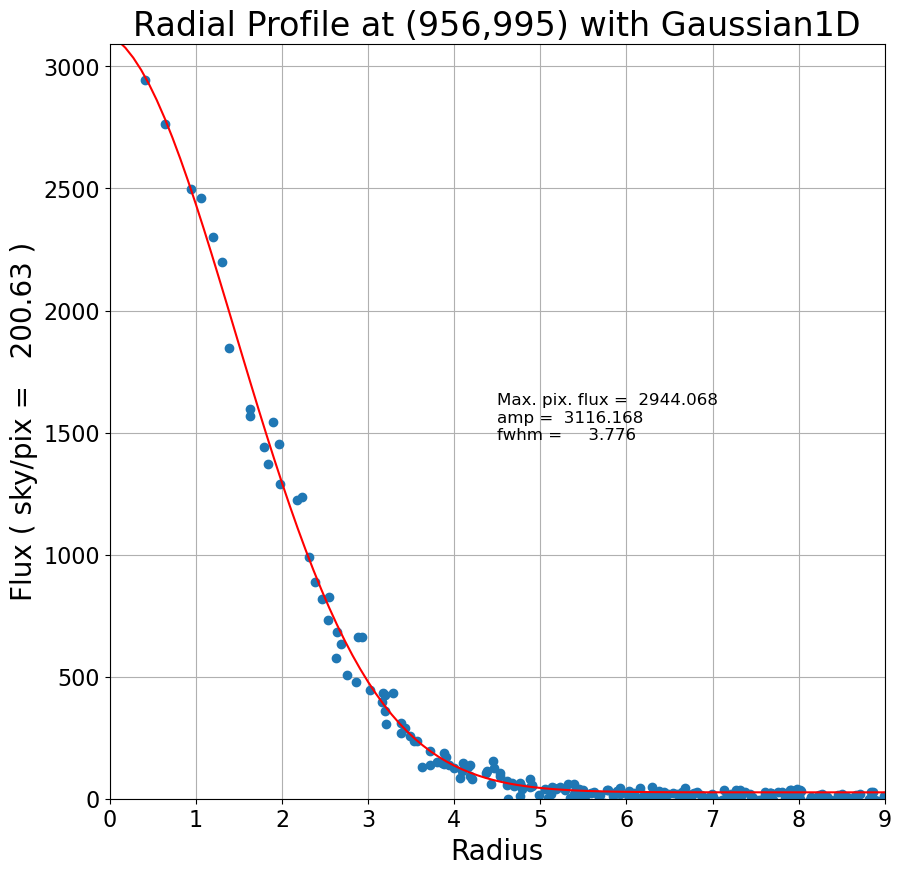

In [150]:
#Frame 204, B-band, 8:18, X=1.51 --> x=981.53488, y=1031.8047 (from DS9)
#Frame 219, B-band, 8:31, X=1.70 --> x=957.47298 , y=996.22047 (from DS9)

diff_airmass_files2 = [reduced_dir+'a204otzf.fits',reduced_dir+'a219otzf.fits']
hdus = [fits.open(file) for file in diff_airmass_files2]
data = [hdu[0].data for hdu in hdus]

sources2 = []
for frame in data:
    mean, median, std = sigma_clipped_stats(frame, sigma=3.0)
    daofind = DAOStarFinder(fwhm=4.0, threshold=5.*std)
    sources = daofind(frame - median)
    for col in sources.colnames:  
        sources[col].info.format = '%.8g'  # for consistent table output
    sources2.append(sources)

x_vals = []
y_vals = []
for i in range(0,len(sources2)):
    s = sources2[i]
    if i == 0:
        star_ind = np.where((s['xcentroid']>971) & (s['xcentroid']<991) & (s['ycentroid']>1021) & (s['ycentroid']<1041))
        x_vals.append(s['xcentroid'][star_ind])
        y_vals.append(s['ycentroid'][star_ind])
    if i == 1:
        star_ind = np.where((s['xcentroid']>947) & (s['xcentroid']<967) & (s['ycentroid']>986) & (s['ycentroid']<1006))
        x_vals.append(s['xcentroid'][star_ind])
        y_vals.append(s['ycentroid'][star_ind])
        
for i in range(0,len(data)):
    frame_data = data[i]
    x = x_vals[i]
    y = y_vals[i]
    plots.radial_profile(x,y,frame_data,genplot=True)

Shown above:
- PG1633 in B-band, taken at 8:18 with airmass X=1.51 --> FWHM = 4.581
- M101 in B-band, taken at 8:31 with airmass X=1.70 --> FWHM = 3.776

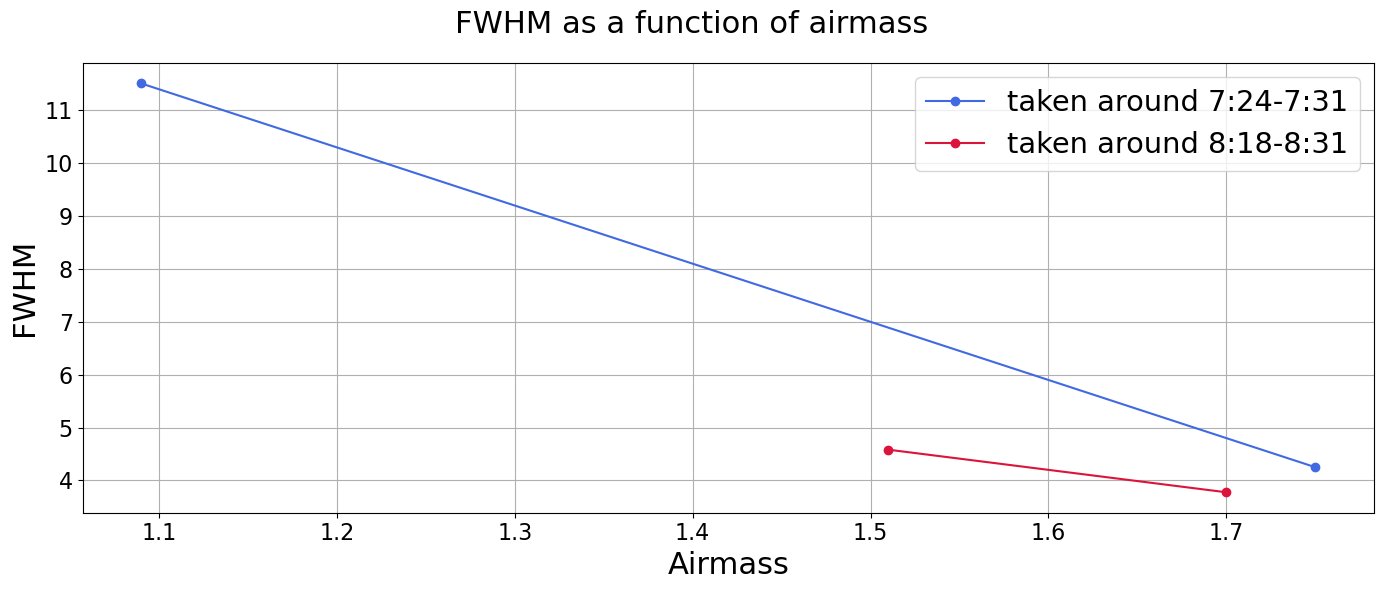

In [151]:
FWHM = [11.502,4.250,4.581,3.776]
airmass = [1.09,1.75,1.51,1.70]

#plotting FWHM as a function of airmass, looking at two different time frames
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(airmass[0:2],FWHM[0:2],color='royalblue',marker='o',ls='solid', label='taken around 7:24-7:31')
ax.plot(airmass[2:4],FWHM[2:4],color='crimson',marker='o',ls='solid', label='taken around 8:18-8:31')
ax.set_xlabel(r'Airmass',fontsize=22)
ax.set_ylabel(r'FWHM',fontsize=22)
ax.legend()
fig.suptitle('FWHM as a function of airmass',fontsize=22)
fig.tight_layout()

For different stars observed at similar times but different airmasses, the FWHM seems to be greater with lower airmass. This is surprising, considering that we would expect the FWHM to increase when the airmass increases. The discrepancy here might be due to a lack of images that were taken very closely in time but very different in airmass (as airmass will change throughout the night). Could also be related to the stars I chose in each image.

In [152]:
#Trends in FWHM across the chip in a single exposure

file = reduced_dir+'a083otzf.fits'
data = fits.open(file)[0].data

mean, median, std = sigma_clipped_stats(data, sigma=3.0)
daofind = DAOStarFinder(fwhm=4.0, threshold=5.*std)
sources = daofind(data - median)
for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)

 id xcentroid ycentroid  sharpness  ... sky    peak      flux       mag     
--- --------- ---------- ---------- ... --- --------- --------- ------------
  1 874.46931 0.79416101  0.3858523 ...   0 16382.219 376.51245   -6.4394484
  2 688.73532  3.7624534  0.5759543 ...   0 209.79813 3.2609101   -1.2833471
  3 128.39842  5.4272694 0.51714909 ...   0 79.000447 1.5105346  -0.44782671
  4 192.22521   9.247841 0.56629563 ...   0 58.840431  1.072757 -0.076253404
  5 8.9712657  9.7235581 0.52115879 ...   0 60.118823  1.125733  -0.12858847
  6 45.596601  11.130016 0.53649627 ...   0 118.09126 2.0251053  -0.76611905
  7 985.58364  12.351927   0.498991 ...   0 368.21797 6.3789812   -2.0118783
...       ...        ...        ... ... ...       ...       ...          ...
596 2045.8099  2029.3135 0.42985607 ...   0 573.04348 11.873389   -2.6864368
597 53.480846  2032.1333  0.4168752 ...   0 377.27096 6.8461201   -2.0886113
598 1079.4915  2033.3936 0.42679858 ...   0  985.7386 17.414604    -3.102284

In [155]:
#looking across columns
x_vals = []
y_vals = []

star_ind = np.where((sources['ycentroid']>1000) & (sources['ycentroid']<1050)) #constrain to some range of rows
x_vals.append(sources['xcentroid'][star_ind])
y_vals.append(sources['ycentroid'][star_ind])

xc=1491.9867	yc=1007.4025


INFO:imexam.util:xc=1491.9867	yc=1007.4025


Background per pixel: 76.52312389427102


INFO:imexam.util:Background per pixel: 76.52312389427102


Max. pix. flux =    61.510
amp =    59.064
fwhm =     3.204


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =    61.510
amp =    59.064
fwhm =     3.204


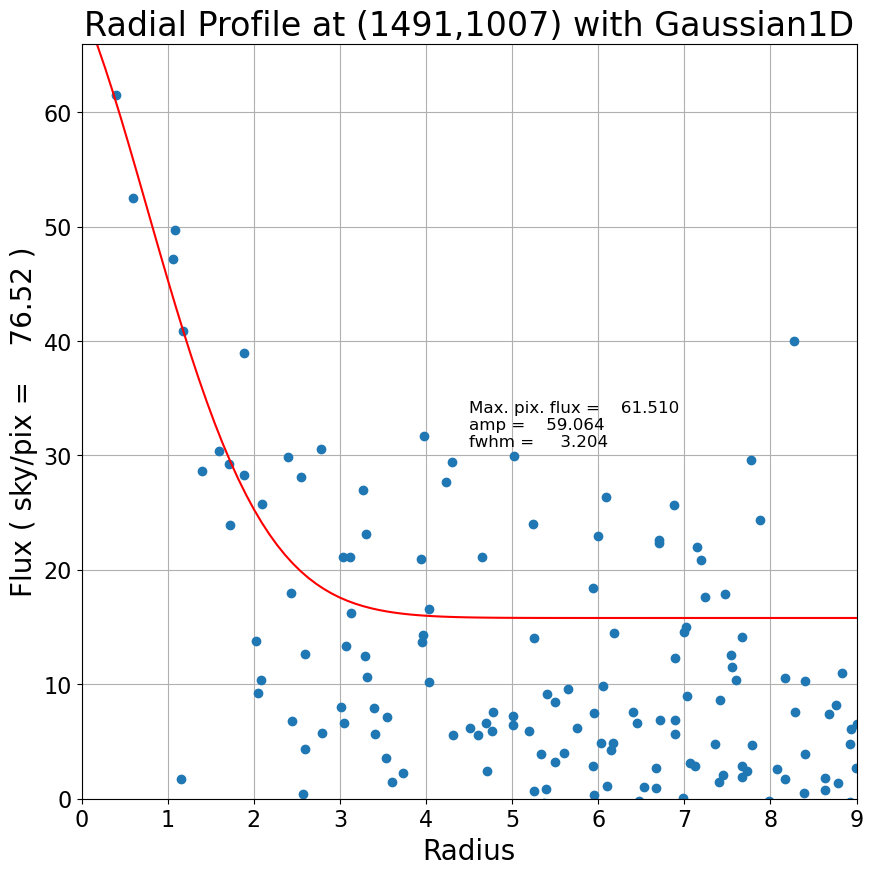

xc=78.1316	yc=1017.5675


INFO:imexam.util:xc=78.1316	yc=1017.5675


Background per pixel: 77.1330995290046


INFO:imexam.util:Background per pixel: 77.1330995290046


Max. pix. flux =    58.356
amp =    47.977
fwhm =     3.487


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =    58.356
amp =    47.977
fwhm =     3.487


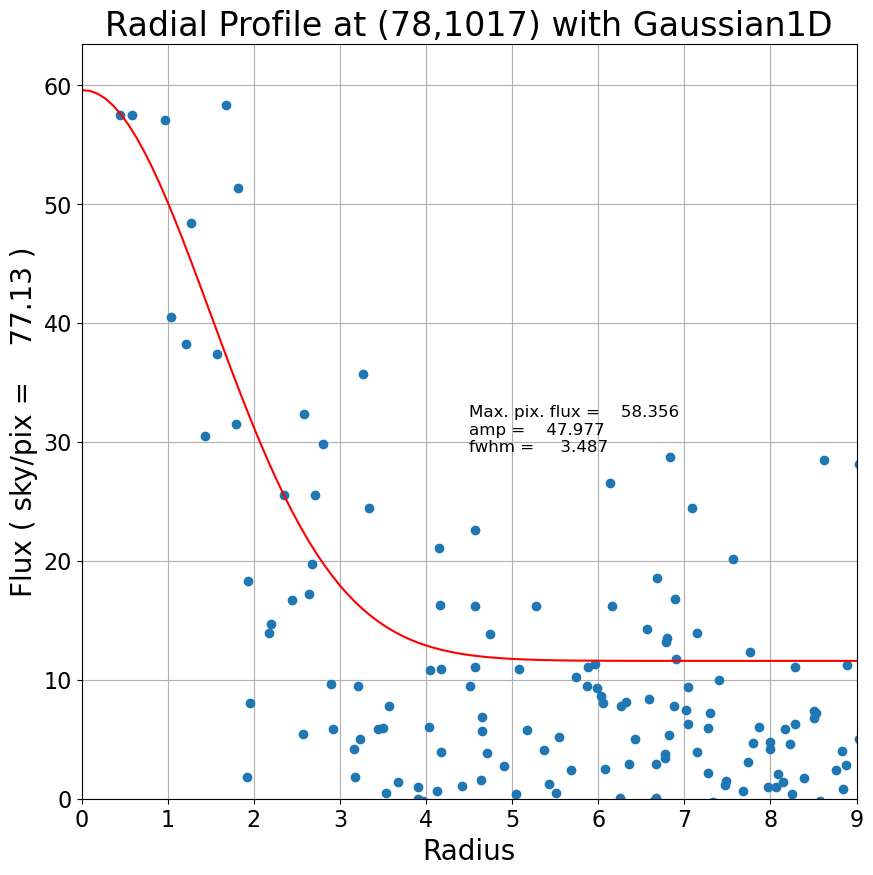

xc=1795.3166	yc=1019.5478


INFO:imexam.util:xc=1795.3166	yc=1019.5478


Background per pixel: 76.53176412236908


INFO:imexam.util:Background per pixel: 76.53176412236908


Max. pix. flux =    75.730
amp =    51.990
fwhm =     2.023


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =    75.730
amp =    51.990
fwhm =     2.023


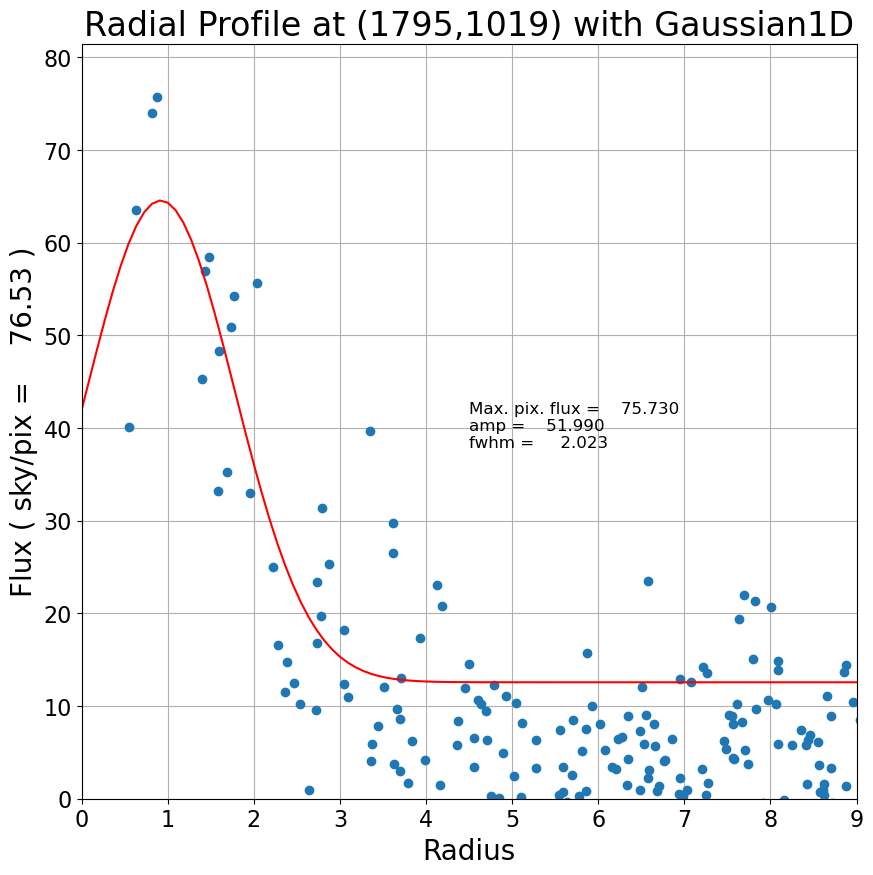

xc=1559.4024	yc=1024.5829


INFO:imexam.util:xc=1559.4024	yc=1024.5829


Background per pixel: 76.62284204290353


INFO:imexam.util:Background per pixel: 76.62284204290353


Max. pix. flux =   164.757
amp =   174.063
fwhm =     3.508


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =   164.757
amp =   174.063
fwhm =     3.508


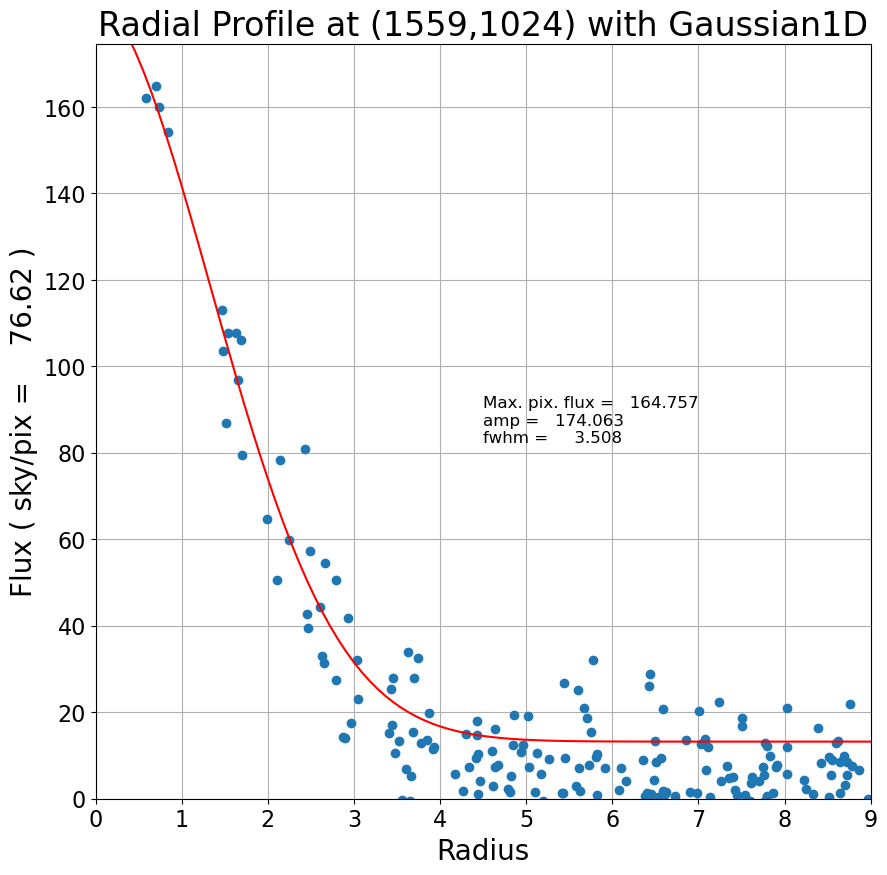

xc=730.4792	yc=1029.7128


INFO:imexam.util:xc=730.4792	yc=1029.7128


Background per pixel: 77.35222452911023


INFO:imexam.util:Background per pixel: 77.35222452911023


Max. pix. flux =   100.930
amp =   109.385
fwhm =     4.008


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =   100.930
amp =   109.385
fwhm =     4.008


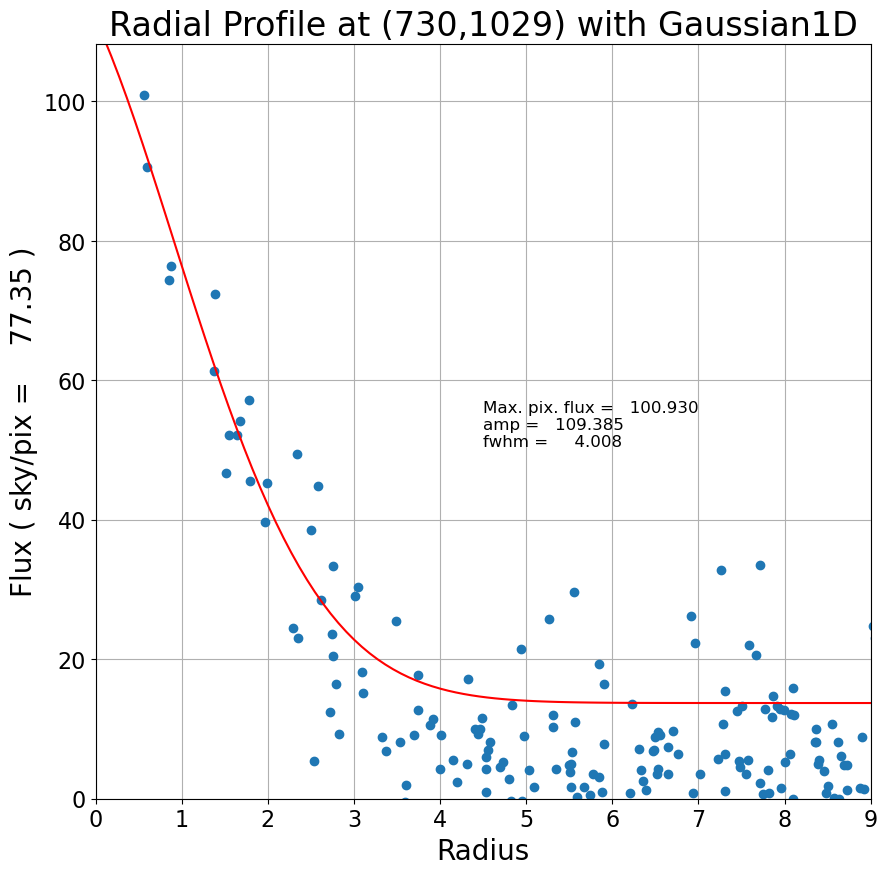

xc=1946.1906	yc=1034.3925


INFO:imexam.util:xc=1946.1906	yc=1034.3925


Background per pixel: 78.08639236314507


INFO:imexam.util:Background per pixel: 78.08639236314507


Max. pix. flux =  1605.650
amp =  1796.397
fwhm =     4.104


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  1605.650
amp =  1796.397
fwhm =     4.104


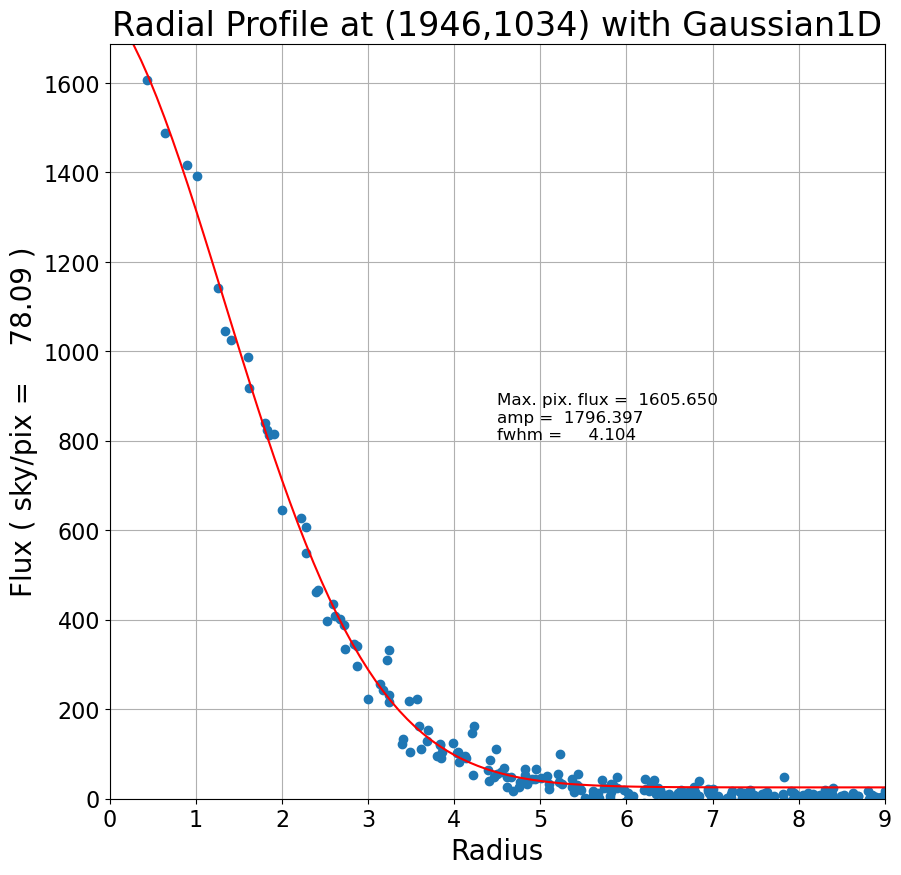

xc=1045.7128	yc=1043.1197


INFO:imexam.util:xc=1045.7128	yc=1043.1197


Background per pixel: 80.44479020084117


INFO:imexam.util:Background per pixel: 80.44479020084117


Max. pix. flux =  5137.074
amp =  5883.985
fwhm =     4.125


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  5137.074
amp =  5883.985
fwhm =     4.125


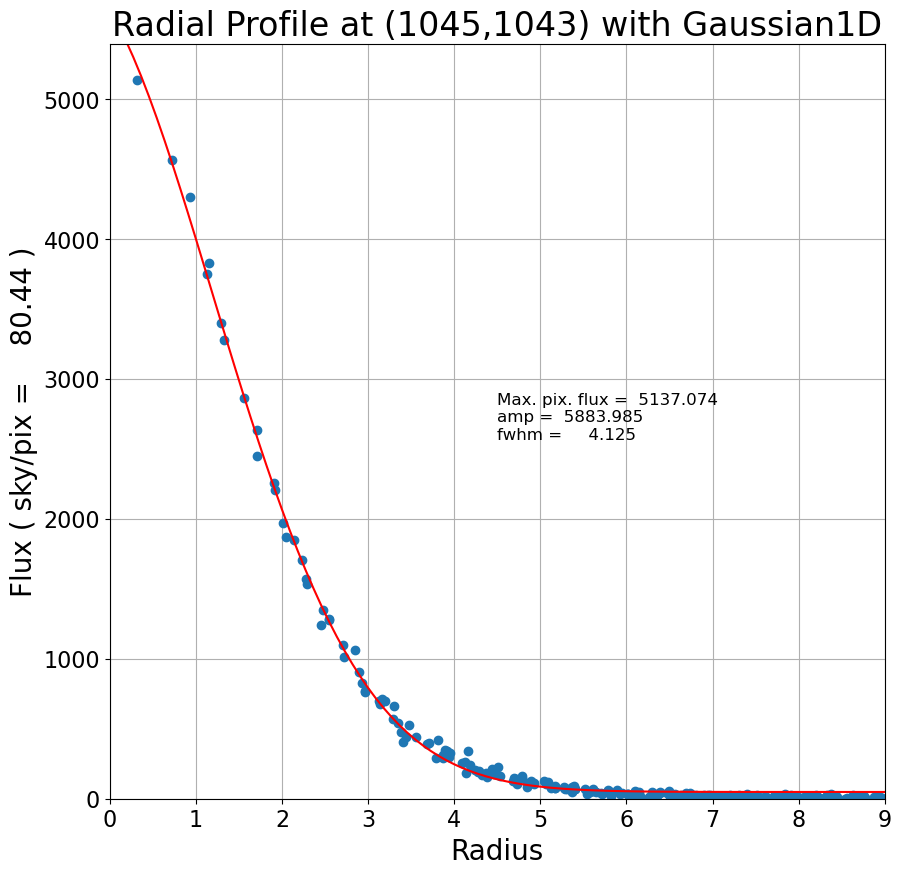

xc=523.9707	yc=1047.2588


INFO:imexam.util:xc=523.9707	yc=1047.2588


Background per pixel: 78.21330105163256


INFO:imexam.util:Background per pixel: 78.21330105163256


Max. pix. flux =   186.307
amp =   191.859
fwhm =     3.650


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =   186.307
amp =   191.859
fwhm =     3.650


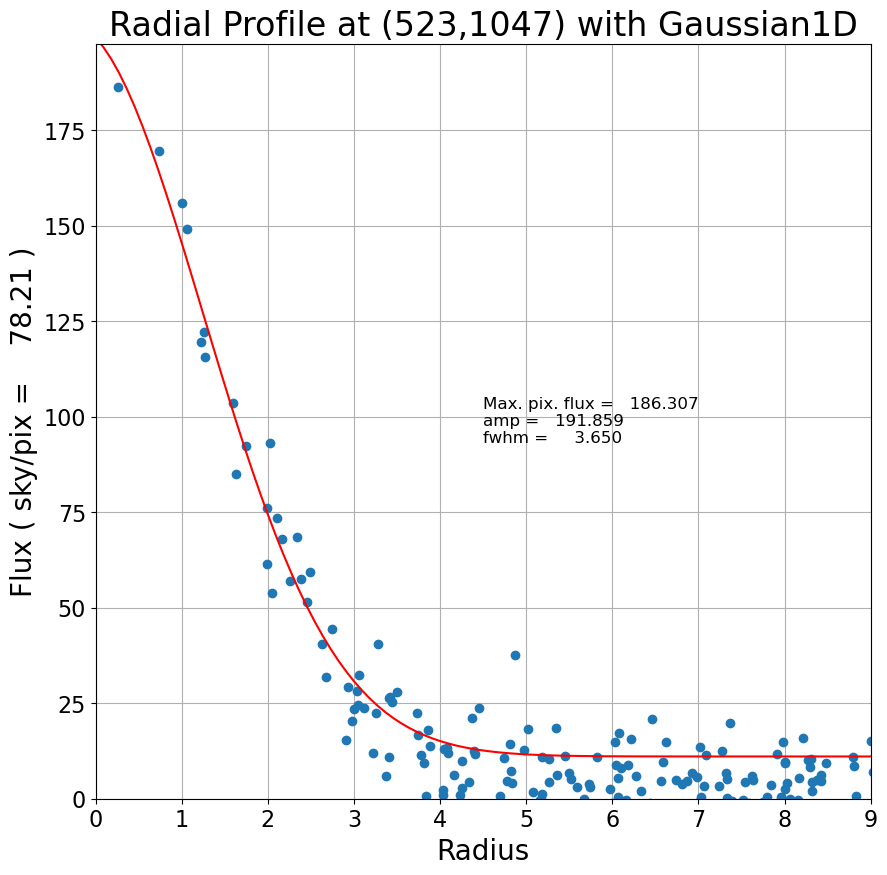

xc=989.7946	yc=1049.1143


INFO:imexam.util:xc=989.7946	yc=1049.1143


Background per pixel: 97.63139722025946


INFO:imexam.util:Background per pixel: 97.63139722025946


Max. pix. flux = 28319.517
amp = 32404.902
fwhm =     4.234


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux = 28319.517
amp = 32404.902
fwhm =     4.234


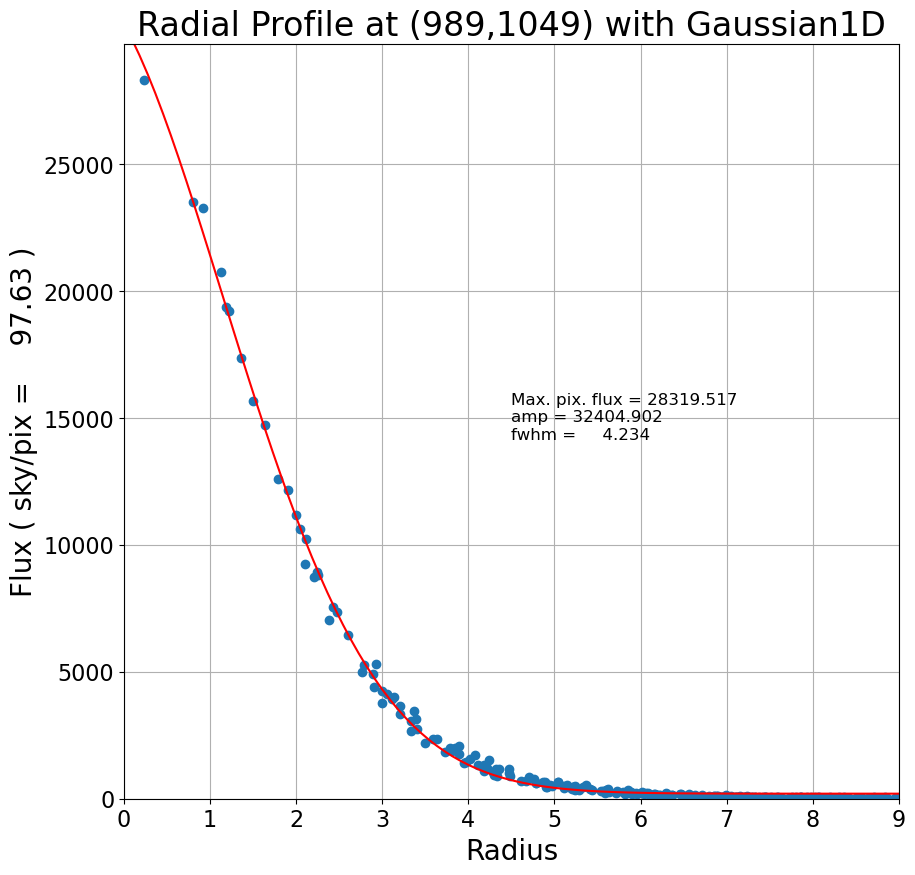

In [156]:
for i in range(0,len(x_vals[0])):
    x = x_vals[0][i]
    y = y_vals[0][i]
    plots.radial_profile(x,y,data,genplot=True)

In [157]:
x_position = np.sort(x_vals)
print(x_position)

[[  78.14164456  523.94252887  730.51948842  989.81014633 1045.73214139
  1492.0410284  1559.42757586 1795.5050642  1946.2341743 ]]


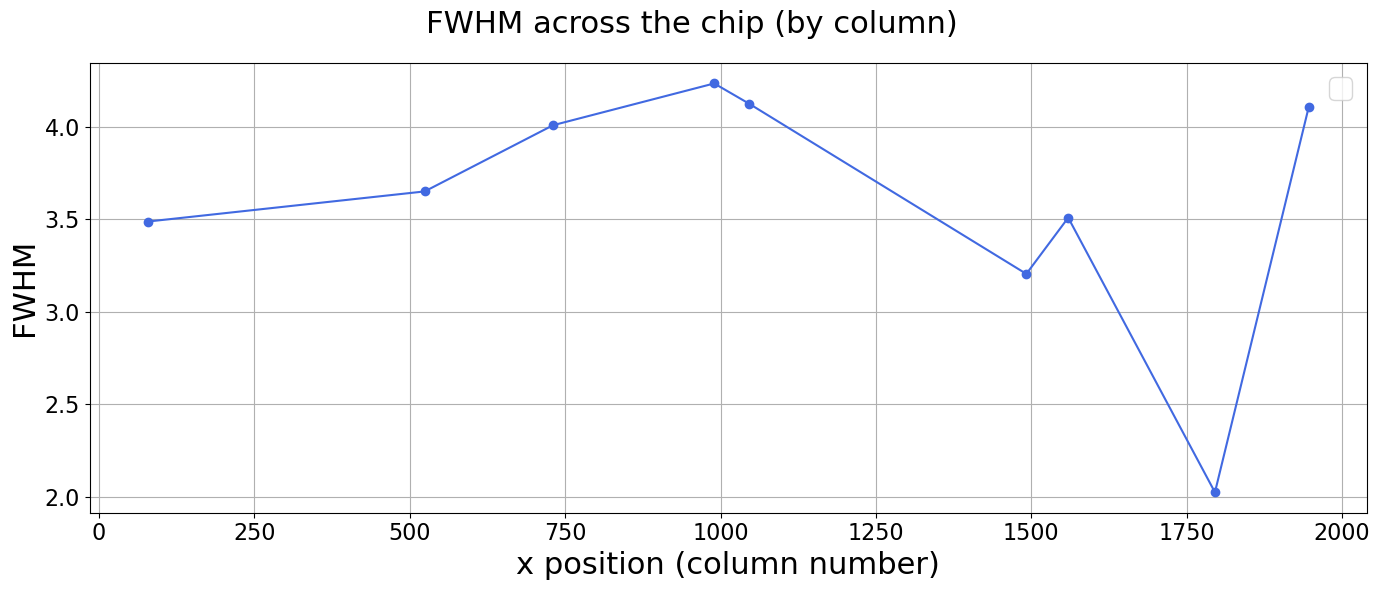

In [158]:
FWHM = [3.487,3.650,4.008,4.234,4.125,3.204,3.508,2.023,4.104]

#plotting FWHM as a function of column
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(x_position[0],FWHM,color='royalblue',marker='o',ls='solid')
ax.set_xlabel(r'x position (column number)',fontsize=22)
ax.set_ylabel(r'FWHM',fontsize=22)
ax.legend()
fig.suptitle('FWHM across the chip (by column)',fontsize=22)
fig.tight_layout()

xc=1041.9836	yc=15.7833


INFO:imexam.util:xc=1041.9836	yc=15.7833


Background per pixel: 77.35071434461184


INFO:imexam.util:Background per pixel: 77.35071434461184


Max. pix. flux =   234.684
amp =   226.007
fwhm =     3.426


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =   234.684
amp =   226.007
fwhm =     3.426


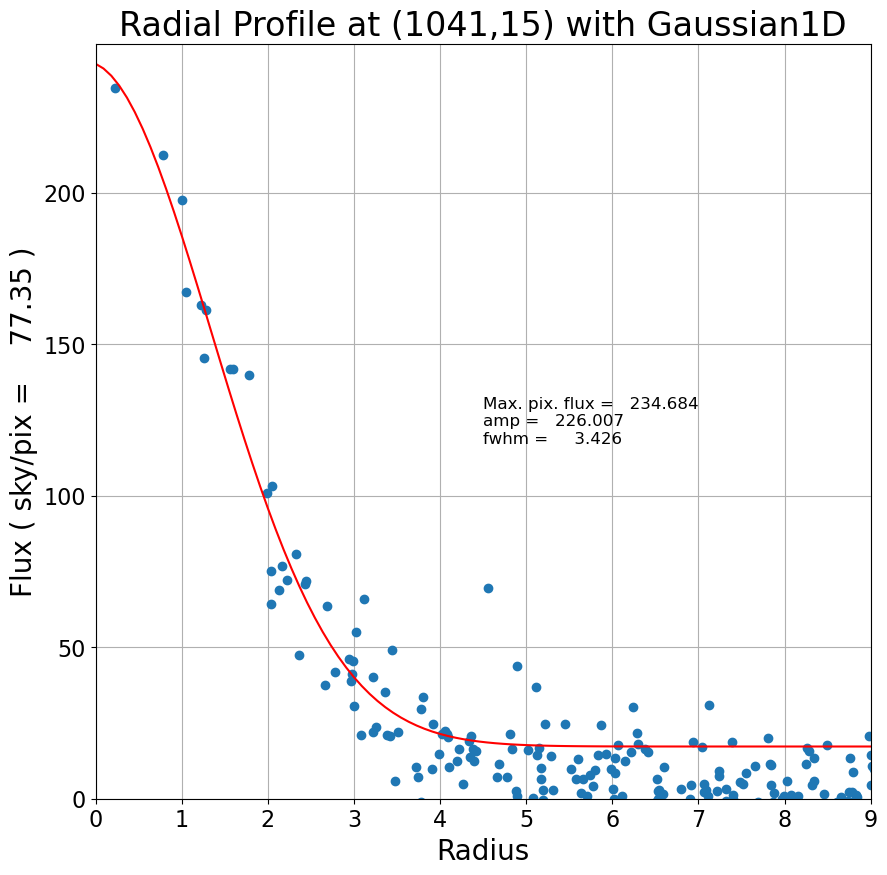

xc=1007.5768	yc=342.0471


INFO:imexam.util:xc=1007.5768	yc=342.0471


Background per pixel: 78.07708847174241


INFO:imexam.util:Background per pixel: 78.07708847174241


Max. pix. flux =  1715.785
amp =  1899.973
fwhm =     3.990


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  1715.785
amp =  1899.973
fwhm =     3.990


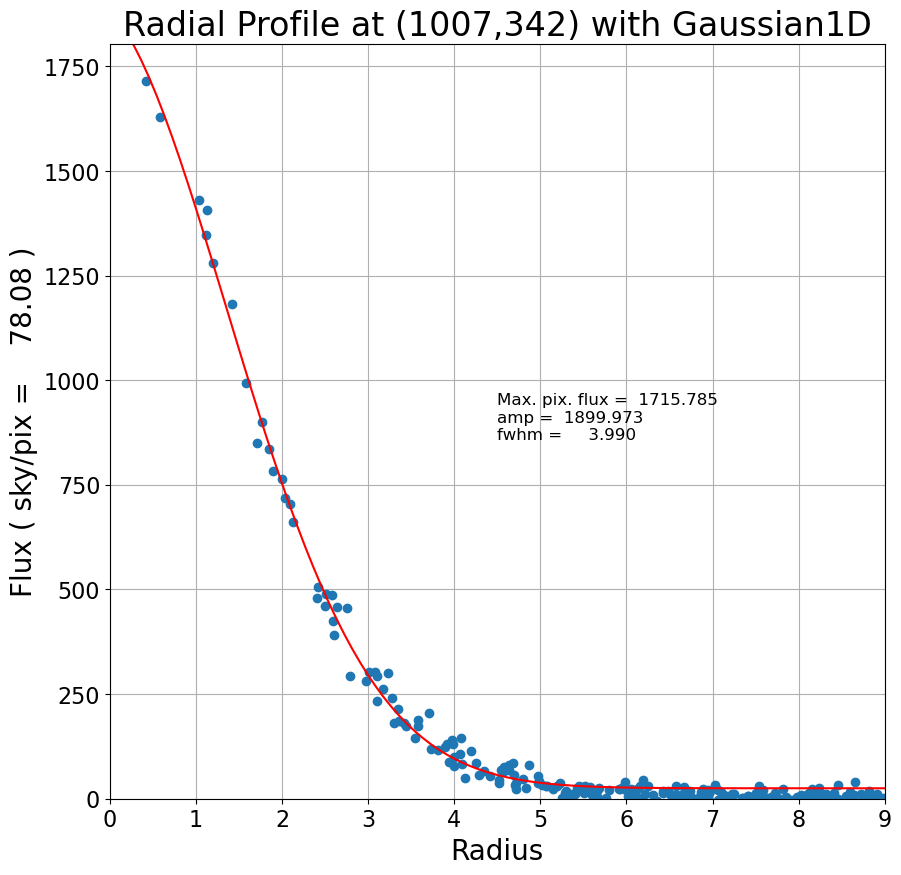

xc=1011.6469	yc=381.4623


INFO:imexam.util:xc=1011.6469	yc=381.4623


Background per pixel: 77.33174997273784


INFO:imexam.util:Background per pixel: 77.33174997273784


Max. pix. flux =   155.944
amp =   179.518
fwhm =     4.016


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =   155.944
amp =   179.518
fwhm =     4.016


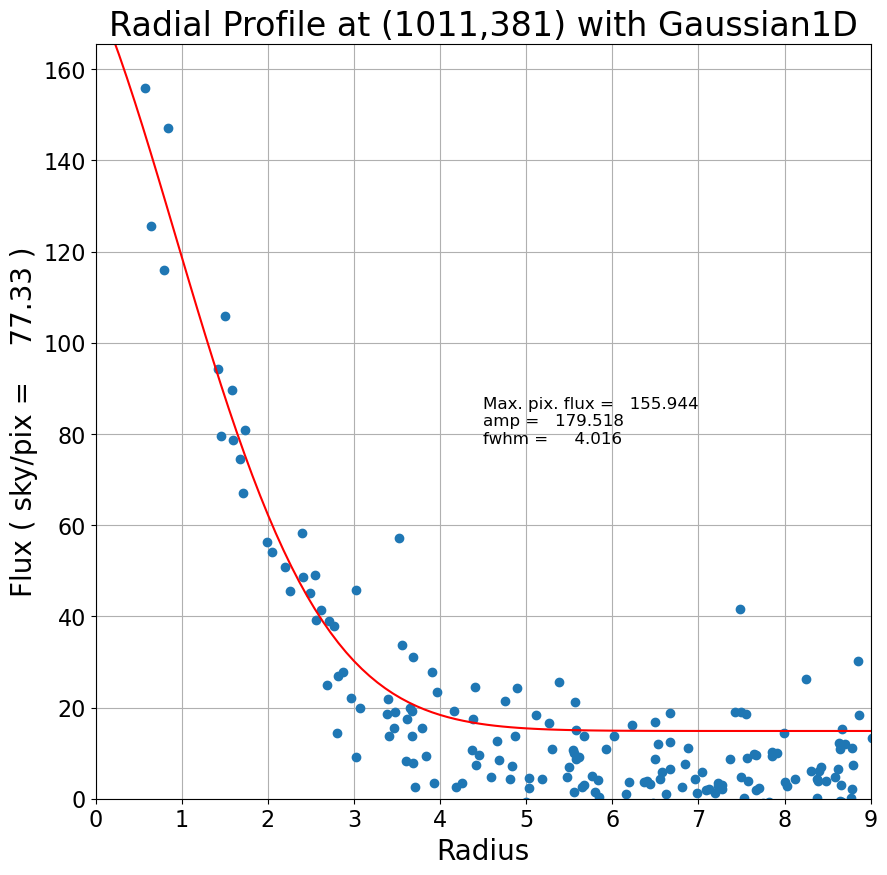

xc=1042.4506	yc=421.2971


INFO:imexam.util:xc=1042.4506	yc=421.2971


Background per pixel: 76.93078744570109


INFO:imexam.util:Background per pixel: 76.93078744570109


Max. pix. flux =    76.772
amp =    49.505
fwhm =     3.079


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =    76.772
amp =    49.505
fwhm =     3.079


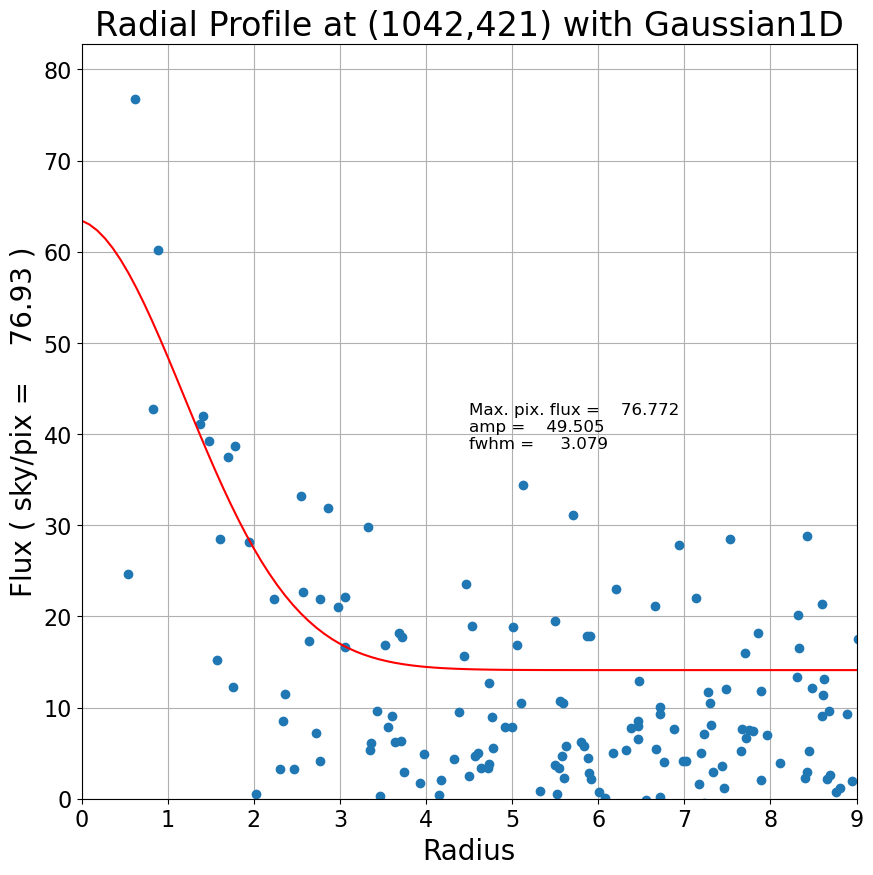

xc=1019.3962	yc=612.8005


INFO:imexam.util:xc=1019.3962	yc=612.8005


Background per pixel: 76.41608490130379


INFO:imexam.util:Background per pixel: 76.41608490130379


Max. pix. flux =   168.498
amp =   163.689
fwhm =     3.507


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =   168.498
amp =   163.689
fwhm =     3.507


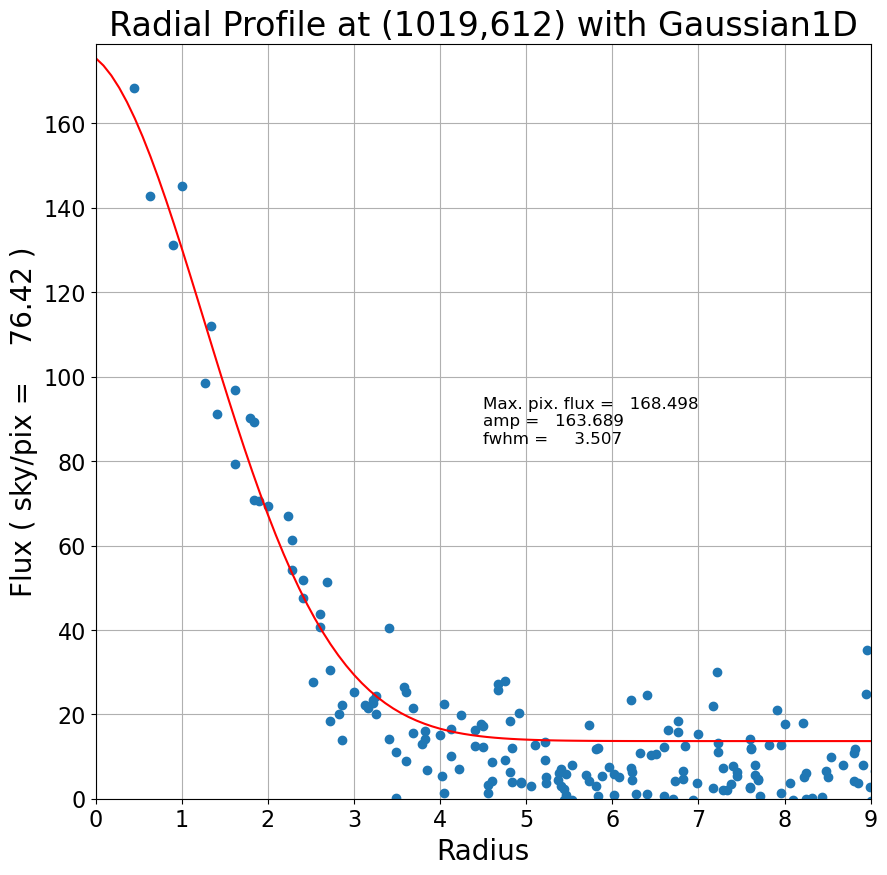

xc=1036.1842	yc=865.7197


INFO:imexam.util:xc=1036.1842	yc=865.7197


Background per pixel: 76.68885182488205


INFO:imexam.util:Background per pixel: 76.68885182488205


Max. pix. flux =   499.433
amp =   567.147
fwhm =     4.106


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =   499.433
amp =   567.147
fwhm =     4.106


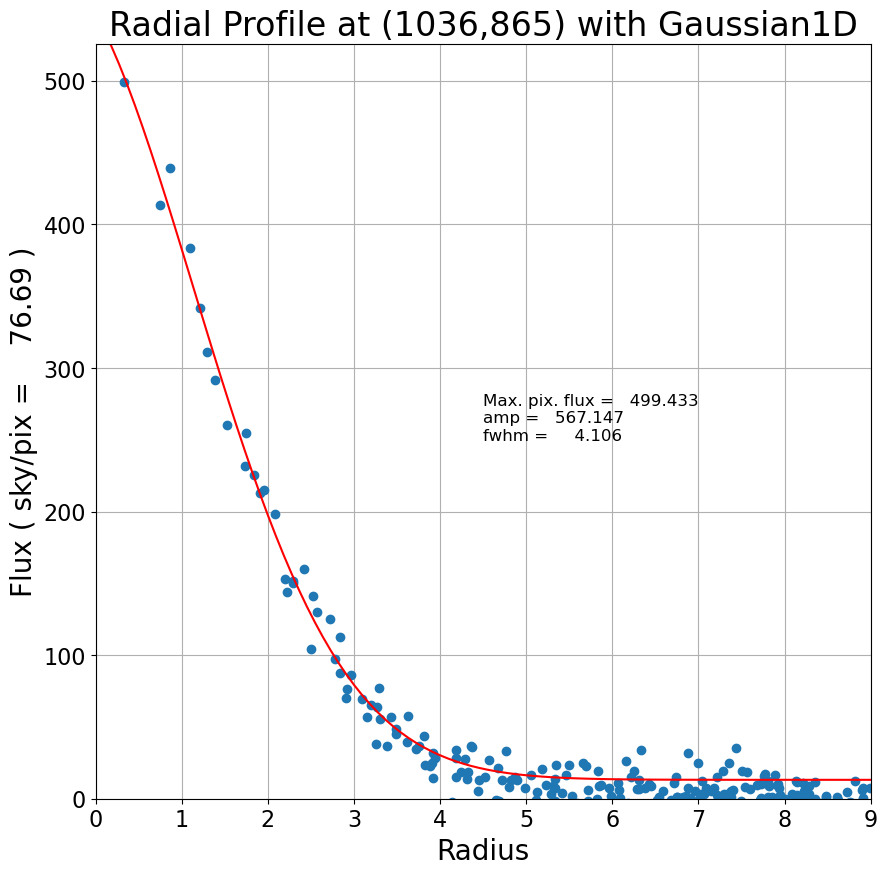

xc=1044.2527	yc=954.2849


INFO:imexam.util:xc=1044.2527	yc=954.2849


Background per pixel: 76.39429040501278


INFO:imexam.util:Background per pixel: 76.39429040501278


Max. pix. flux =    68.297
amp =   155.108
fwhm =     4.473


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =    68.297
amp =   155.108
fwhm =     4.473


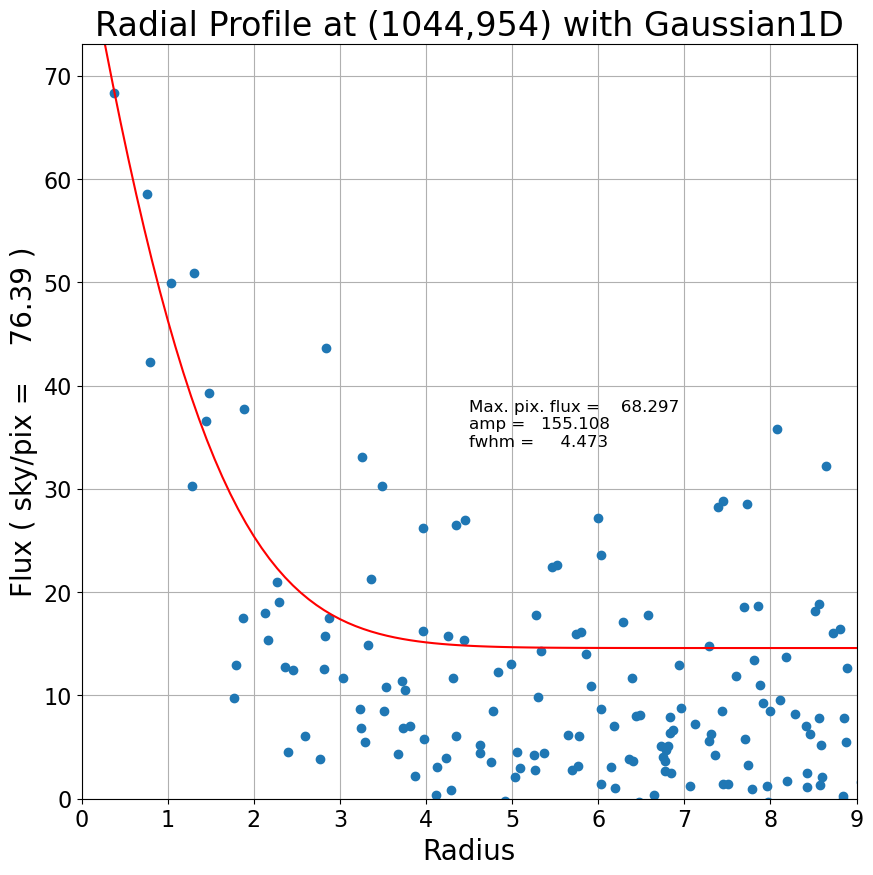

xc=1045.7128	yc=1043.1197


INFO:imexam.util:xc=1045.7128	yc=1043.1197


Background per pixel: 80.44479020084117


INFO:imexam.util:Background per pixel: 80.44479020084117


Max. pix. flux =  5137.074
amp =  5883.985
fwhm =     4.125


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  5137.074
amp =  5883.985
fwhm =     4.125


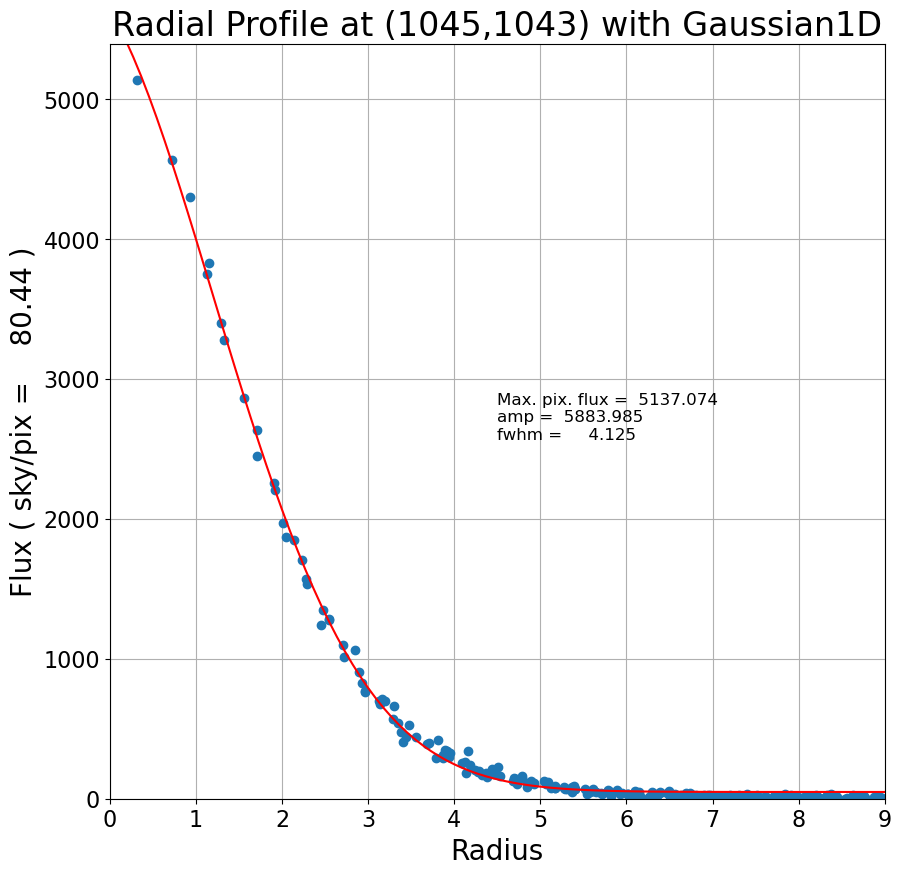

xc=1025.8996	yc=1205.1268


INFO:imexam.util:xc=1025.8996	yc=1205.1268


Background per pixel: 77.1352745362704


INFO:imexam.util:Background per pixel: 77.1352745362704


Max. pix. flux =   113.931
amp =   110.711
fwhm =     3.421


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =   113.931
amp =   110.711
fwhm =     3.421


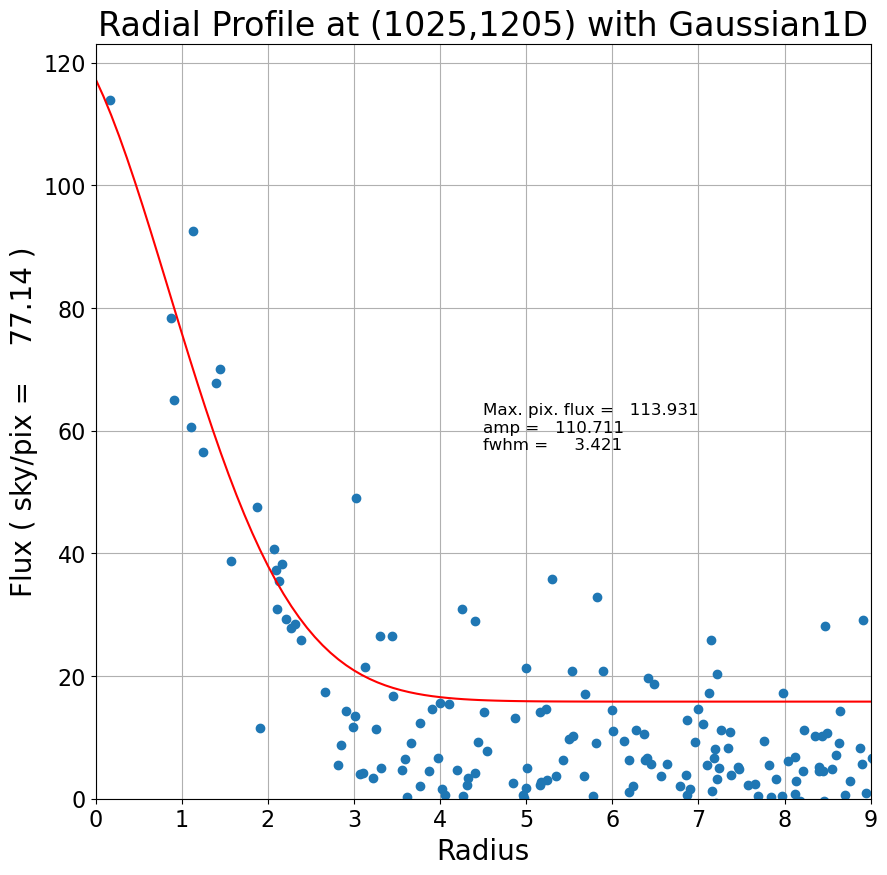

xc=1004.5019	yc=1757.2858


INFO:imexam.util:xc=1004.5019	yc=1757.2858


Background per pixel: 77.49280847800127


INFO:imexam.util:Background per pixel: 77.49280847800127


Max. pix. flux =   116.272
amp =   904.657
fwhm =     6.013


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =   116.272
amp =   904.657
fwhm =     6.013


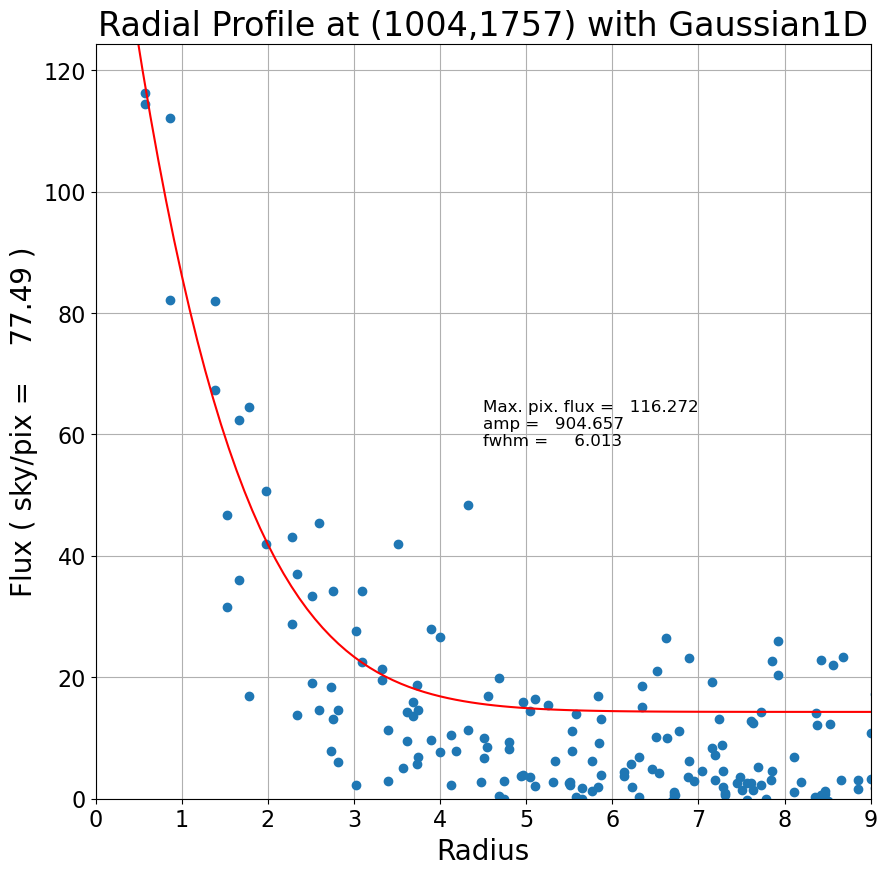

xc=1041.4916	yc=1963.0219


INFO:imexam.util:xc=1041.4916	yc=1963.0219


Background per pixel: 77.44590673344068


INFO:imexam.util:Background per pixel: 77.44590673344068


Max. pix. flux =    65.723
amp =    43.162
fwhm =     3.174


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =    65.723
amp =    43.162
fwhm =     3.174


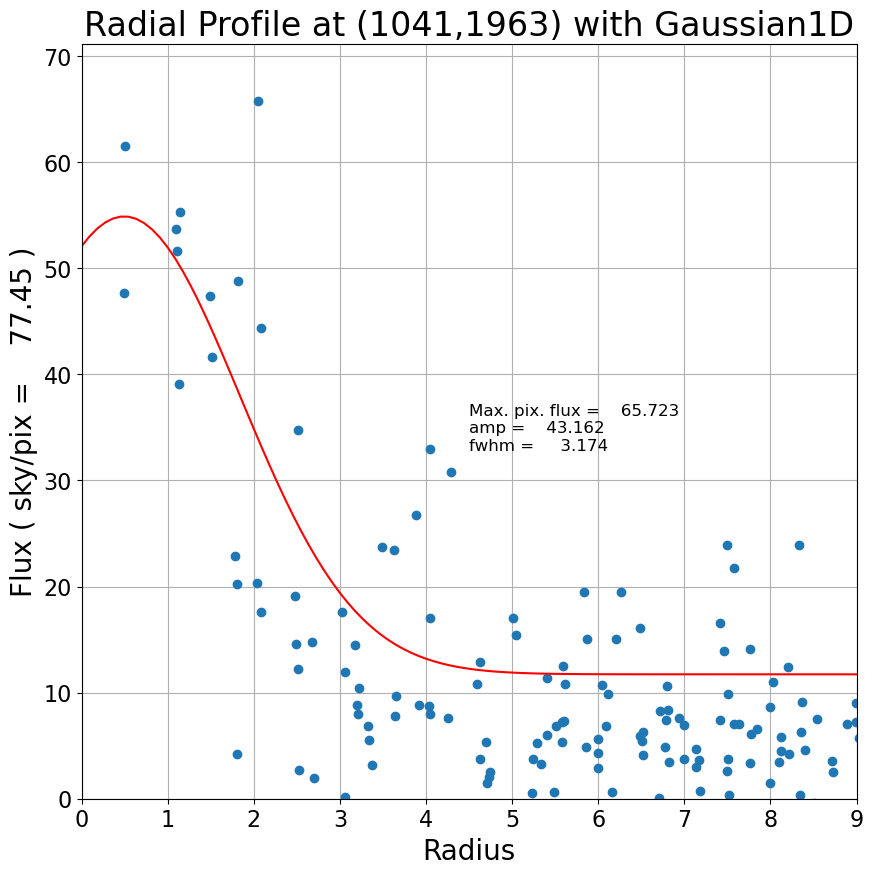

xc=1012.9566	yc=1988.6126


INFO:imexam.util:xc=1012.9566	yc=1988.6126


Background per pixel: 76.37492822874388


INFO:imexam.util:Background per pixel: 76.37492822874388


Max. pix. flux =    38.109
amp =    22.933
fwhm =     1.063


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =    38.109
amp =    22.933
fwhm =     1.063


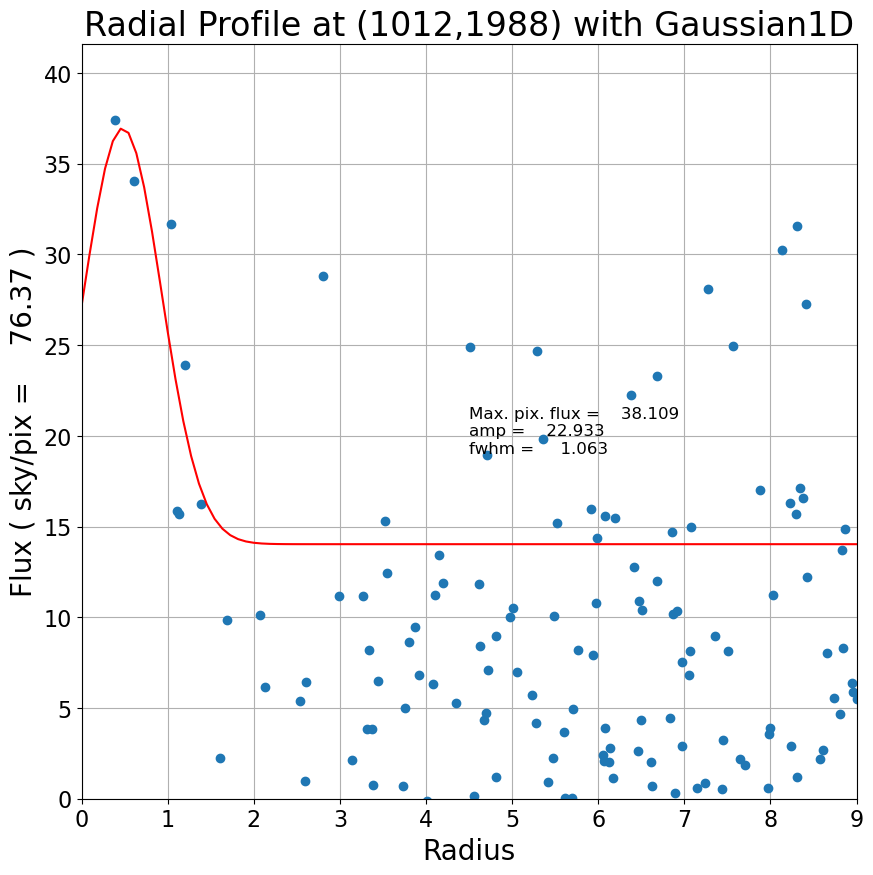

In [159]:
#looking across rows
x_vals = []
y_vals = []

star_ind = np.where((sources['xcentroid']>1000) & (sources['xcentroid']<1050)) #constrain to some range of columns
x_vals.append(sources['xcentroid'][star_ind])
y_vals.append(sources['ycentroid'][star_ind])

for i in range(0,len(x_vals[0])):
    x = x_vals[0][i]
    y = y_vals[0][i]
    plots.radial_profile(x,y,data,genplot=True)

In [160]:
y_position = np.sort(y_vals)
print(y_position)

[[  15.7719429   342.02234401  381.41317827  421.30355559  612.72037493
   865.73526659  954.19154535 1043.11244763 1205.11160417 1757.22982815
  1962.9943051  1988.64781047]]


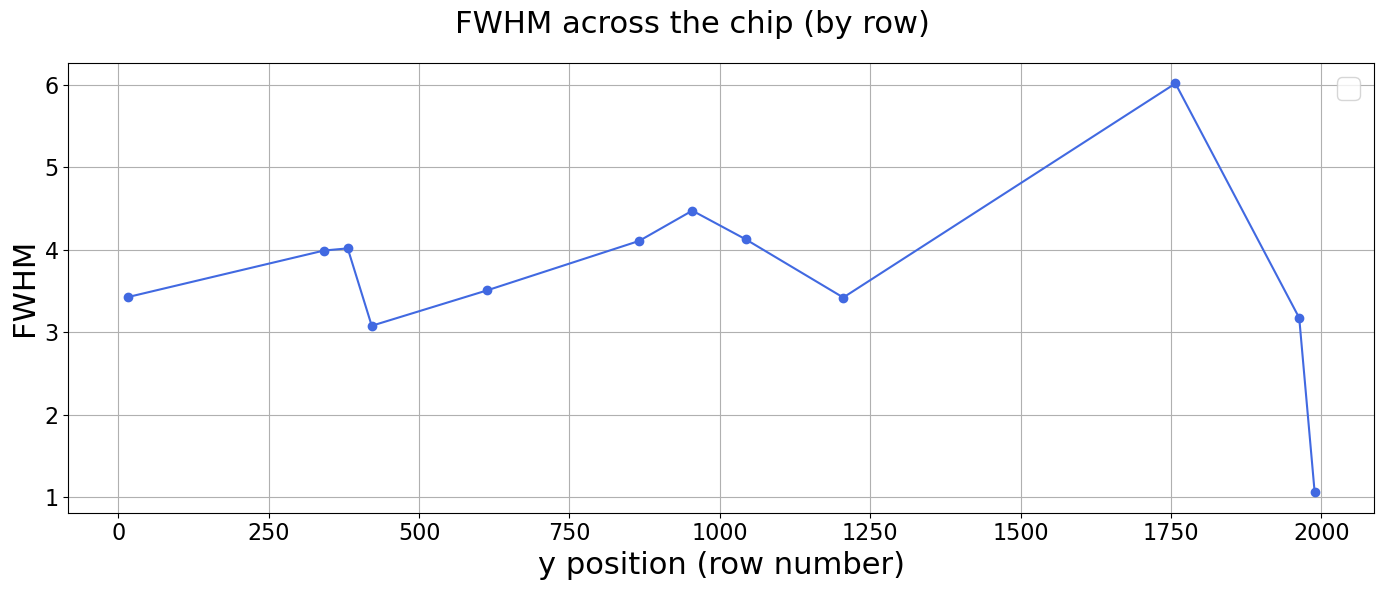

In [161]:
FWHM = [3.426,3.990,4.016,3.079,3.507,4.106,4.473,4.125,3.421,6.013,3.174,1.063]

#plotting FWHM as a function of row
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(y_position[0],FWHM,color='royalblue',marker='o',ls='solid')
ax.set_xlabel(r'y position (row number)',fontsize=22)
ax.set_ylabel(r'FWHM',fontsize=22)
ax.legend()
fig.suptitle('FWHM across the chip (by row)',fontsize=22)
fig.tight_layout()

Going across both the columns and the rows of the chip in a single exposure, it's clear that the FWHM is really wonky near the edges, so it's best to avoid those regions.

# Q2

CCDs are ideal because over the available dynamic range, they are very linear (that is, one photon produces one electron). Test the linearity of the CCD using the sequence of exposures labeled linearity test in the log. Make a plot of ADU versus time and determine whether the chip is linear to the full 16 bits of the A-D converter. What you care about here is whether the signal stays linear with exposure time as the flux in the peak pixel approaches the 216 ADU limit.

In [162]:
#linearity test exposures ==> frames 74-80 overscan-correct, trimmed, bias-subtracted
linearity_files = ['a'+str(i).zfill(3)+'otz.fits' for i in np.arange(7)+74]
hdus = [fits.open(reduced_dir+file) for file in linearity_files]
hdrs = [hdu[0].header for hdu in hdus]
data = [hdu[0].data for hdu in hdus]
times = [hdr['exptime'] for hdr in hdrs]

In [163]:
#picking a star to measure ADU counts from in each frame
#From DS9, x=1049.9717, y=1045.047 around center
#Not oversaturated in any frames
#Finding exact position in each frame below

linearity_sources = []
for frame in data:
    mean, median, std = sigma_clipped_stats(frame, sigma=3.0)
    daofind = DAOStarFinder(fwhm=4.0, threshold=5.*std)
    sources = daofind(frame - median)
    for col in sources.colnames:  
        sources[col].info.format = '%.8g'
    linearity_sources.append(sources)
    
x_vals = []
y_vals = []
for i in range(0,len(linearity_sources)):
    s = linearity_sources[i]
    star_ind = np.where((s['xcentroid']>1045) & (s['xcentroid']<1055) & (s['ycentroid']>1040) & (s['ycentroid']<1050))
    x_vals.append(s['xcentroid'][star_ind])
    y_vals.append(s['ycentroid'][star_ind])

xc=1051.9738	yc=1045.8775


INFO:imexam.util:xc=1051.9738	yc=1045.8775


Background per pixel: 13.767354963031742


INFO:imexam.util:Background per pixel: 13.767354963031742


Max. pix. flux =   437.180
amp =   450.769
fwhm =     5.116


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =   437.180
amp =   450.769
fwhm =     5.116


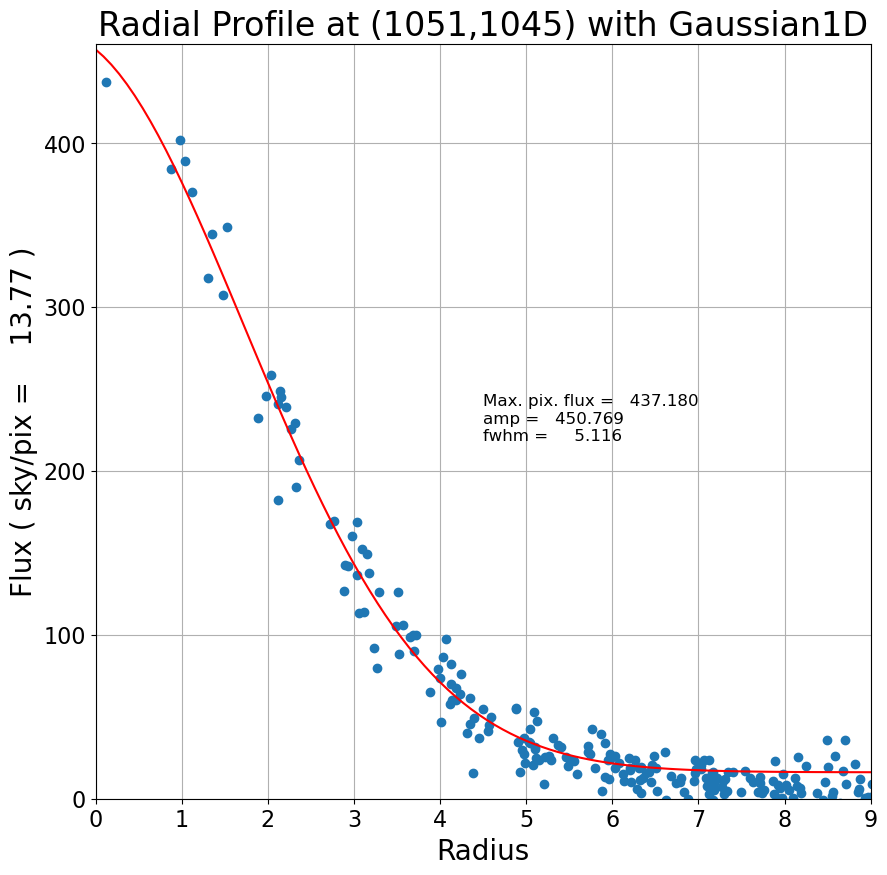

xc=1053.7575	yc=1045.7954


INFO:imexam.util:xc=1053.7575	yc=1045.7954


Background per pixel: 26.757126638901774


INFO:imexam.util:Background per pixel: 26.757126638901774


Max. pix. flux =  1125.101
amp =  1191.475
fwhm =     4.495


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  1125.101
amp =  1191.475
fwhm =     4.495


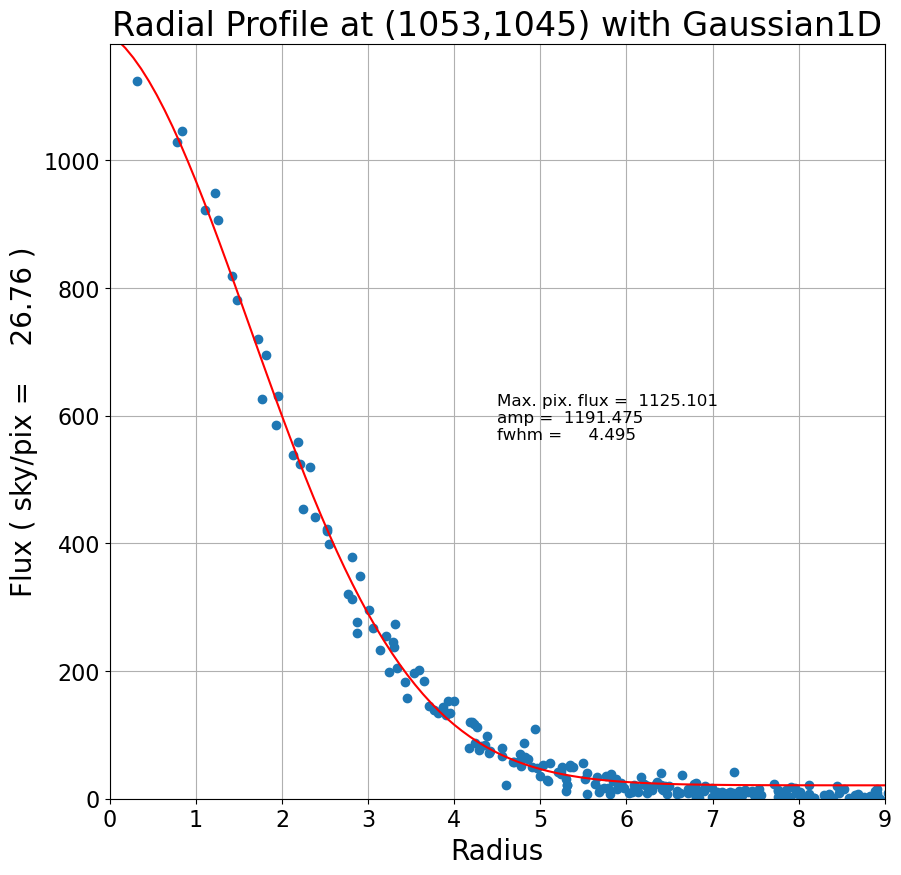

xc=1053.2930	yc=1045.8129


INFO:imexam.util:xc=1053.2930	yc=1045.8129


Background per pixel: 53.24937188753335


INFO:imexam.util:Background per pixel: 53.24937188753335


Max. pix. flux =  2571.449
amp =  2863.271
fwhm =     4.561


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  2571.449
amp =  2863.271
fwhm =     4.561


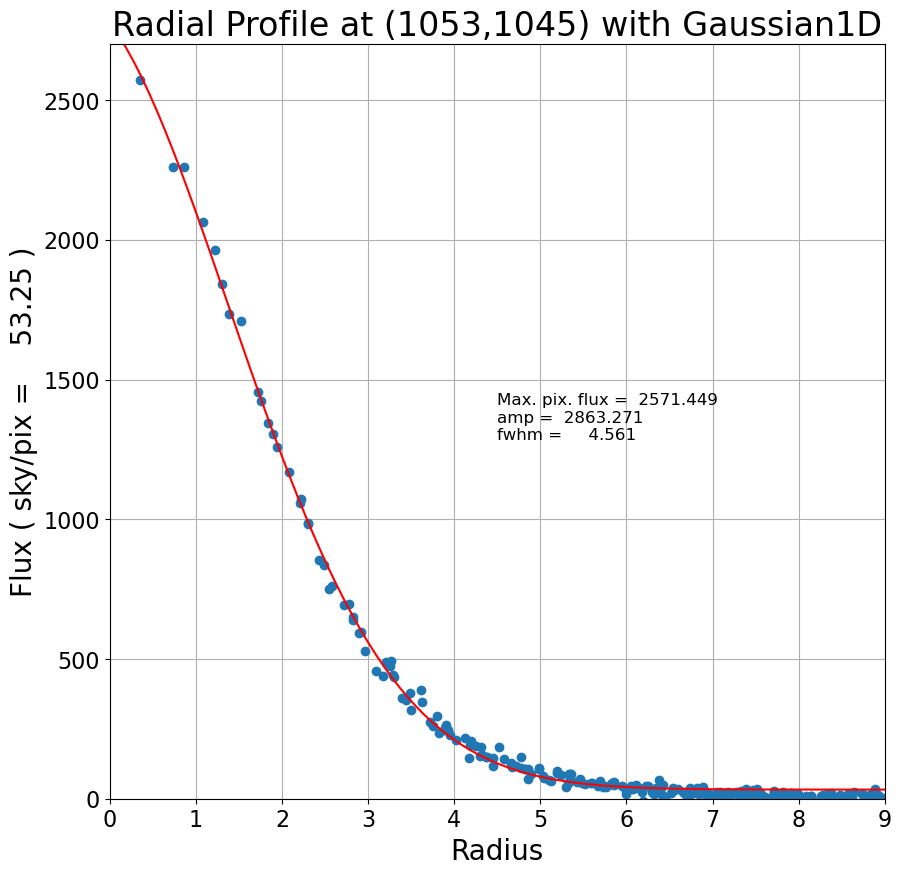

xc=1051.8914	yc=1045.2886


INFO:imexam.util:xc=1051.8914	yc=1045.2886


Background per pixel: 106.6527457356783


INFO:imexam.util:Background per pixel: 106.6527457356783


Max. pix. flux =  4011.857
amp =  4361.640
fwhm =     4.967


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  4011.857
amp =  4361.640
fwhm =     4.967


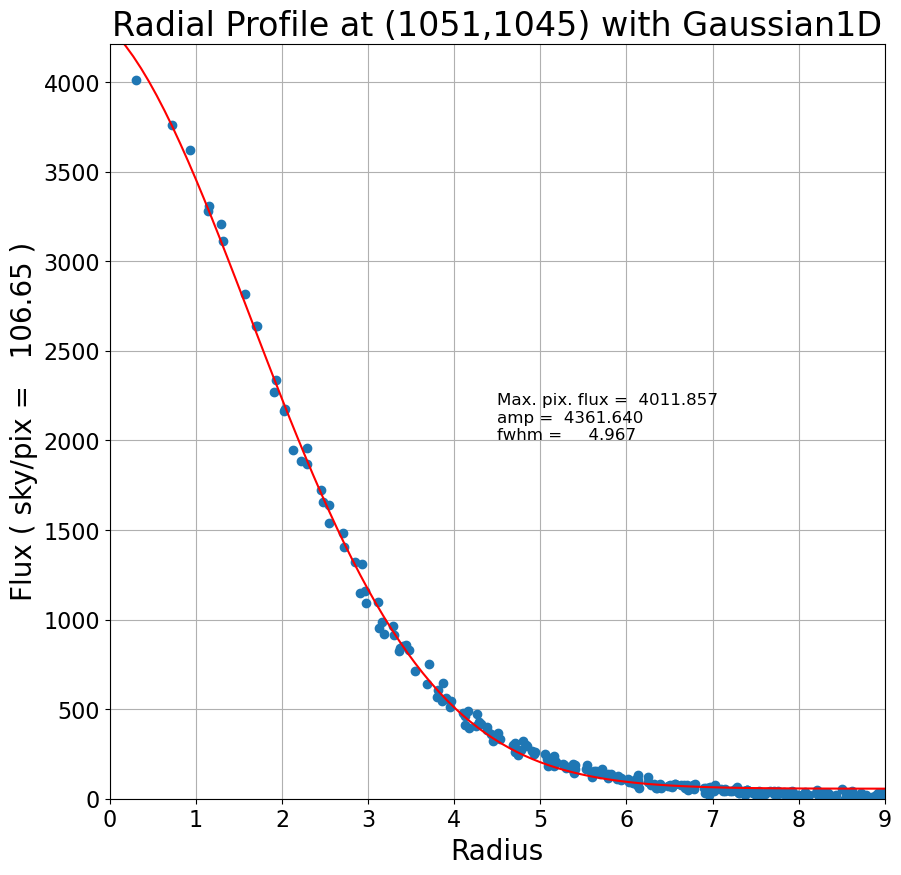

xc=1051.4288	yc=1044.1544


INFO:imexam.util:xc=1051.4288	yc=1044.1544


Background per pixel: 219.843449273074


INFO:imexam.util:Background per pixel: 219.843449273074


Max. pix. flux =  6339.409
amp =  7318.220
fwhm =     5.871


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  6339.409
amp =  7318.220
fwhm =     5.871


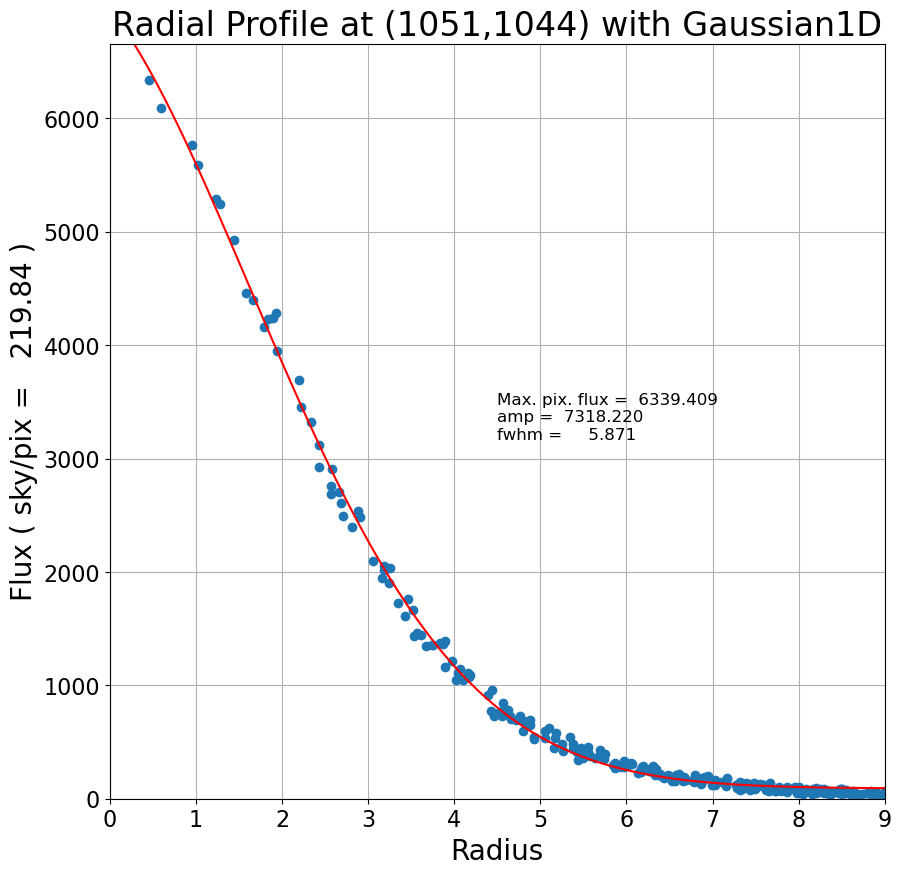

xc=1051.0015	yc=1044.3755


INFO:imexam.util:xc=1051.0015	yc=1044.3755


Background per pixel: 428.13289319297456


INFO:imexam.util:Background per pixel: 428.13289319297456


Max. pix. flux = 18109.124
amp = 20691.736
fwhm =     4.919


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux = 18109.124
amp = 20691.736
fwhm =     4.919


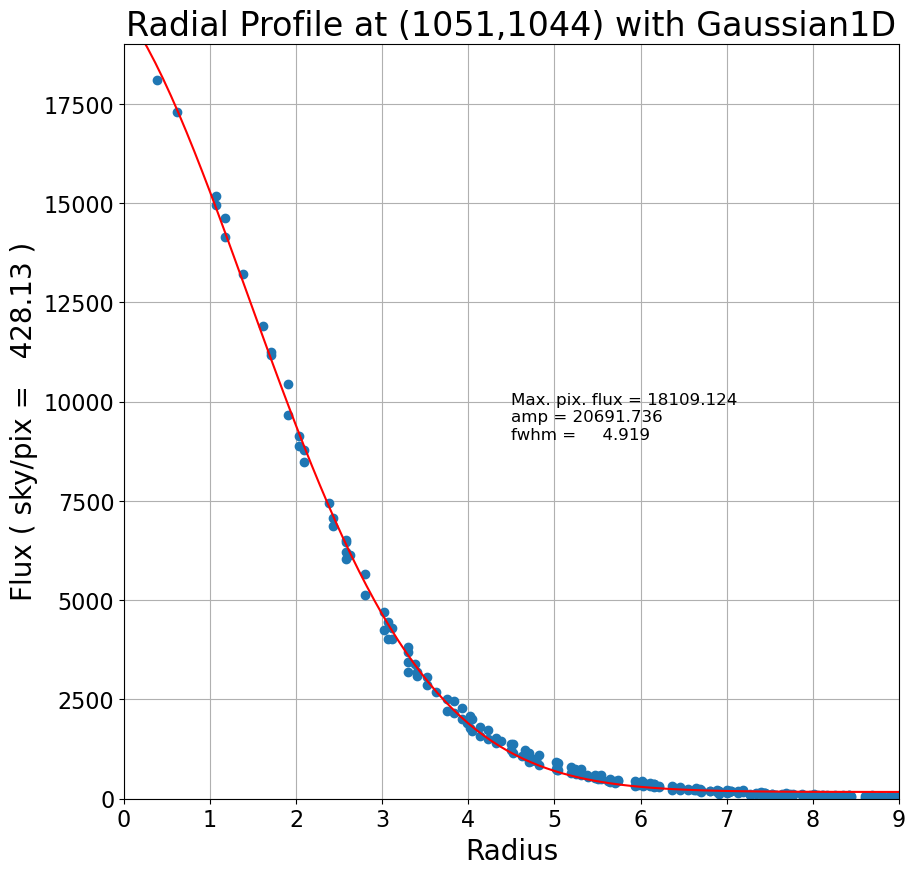

xc=1048.7969	yc=1044.3475


INFO:imexam.util:xc=1048.7969	yc=1044.3475


Background per pixel: 853.4807735926847


INFO:imexam.util:Background per pixel: 853.4807735926847


Max. pix. flux = 33491.948
amp = 37414.440
fwhm =     4.937


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux = 33491.948
amp = 37414.440
fwhm =     4.937


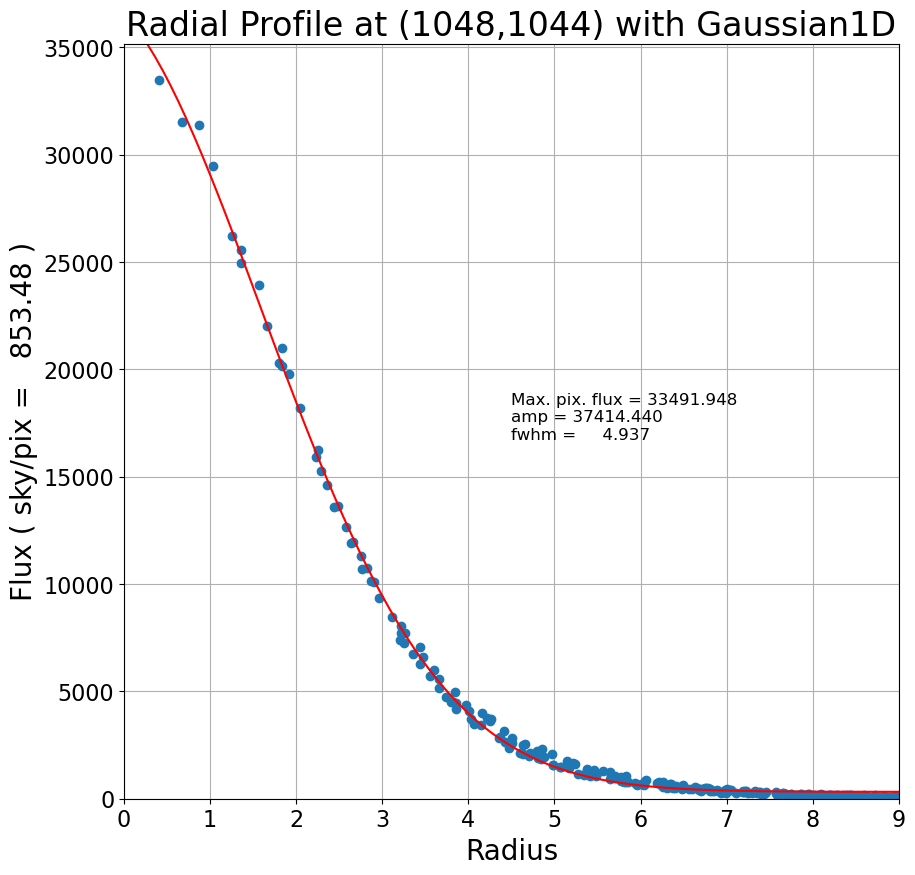

In [164]:
for i in range(0,len(data)):
    frame_data = data[i]
    x = x_vals[i]
    y = y_vals[i]
    plots.radial_profile(x,y,frame_data,genplot=True)

In [165]:
positions = [(x,y) for x,y in zip(x_vals,y_vals)]
positions = [(p[0][0],p[1][0]) for p in positions]
FWHMs = [5.116,4.495,4.561,4.967,5.871,4.919,4.937]

apertures = [CircularAperture(pos, r=fwhm) for pos,fwhm in zip(positions,FWHMs)]

In [168]:
#calculating total signal in each aperture in each frame
phot_tables = [aperture_photometry(frame_data, circ_aperture) for frame_data,circ_aperture in zip(data,apertures)]
for table in phot_tables:
    table['aperture_sum'].info.format = '%.8g'
    print(table)
    print('')

ADU_count = [table['aperture_sum'][0]/ap.area for table,ap in zip(phot_tables,apertures)]

 id      xcenter           ycenter       aperture_sum
           pix               pix                     
--- ----------------- ------------------ ------------
  1 1052.056862339518 1045.8998511316165    12016.686

 id      xcenter           ycenter       aperture_sum
           pix               pix                     
--- ----------------- ------------------ ------------
  1 1053.793457994033 1045.8129467192841    24234.647

 id      xcenter            ycenter       aperture_sum
           pix                pix                     
--- ------------------ ------------------ ------------
  1 1053.2745138062487 1045.7987284640774     49494.34

 id      xcenter            ycenter       aperture_sum
           pix                pix                     
--- ------------------ ------------------ ------------
  1 1051.8882185086145 1045.2780722138377     98506.33

 id     xcenter           ycenter       aperture_sum
          pix               pix                     
--- --------------

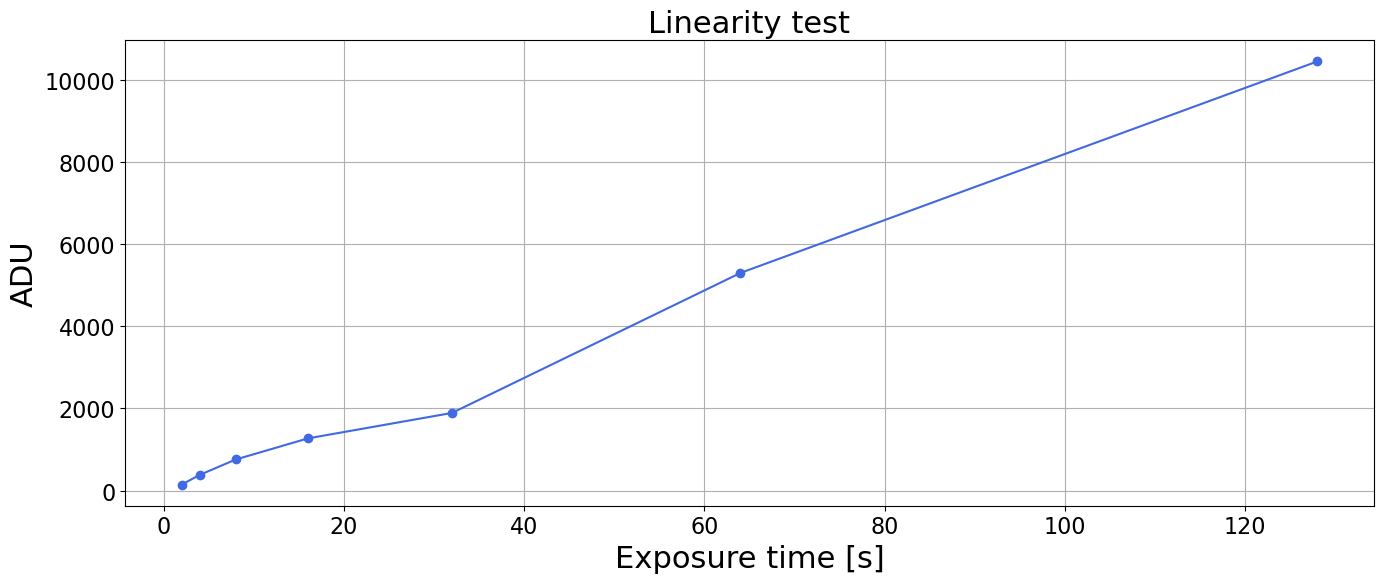

In [169]:
#plotting ADU as a function of exposure time
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(times,ADU_count,color='royalblue',marker='o',ls='solid')
ax.set_ylabel(r'ADU',fontsize=22)
ax.set_xlabel(r'Exposure time [s]',fontsize=22)
ax.set_title('Linearity test',fontsize=22)
fig.tight_layout()

Seems like the linearity test came out relatively well, aside from it being not as linear towards shorter exposure times.

# Q3

Use PHOTUTILS to perform aperture photometry on three (non saturated) stars in the PG1633+099 standard field: a really faint one, a medium bright one, and a bright one. Perform aperture photometry using at least 5 aperture sizes from very small to very large and make a plot that reproduces the one from Howell Figure 5.7 showing S/N as a function of aperture radius. What is a good aperture size to use for this dataset?

In [28]:
phot_file = reduced_dir+'a085otzf.fits'
phot_data = fits.open(phot_file)[0].data

x1 = 247.66974 #bright
y1 = 1746.577
x2 = 1252.7234 #medium
y2 = 1222.1948
x3 = 1545.675 #faint
y3 = 790.0161

mean, median, std = sigma_clipped_stats(phot_data, sigma=3.0)
daofind = DAOStarFinder(fwhm=4.0, threshold=5.*std)
sources = daofind(phot_data - median)
for col in sources.colnames:  
    sources[col].info.format = '%.8g'
    
x_vals = []
y_vals = []
star_ind = np.where(((sources['xcentroid']>(x1-5)) & (sources['xcentroid']<(x1+5)) & (sources['ycentroid']>(y1-5)) & (sources['ycentroid']<(y1+5)))|
                    ((sources['xcentroid']>(x2-5)) & (sources['xcentroid']<(x2+5)) & (sources['ycentroid']>(y2-5)) & (sources['ycentroid']<(y2+5)))|
                    ((sources['xcentroid']>(x3-5)) & (sources['xcentroid']<(x3+5)) & (sources['ycentroid']>(y3-5)) & (sources['ycentroid']<(y3+5))))
x_vals.append(sources['xcentroid'][star_ind])
y_vals.append(sources['ycentroid'][star_ind])

In [29]:
print(x_vals)

#not sure why it's finding 4 different locations for my brightest star
#x-values 246.87678, 246.25111, 247.86222, 247.15881
#just going to use the first one given
x_vals = x_vals[0][0:3]
y_vals = y_vals[0][0:3]
print('')
print(x_vals)

[<Column name='xcentroid' dtype='float64' format='%.8g' length=6>
1544.2159
1251.6482
246.87678
246.25111
247.86222
247.15881]

xcentroid
---------
1544.2159
1251.6482
246.87678


In [30]:
#using aperture sizes from very small to very large

positions = [(x,y) for x,y in zip(x_vals,y_vals)]
radii = [1,2,3,4,5,6,7,8,9,10]
faint_aps = [CircularAperture(positions[0], r=rad) for rad in radii]
medium_aps = [CircularAperture(positions[1], r=rad) for rad in radii]
bright_aps = [CircularAperture(positions[2], r=rad) for rad in radii]

#calculating total signal in each aperture for each star
faint_tables = [aperture_photometry(phot_data, ap) for ap in faint_aps]
for table in faint_tables:
    table['aperture_sum'].info.format = '%.8g'
faint_tot_sig = [table['aperture_sum'][0] for table in faint_tables]

medium_tables = [aperture_photometry(phot_data, ap) for ap in medium_aps]
for table in medium_tables:
    table['aperture_sum'].info.format = '%.8g'
medium_tot_sig = [table['aperture_sum'][0] for table in medium_tables]

bright_tables = [aperture_photometry(phot_data, ap) for ap in bright_aps]
for table in bright_tables:
    table['aperture_sum'].info.format = '%.8g'
bright_tot_sig = [table['aperture_sum'][0] for table in bright_tables]

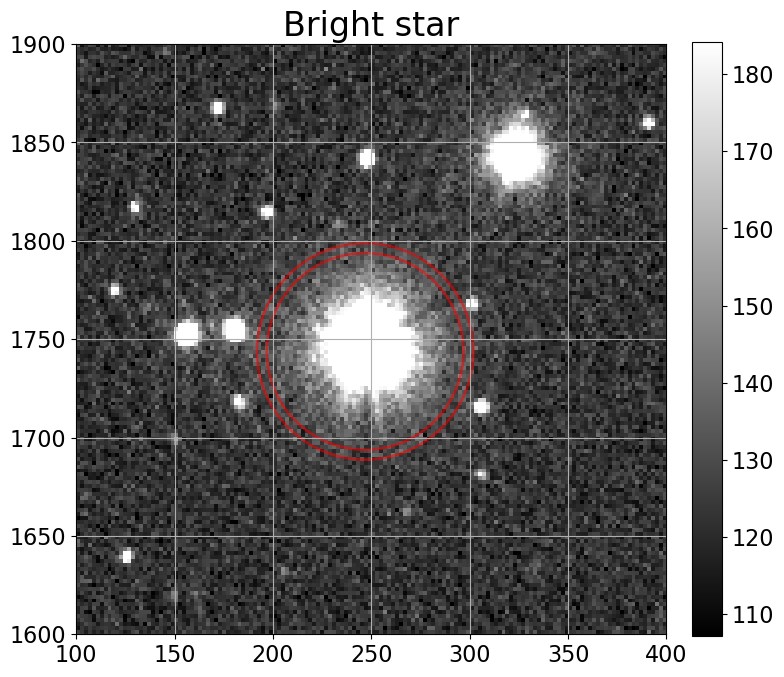

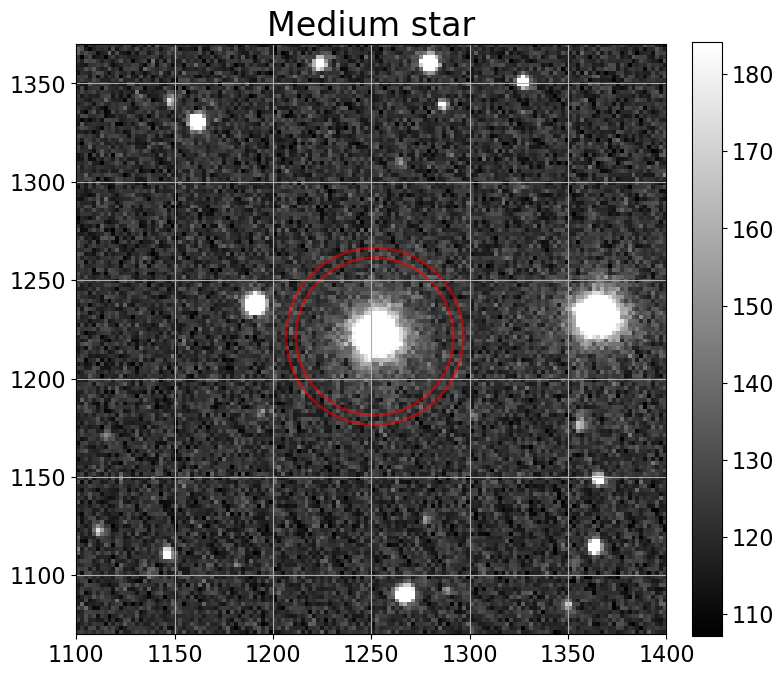

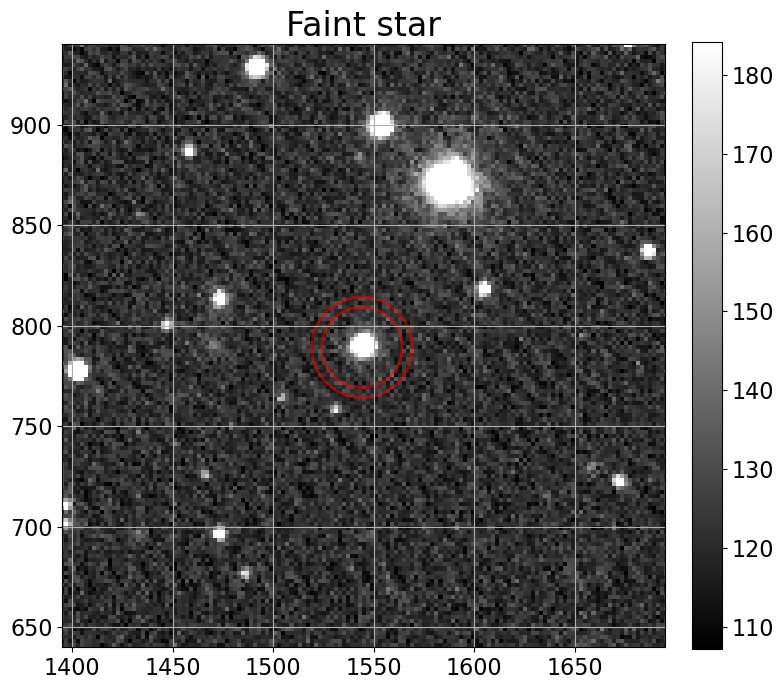

In [31]:
#choosing appropriate annulus for each star in order to get background count
bright_annulus = CircularAnnulus(positions[2], r_in=50., r_out=55.)
med_annulus = CircularAnnulus(positions[1], r_in=40., r_out=45.)
faint_annulus = CircularAnnulus(positions[0], r_in=20., r_out=25.)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
show_image(phot_data, cmap='gray', ax=ax1, fig=fig)
bright_annulus.plot(color='red', lw=2, alpha=0.5)
ax1.set_xlim([100,400])
ax1.set_ylim([1600,1900])
ax1.set_title('Bright star')
plt.tight_layout()

fig, ax2 = plt.subplots(1, 1, figsize=(8, 8))
show_image(phot_data, cmap='gray', ax=ax2, fig=fig)
med_annulus.plot(color='red', lw=2, alpha=0.5)
ax2.set_xlim([1100,1400])
ax2.set_ylim([1070,1370])
ax2.set_title('Medium star')
plt.tight_layout()

fig, ax3 = plt.subplots(1, 1, figsize=(8, 8))
show_image(phot_data, cmap='gray', ax=ax3, fig=fig)
faint_annulus.plot(color='red', lw=2, alpha=0.5)
ax3.set_xlim([1395,1695])
ax3.set_ylim([640,940])
ax3.set_title('Faint star')
plt.tight_layout()

In [32]:
#calculating mean background
#total counts in the background annulus divided by the area of that annulus

brt_ann_counts = aperture_photometry(phot_data, bright_annulus)
brt_ann_counts['aperture_sum'].info.format = '%.8g'
brt_backg = brt_ann_counts['aperture_sum'][0]/bright_annulus.area
med_ann_counts = aperture_photometry(phot_data, med_annulus)
med_ann_counts['aperture_sum'].info.format = '%.8g'
med_backg = med_ann_counts['aperture_sum'][0]/med_annulus.area
fnt_ann_counts = aperture_photometry(phot_data, faint_annulus)
fnt_ann_counts['aperture_sum'].info.format = '%.8g'
fnt_backg = fnt_ann_counts['aperture_sum'][0]/faint_annulus.area

In [33]:
#calculating signal for each star for each aperture
faint_sig = [tot_sig - fnt_backg*(np.pi*r**2) for tot_sig,r in zip(faint_tot_sig,radii)]
med_sig = [tot_sig - med_backg*(np.pi*r**2) for tot_sig,r in zip(medium_tot_sig,radii)]
bright_sig = [tot_sig - brt_backg*(np.pi*r**2) for tot_sig,r in zip(bright_tot_sig,radii)]

#calculating noise for each star for each aperture
faint_noise = [np.sqrt(sig) + fnt_backg*(np.pi*r**2) for sig,r in zip(faint_sig,radii)]
med_noise = [np.sqrt(sig) + med_backg*(np.pi*r**2) for sig,r in zip(med_sig,radii)]
bright_noise = [np.sqrt(sig) + brt_backg*(np.pi*r**2) for sig,r in zip(bright_sig,radii)]

#calculating S/N for each star for each aperture
faint_SNR = [sig/noise for sig,noise in zip(faint_sig,faint_noise)]
med_SNR = [sig/noise for sig,noise in zip(med_sig,med_noise)]
bright_SNR = [sig/noise for sig,noise in zip(bright_sig,bright_noise)]

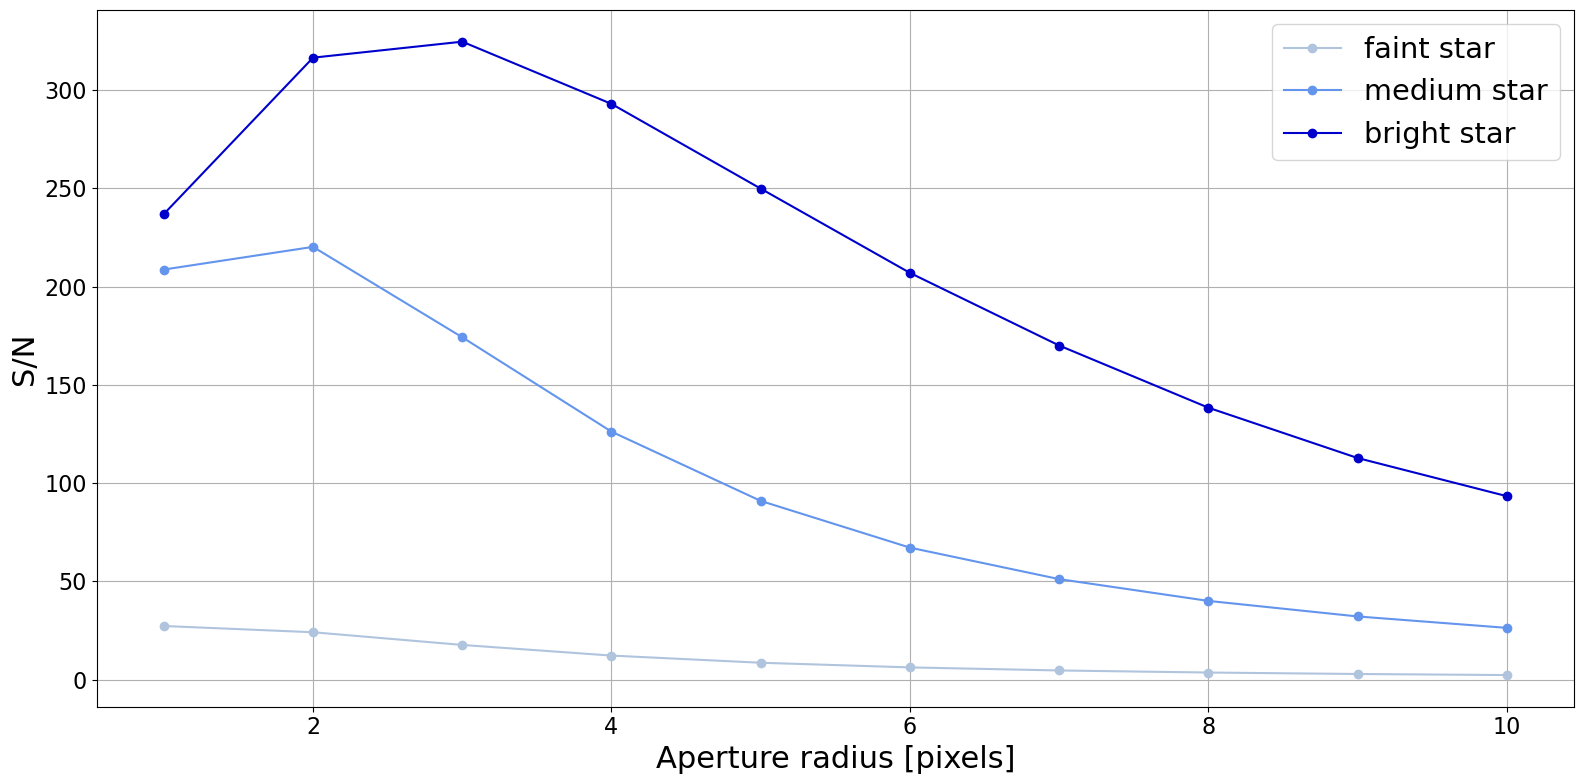

In [34]:
#plotting S/N as a function of aperture radius
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(radii, faint_SNR, color='lightsteelblue', marker='o', ls='solid', label='faint star')
ax.plot(radii, med_SNR, color='cornflowerblue', marker='o', ls='solid', label='medium star')
ax.plot(radii, bright_SNR, color='mediumblue', marker='o', ls='solid', label='bright star')
ax.set_ylabel(r'S/N',fontsize=22)
ax.set_xlabel(r'Aperture radius [pixels]',fontsize=22)
ax.legend()
fig.tight_layout()

From the plot above, it looks like 2-3 pixels is a good aperture radius to use. This roughly corresponds to the FWHM of the star.

# Q4

Identify the standard stars in the PG1633+099 frame from Landolt (1992).

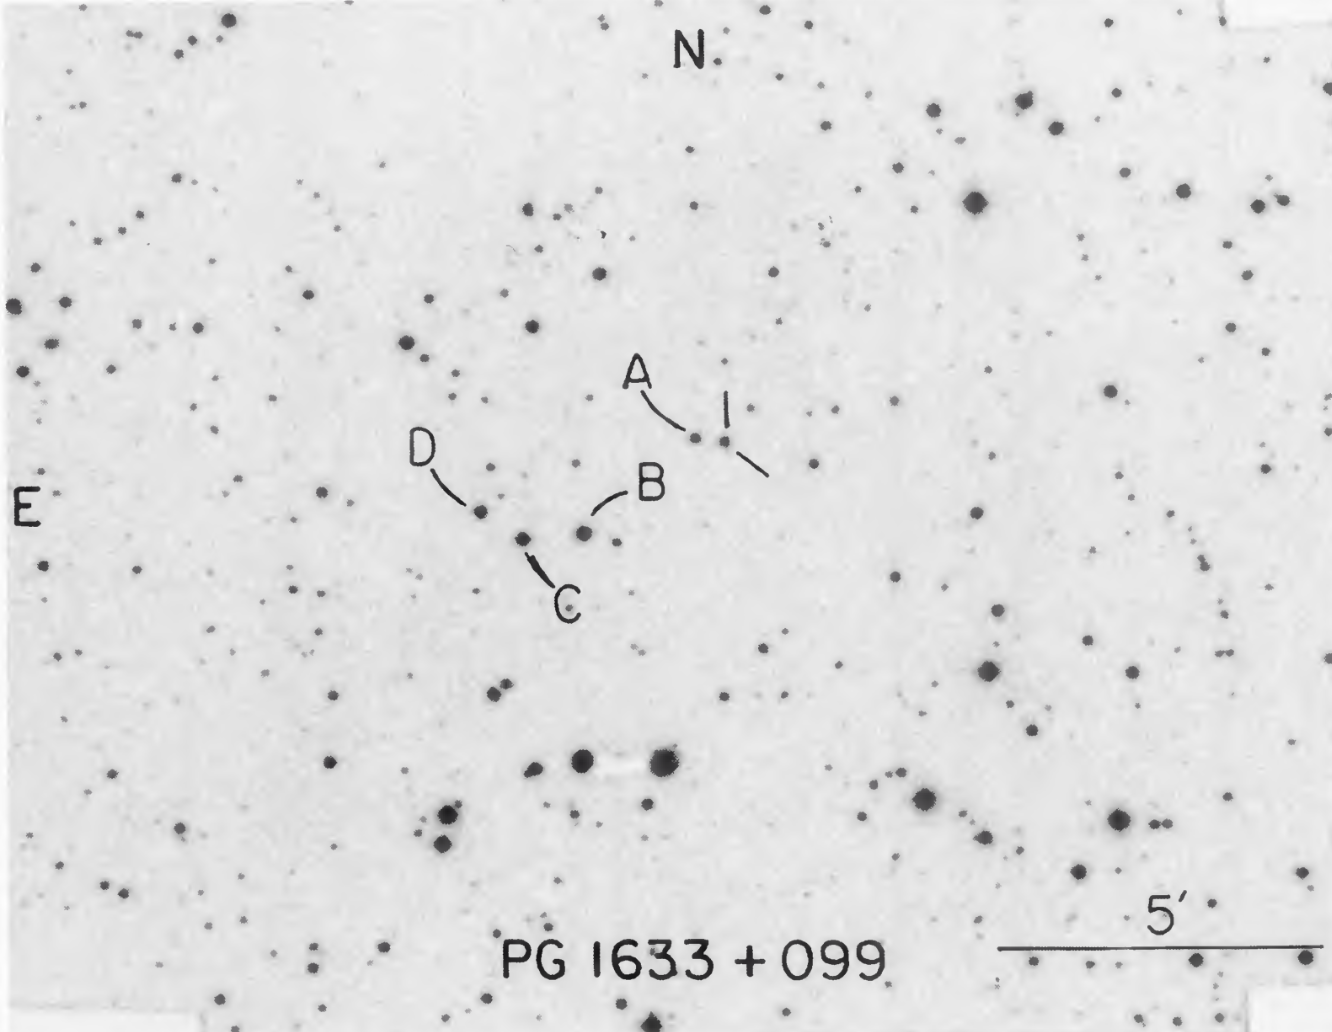

In [106]:
#In DS9, positions are roughly
x1 = 989.98474
y1 = 1050.3454
xA = 1045.5226
yA = 1044.4608
xB = 1253.0767
yB = 1222.0207
xC = 1365.5287
yC = 1232.411
xD = 1445.4413
yD = 1183.3881

Xs = []
Ys = []
indices = np.where(((sources['xcentroid']>(x1-5)) & (sources['xcentroid']<(x1+5)) & (sources['ycentroid']>(y1-5)) & (sources['ycentroid']<(y1+5)))|
                    ((sources['xcentroid']>(xA-5)) & (sources['xcentroid']<(xA+5)) & (sources['ycentroid']>(yA-5)) & (sources['ycentroid']<(yA+5)))|
                    ((sources['xcentroid']>(xB-5)) & (sources['xcentroid']<(xB+5)) & (sources['ycentroid']>(yB-5)) & (sources['ycentroid']<(yB+5)))|
                    ((sources['xcentroid']>(xC-5)) & (sources['xcentroid']<(xC+5)) & (sources['ycentroid']>(yC-5)) & (sources['ycentroid']<(yC+5)))|
                   ((sources['xcentroid']>(xD-5)) & (sources['xcentroid']<(xD+5)) & (sources['ycentroid']>(yD-5)) & (sources['ycentroid']<(yD+5))))
Xs.append(sources['xcentroid'][indices])
Ys.append(sources['ycentroid'][indices])

positions = [(x,y) for x,y in zip(Xs,Ys)]
positions = [(p_x,p_y) for p_x,p_y in zip(positions[0][0],positions[0][1])]
positions = sorted(positions, key=lambda k: [k[0]])
apertures = [CircularAperture(p, r=25) for p in positions]

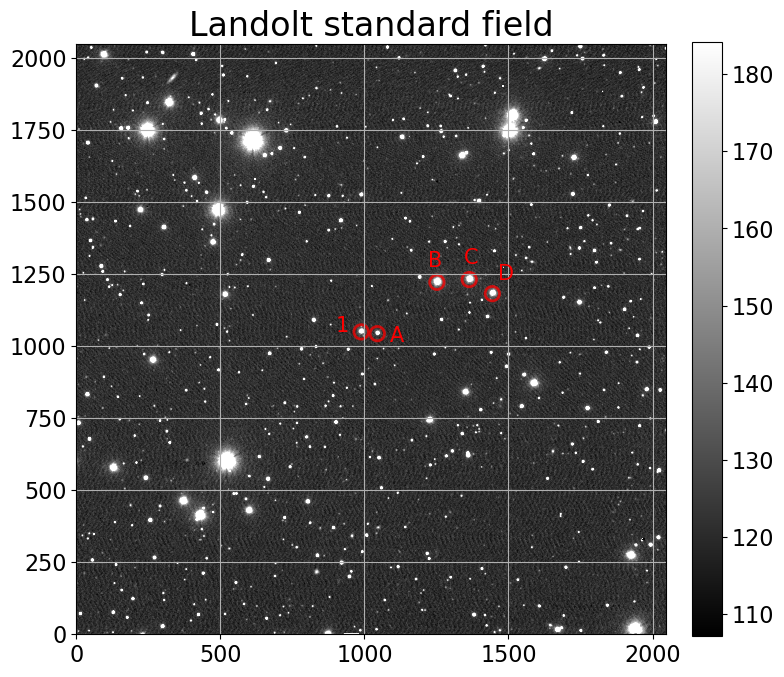

In [36]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
show_image(phot_data, cmap='gray', ax=ax1, fig=fig)
for ap in apertures:
    ap.plot(color='red', lw=2, alpha=0.75)
ax1.set_title('Landolt standard field')
ax1.text(900,1050,'1',color='red',fontsize=15)
ax1.text(1090,1015,'A',color='red',fontsize=15)
ax1.text(1220,1275,'B',color='red',fontsize=15)
ax1.text(1345,1285,'C',color='red',fontsize=15)
ax1.text(1465,1230,'D',color='red',fontsize=15)
plt.tight_layout()

# Q5

Extract instrumental magnitudes for the UBVRI filters for all of your standard stars using an approach that you’ve advocated for as best you can in the questions above.

In [76]:
#get U, B, V, R, I images of PG1633+099
#using images with lowest airmass, 1.18
filters = ['U','B','V','R','I']
pg1633_files = ['a082otzf.fits','a083otzf.fits','a085otzf.fits','a087otzf.fits','a089otzf.fits']
hdus = [fits.open(reduced_dir+file) for file in pg1633_files]
pg1633_data = [hdu[0].data for hdu in hdus]

In [88]:
pg1633_sources = []
for image in pg1633_data:
    mean, median, std = sigma_clipped_stats(image, sigma=3.0)
    daofind = DAOStarFinder(fwhm=4.0, threshold=5.*std)
    sources = daofind(image - median)
    for col in sources.colnames:  
        sources[col].info.format = '%.8g'
    pg1633_sources.append(sources)

#getting positions of each star in each image
Xs = []
Ys = []
for i in range(0,5):
    s = pg1633_sources[i]
    indices = np.where(((s['xcentroid']>(x1-5)) & (s['xcentroid']<(x1+5)) & (s['ycentroid']>(y1-5)) & (s['ycentroid']<(y1+5)))|
                    ((s['xcentroid']>(xA-5)) & (s['xcentroid']<(xA+5)) & (s['ycentroid']>(yA-5)) & (s['ycentroid']<(yA+5)))|
                    ((s['xcentroid']>(xB-5)) & (s['xcentroid']<(xB+5)) & (s['ycentroid']>(yB-5)) & (s['ycentroid']<(yB+5)))|
                    ((s['xcentroid']>(xC-5)) & (s['xcentroid']<(xC+5)) & (s['ycentroid']>(yC-5)) & (s['ycentroid']<(yC+5)))|
                   ((s['xcentroid']>(xD-5)) & (s['xcentroid']<(xD+5)) & (s['ycentroid']>(yD-5)) & (s['ycentroid']<(yD+5))))
    Xs.append(s['xcentroid'][indices])
    Ys.append(s['ycentroid'][indices])

In [74]:
#pairing appropriate Xs and Ys for each filter
positions = [(x,y) for x,y in zip(Xs,Ys)]

#reorganizing star positions
star_positions = []
for i in range(0,len(positions)):
    filter_data = positions[i]
    x_data = filter_data[0]
    y_data = filter_data[1]
    filter_positions = []
    for j in range(0,len(x_data)):
        x_num = x_data[j]
        y_num = y_data[j]
        filter_positions.append((x_num,y_num))
    star_positions.append(filter_positions)

star_positions = [sorted(array, key=lambda k: [k[0]]) for array in star_positions]

Filter: U
xc=990.7639	yc=1048.7889


INFO:imexam.util:xc=990.7639	yc=1048.7889


Background per pixel: 39.15450620750057


INFO:imexam.util:Background per pixel: 39.15450620750057


Max. pix. flux =  8155.066
amp =  8729.180
fwhm =     4.528


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  8155.066
amp =  8729.180
fwhm =     4.528


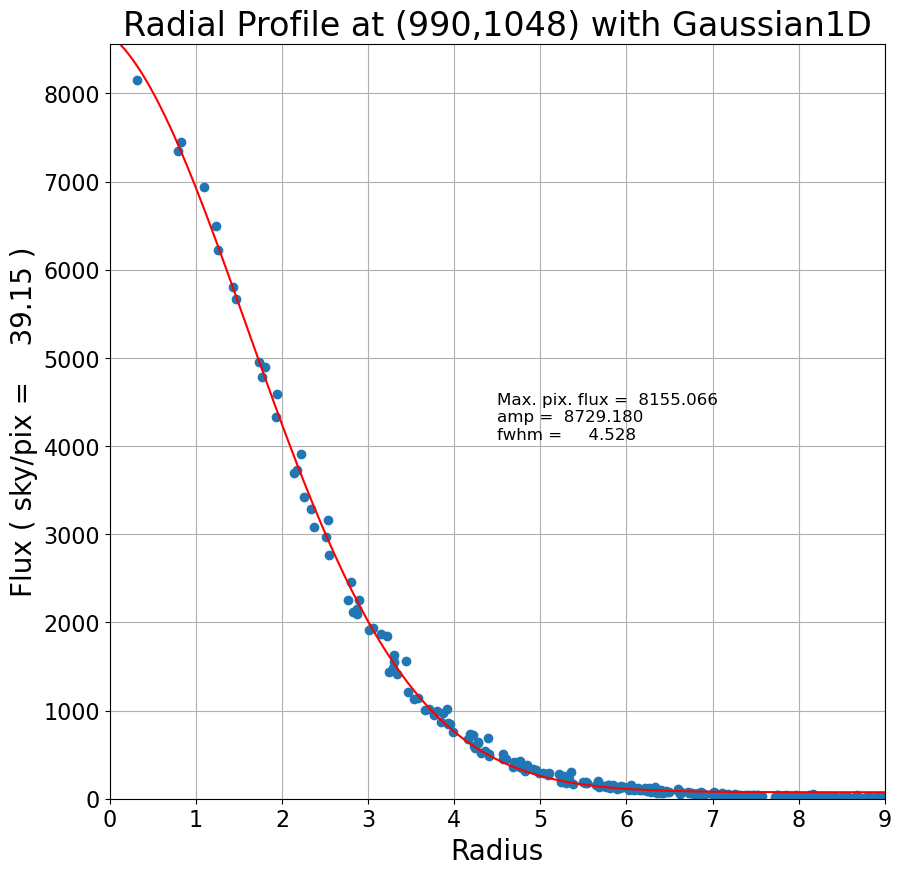

Filter: U
xc=1046.6198	yc=1042.8807


INFO:imexam.util:xc=1046.6198	yc=1042.8807


Background per pixel: 31.84880037404513


INFO:imexam.util:Background per pixel: 31.84880037404513


Max. pix. flux =   562.024
amp =   567.213
fwhm =     4.322


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =   562.024
amp =   567.213
fwhm =     4.322


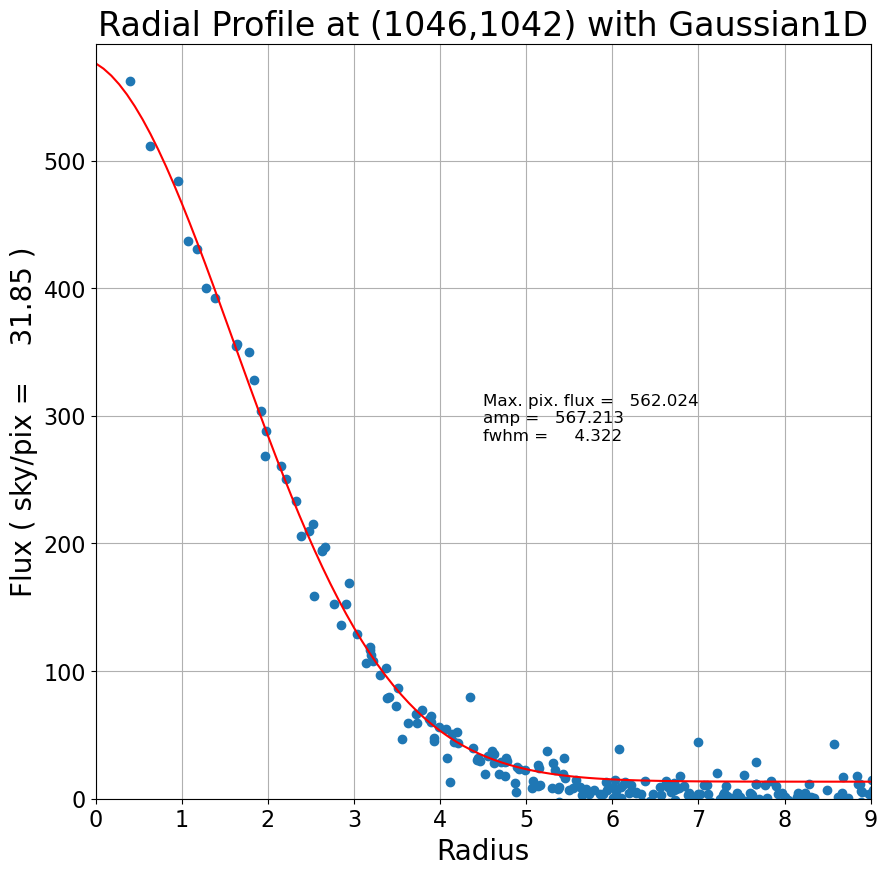

Filter: U
xc=1253.3654	yc=1220.8597


INFO:imexam.util:xc=1253.3654	yc=1220.8597


Background per pixel: 33.03929433536187


INFO:imexam.util:Background per pixel: 33.03929433536187


Max. pix. flux =  2042.594
amp =  2188.209
fwhm =     4.463


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  2042.594
amp =  2188.209
fwhm =     4.463


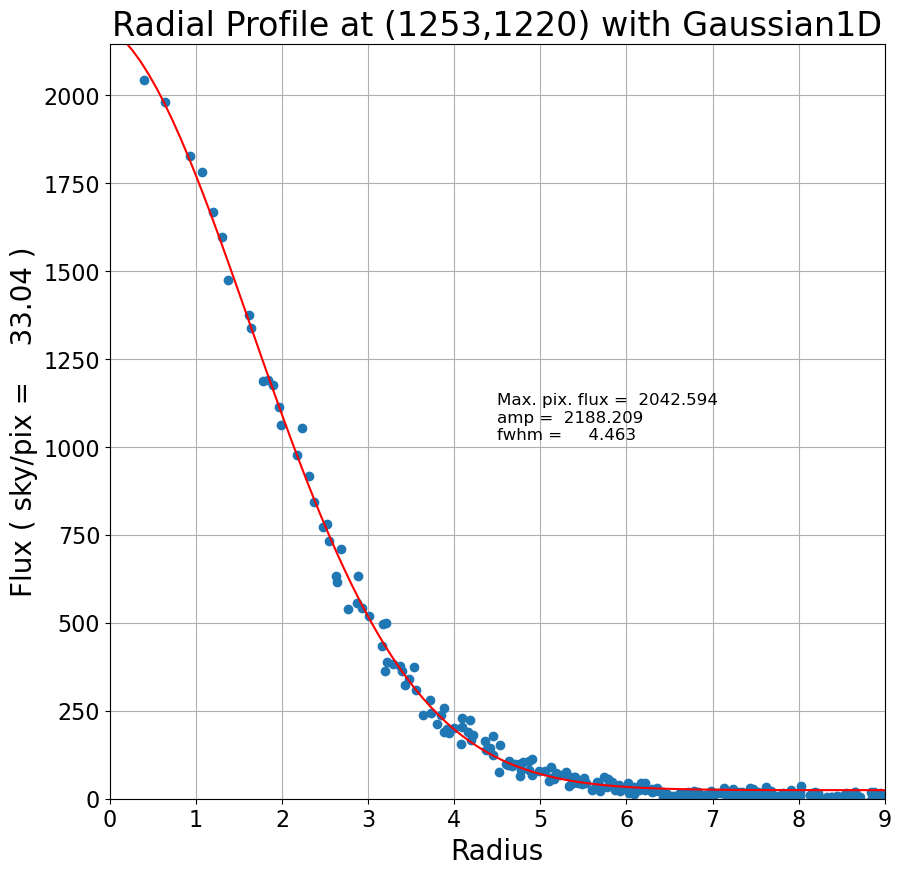

Filter: U
xc=1365.6298	yc=1230.4984


INFO:imexam.util:xc=1365.6298	yc=1230.4984


Background per pixel: 32.25959692695448


INFO:imexam.util:Background per pixel: 32.25959692695448


Max. pix. flux =  1394.319
amp =  1540.842
fwhm =     4.478


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  1394.319
amp =  1540.842
fwhm =     4.478


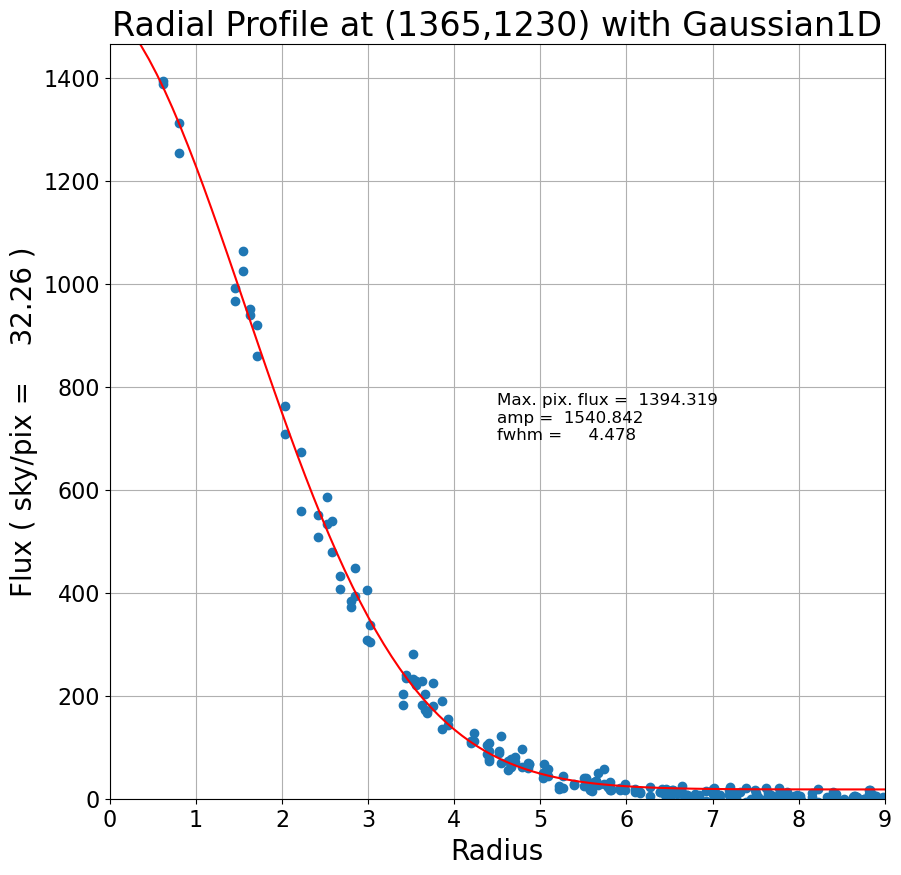

Filter: U
xc=1445.5868	yc=1181.4574


INFO:imexam.util:xc=1445.5868	yc=1181.4574


Background per pixel: 35.133176287599376


INFO:imexam.util:Background per pixel: 35.133176287599376


Max. pix. flux =  3826.338
amp =  4240.723
fwhm =     4.457


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  3826.338
amp =  4240.723
fwhm =     4.457


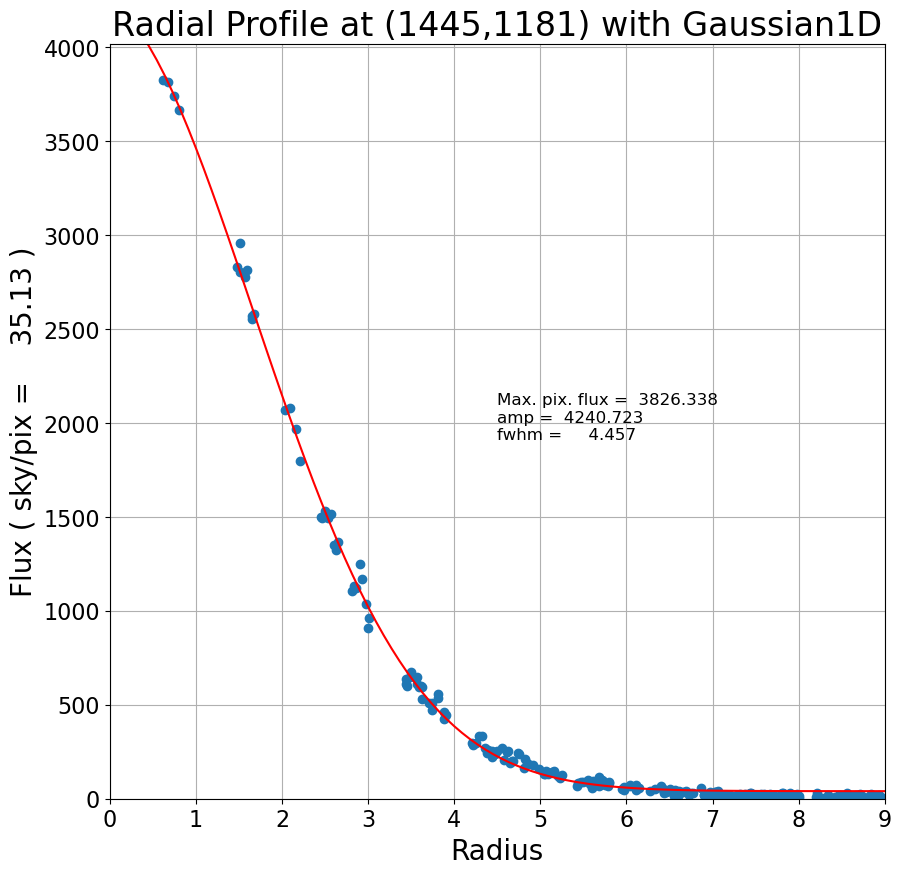

Filter: B
xc=989.7946	yc=1049.1143


INFO:imexam.util:xc=989.7946	yc=1049.1143


Background per pixel: 97.63139722025946


INFO:imexam.util:Background per pixel: 97.63139722025946


Max. pix. flux = 28319.517
amp = 32404.902
fwhm =     4.234


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux = 28319.517
amp = 32404.902
fwhm =     4.234


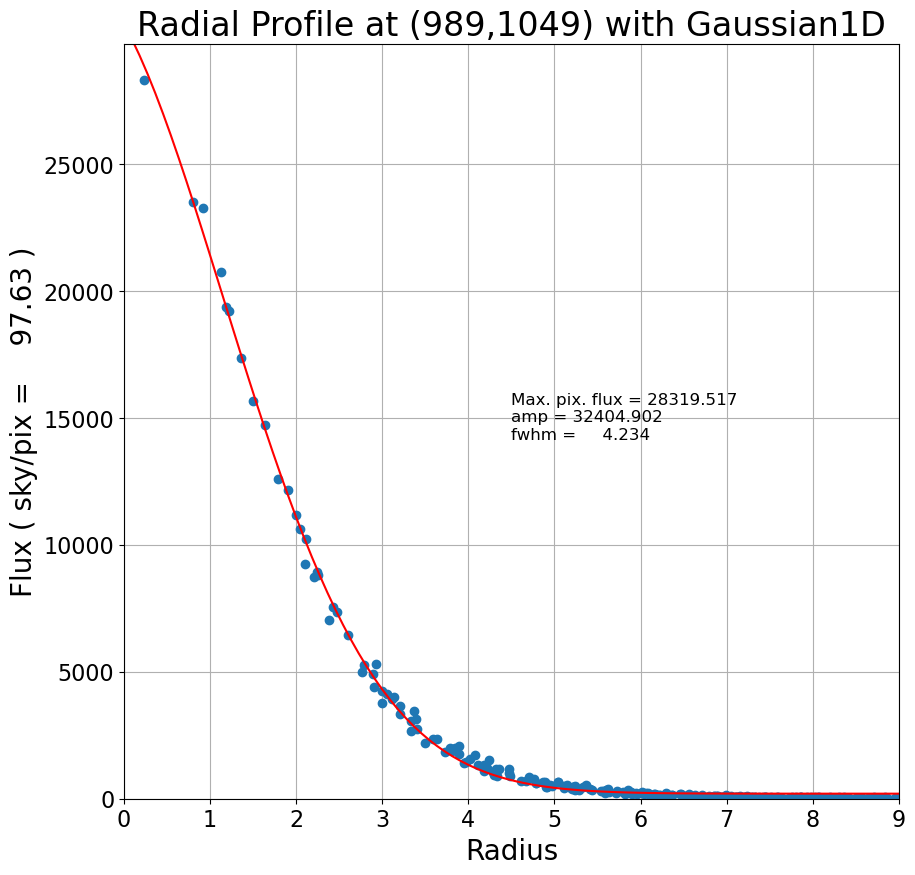

Filter: B
xc=1045.7128	yc=1043.1197


INFO:imexam.util:xc=1045.7128	yc=1043.1197


Background per pixel: 80.44479020084117


INFO:imexam.util:Background per pixel: 80.44479020084117


Max. pix. flux =  5137.074
amp =  5883.985
fwhm =     4.125


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  5137.074
amp =  5883.985
fwhm =     4.125


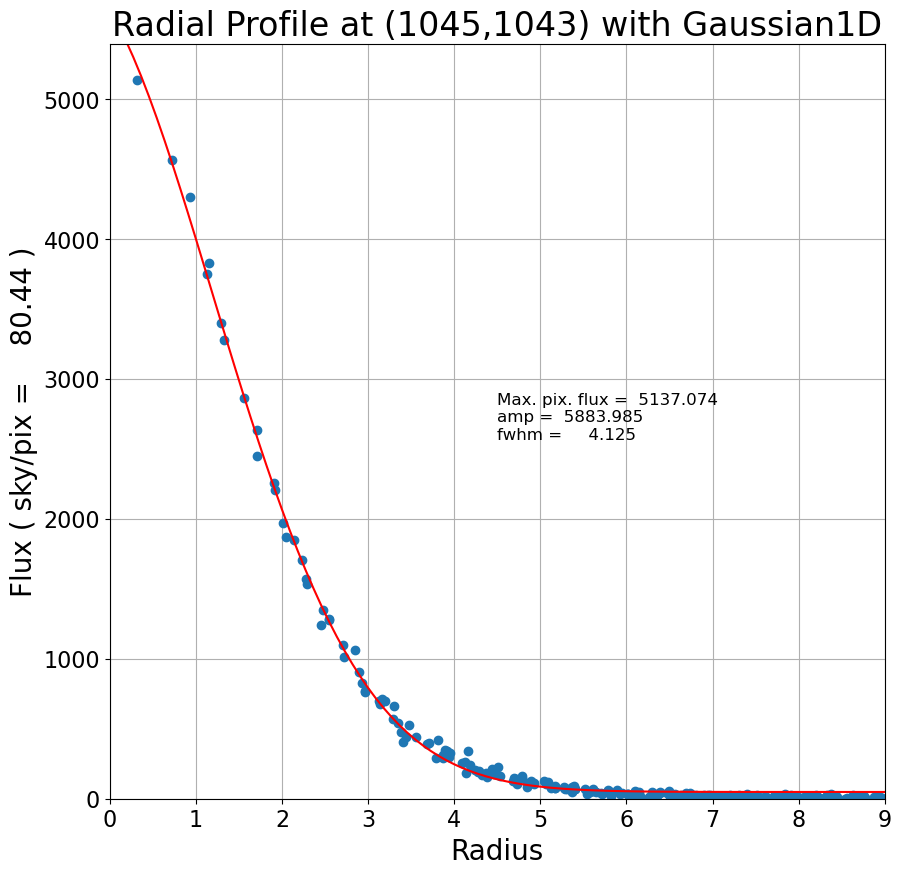

Filter: B
xc=1252.5096	yc=1221.2246


INFO:imexam.util:xc=1252.5096	yc=1221.2246


Background per pixel: 104.57970986904222


INFO:imexam.util:Background per pixel: 104.57970986904222


Max. pix. flux = 35412.099
amp = 47233.017
fwhm =     4.416


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux = 35412.099
amp = 47233.017
fwhm =     4.416


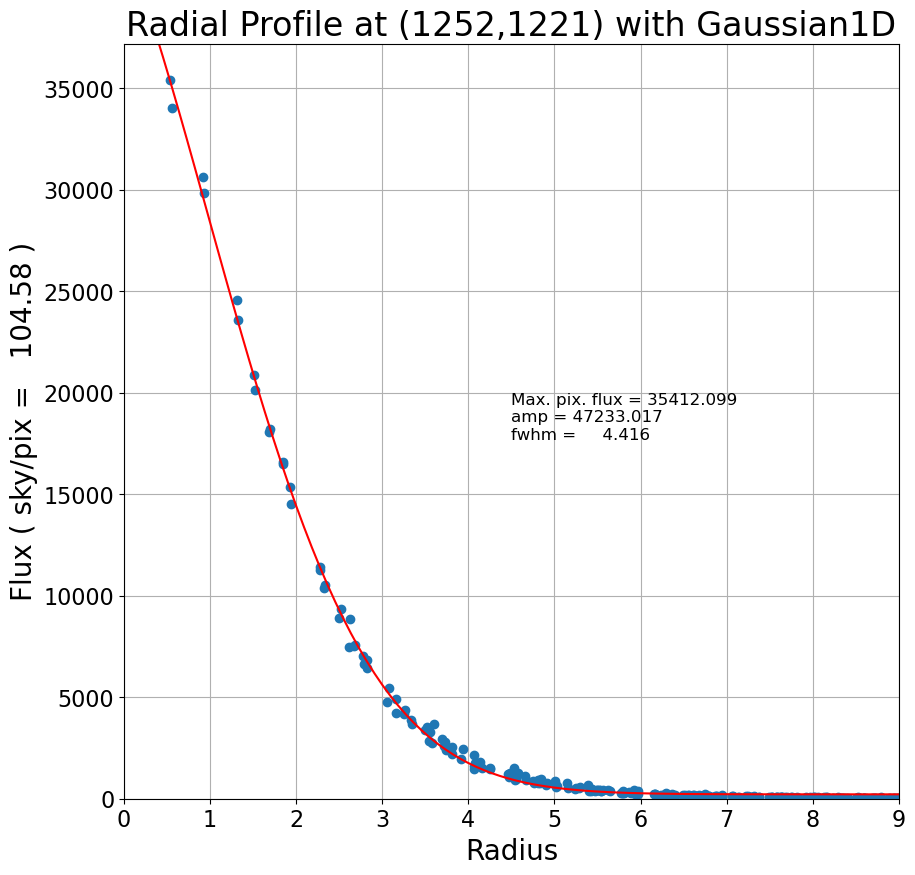

Filter: B
xc=1364.8240	yc=1230.8177


INFO:imexam.util:xc=1364.8240	yc=1230.8177


Background per pixel: 97.29198697479715


INFO:imexam.util:Background per pixel: 97.29198697479715


Max. pix. flux = 28195.593
amp = 32210.036
fwhm =     4.166


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux = 28195.593
amp = 32210.036
fwhm =     4.166


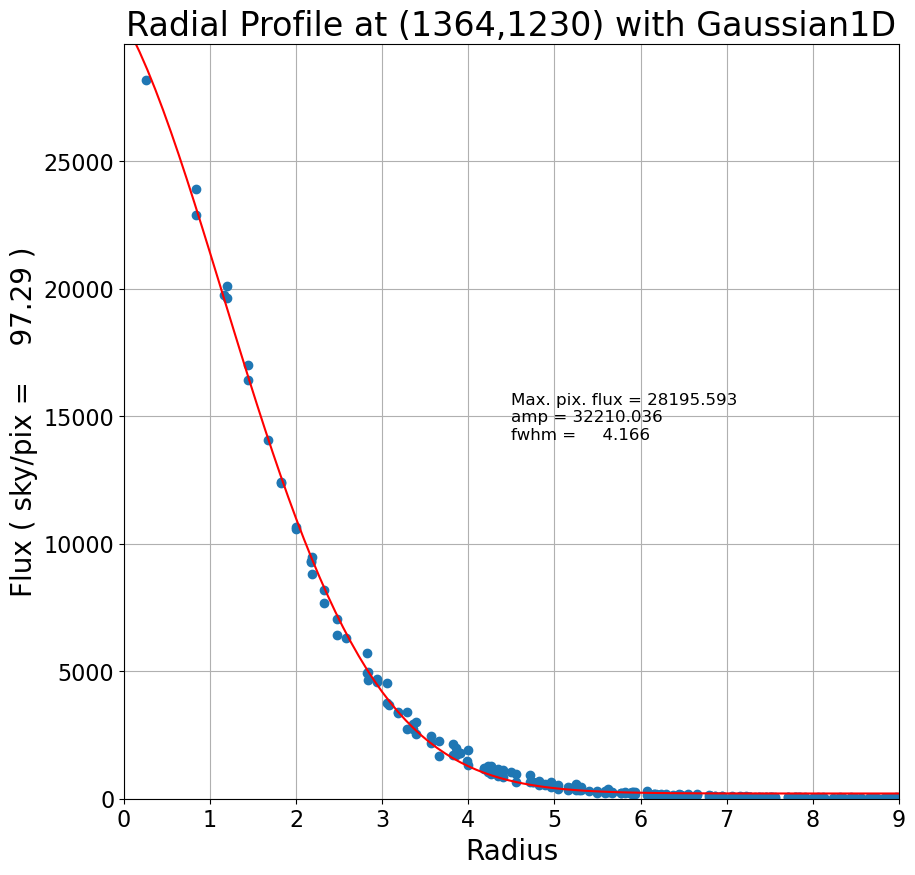

Filter: B
xc=1444.8015	yc=1181.8429


INFO:imexam.util:xc=1444.8015	yc=1181.8429


Background per pixel: 99.37495832685867


INFO:imexam.util:Background per pixel: 99.37495832685867


Max. pix. flux = 29380.864
amp = 33828.152
fwhm =     4.280


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux = 29380.864
amp = 33828.152
fwhm =     4.280


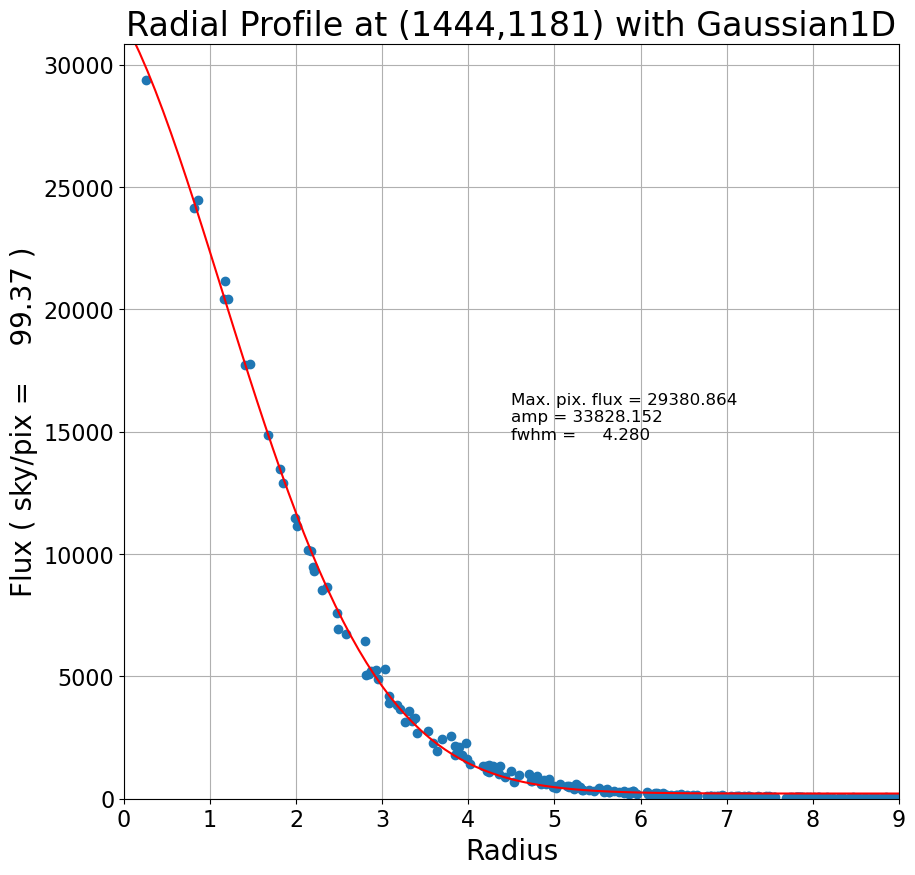

Filter: V
xc=988.8694	yc=1049.2810


INFO:imexam.util:xc=988.8694	yc=1049.2810


Background per pixel: 138.19861792740804


INFO:imexam.util:Background per pixel: 138.19861792740804


Max. pix. flux = 16798.251
amp = 18630.918
fwhm =     4.259


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux = 16798.251
amp = 18630.918
fwhm =     4.259


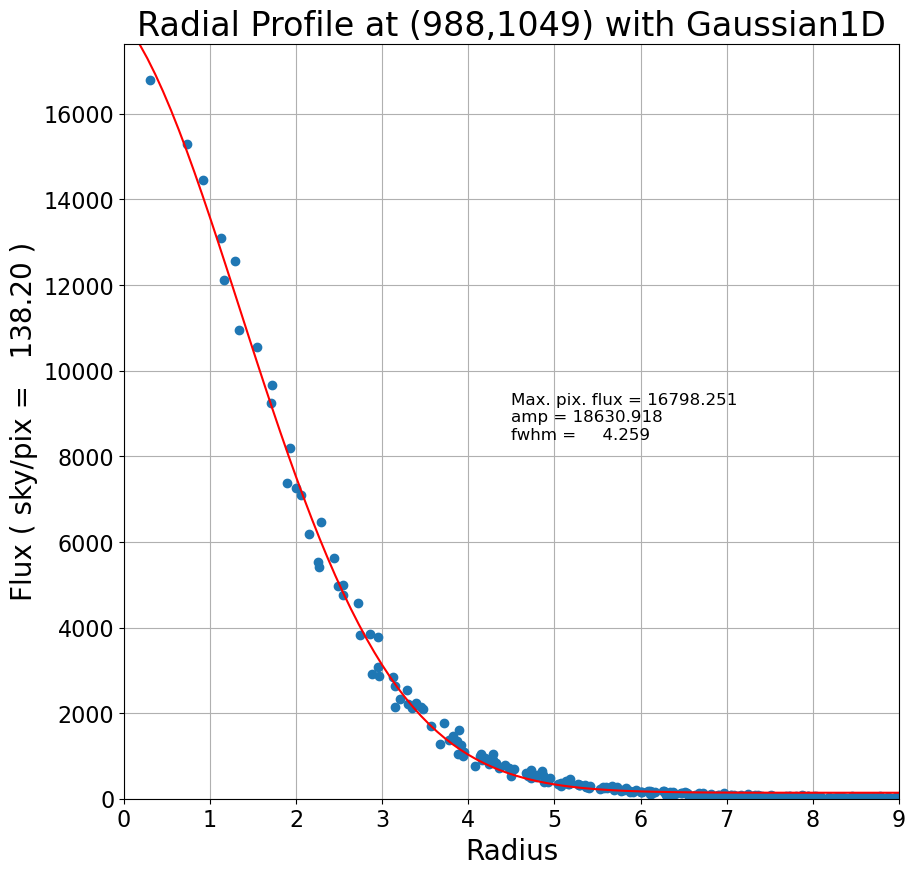

Filter: V
xc=1044.8046	yc=1043.2180


INFO:imexam.util:xc=1044.8046	yc=1043.2180


Background per pixel: 128.6228244376187


INFO:imexam.util:Background per pixel: 128.6228244376187


Max. pix. flux =  7132.588
amp =  7704.514
fwhm =     4.132


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  7132.588
amp =  7704.514
fwhm =     4.132


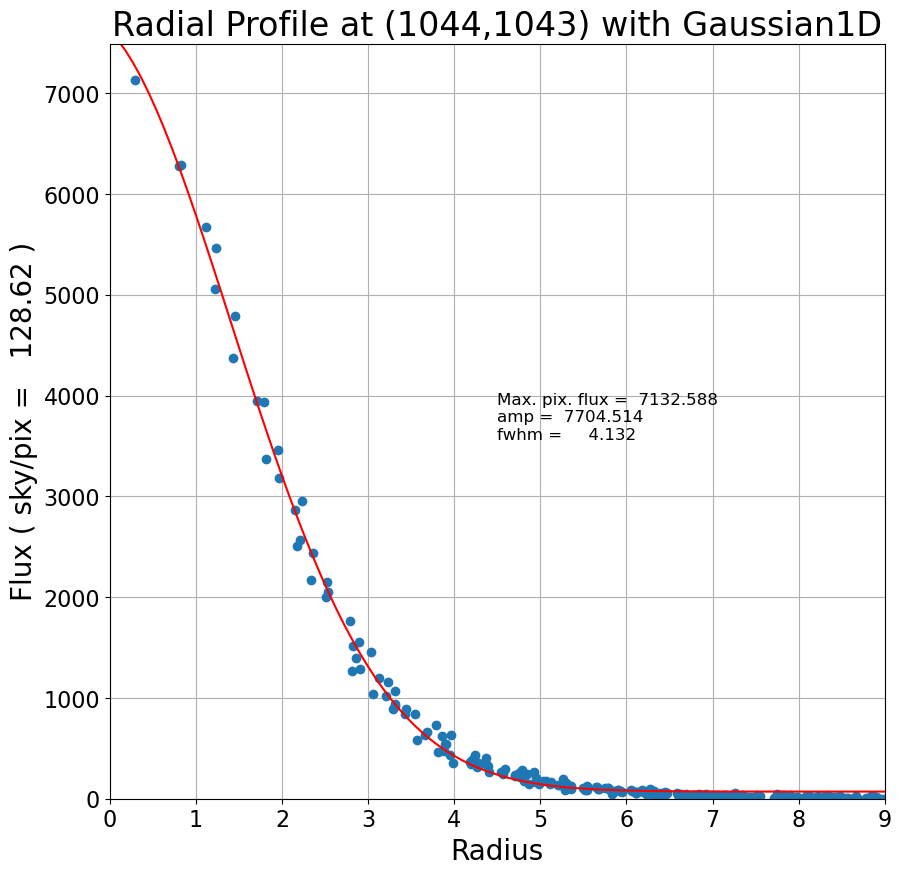

Filter: V
xc=1251.6684	yc=1221.4309


INFO:imexam.util:xc=1251.6684	yc=1221.4309


Background per pixel: 173.73628677409664


INFO:imexam.util:Background per pixel: 173.73628677409664


Max. pix. flux = 56000.260
amp = 65980.496
fwhm =     4.229


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux = 56000.260
amp = 65980.496
fwhm =     4.229


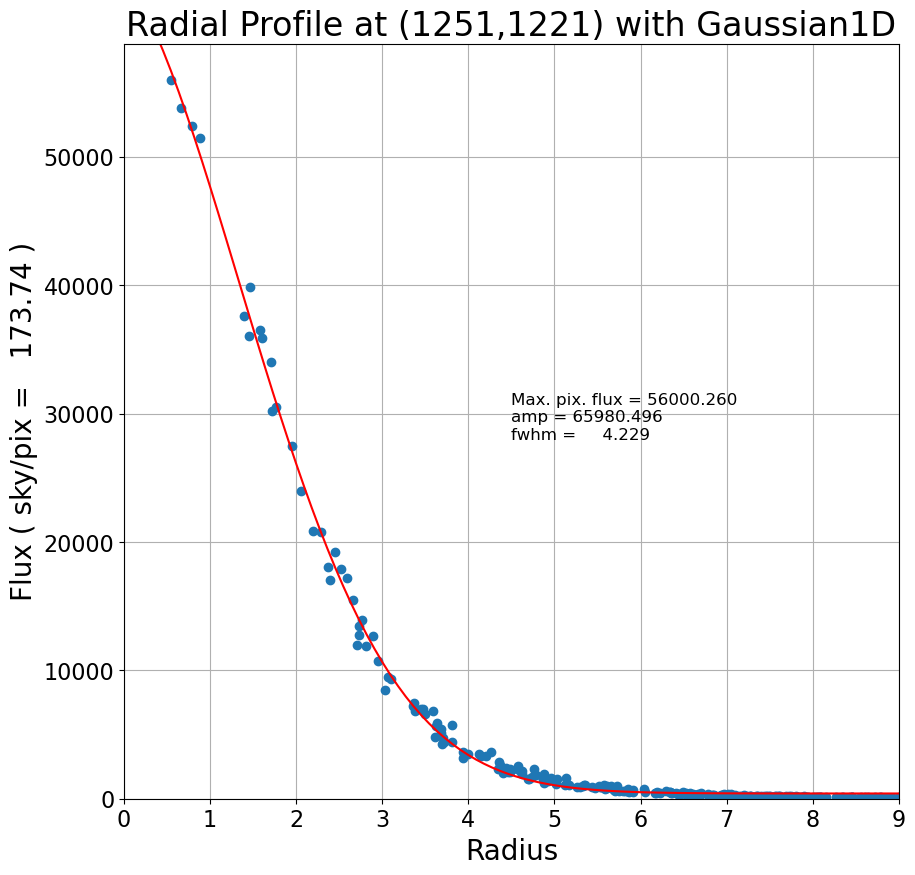

Filter: V
xc=1363.9825	yc=1230.9681


INFO:imexam.util:xc=1363.9825	yc=1230.9681


Background per pixel: 161.99470609298112


INFO:imexam.util:Background per pixel: 161.99470609298112


Max. pix. flux = 47120.532
amp = 48201.282
fwhm =     4.024


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux = 47120.532
amp = 48201.282
fwhm =     4.024


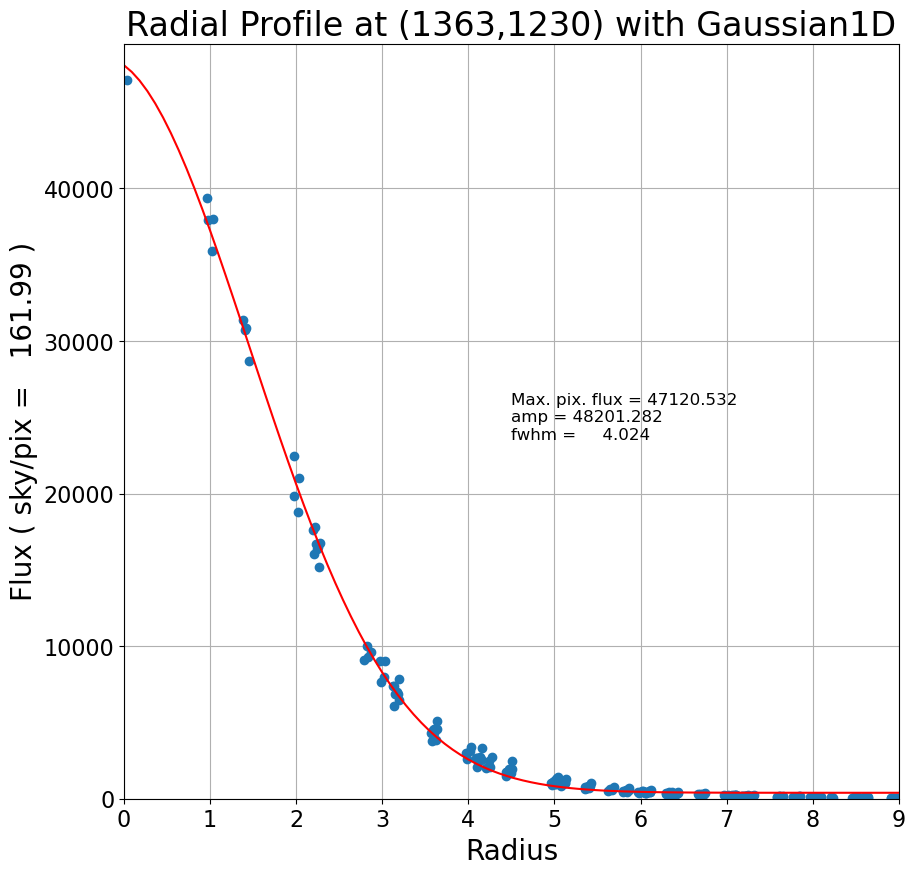

Filter: V
xc=1444.0146	yc=1182.0366


INFO:imexam.util:xc=1444.0146	yc=1182.0366


Background per pixel: 150.61063089361045


INFO:imexam.util:Background per pixel: 150.61063089361045


Max. pix. flux = 30864.380
amp = 31541.481
fwhm =     4.073


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux = 30864.380
amp = 31541.481
fwhm =     4.073


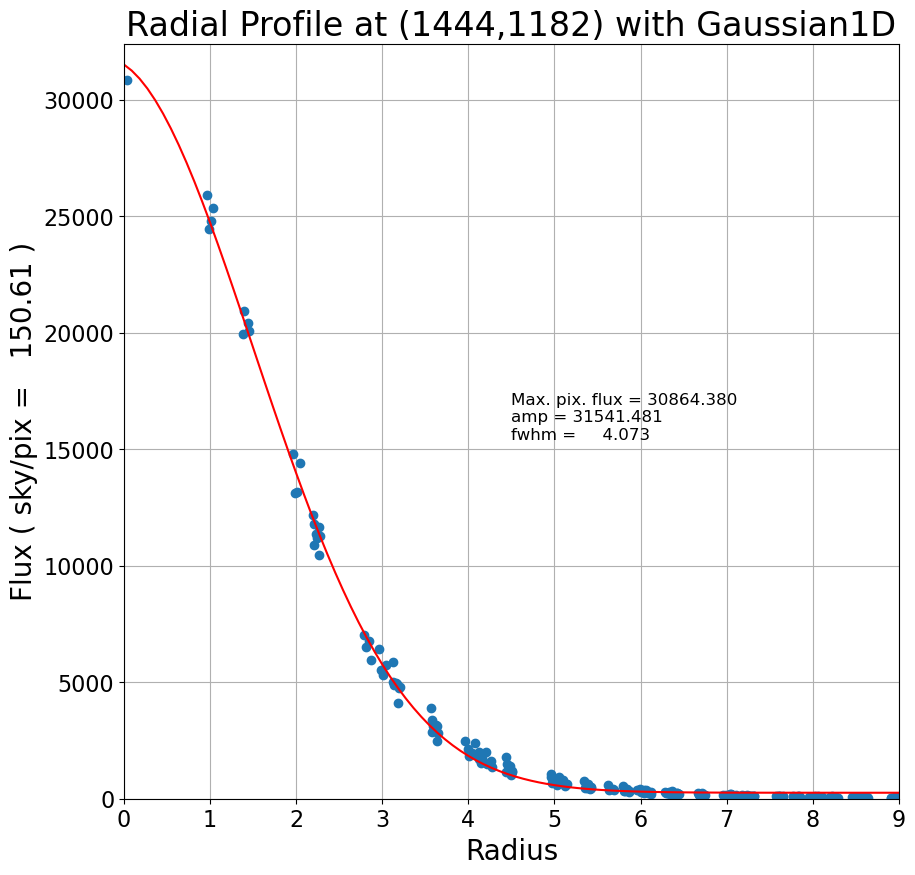

Filter: R
xc=988.7266	yc=1049.8629


INFO:imexam.util:xc=988.7266	yc=1049.8629


Background per pixel: 112.52512387358452


INFO:imexam.util:Background per pixel: 112.52512387358452


Max. pix. flux =  7880.149
amp =  8566.898
fwhm =     4.131


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  7880.149
amp =  8566.898
fwhm =     4.131


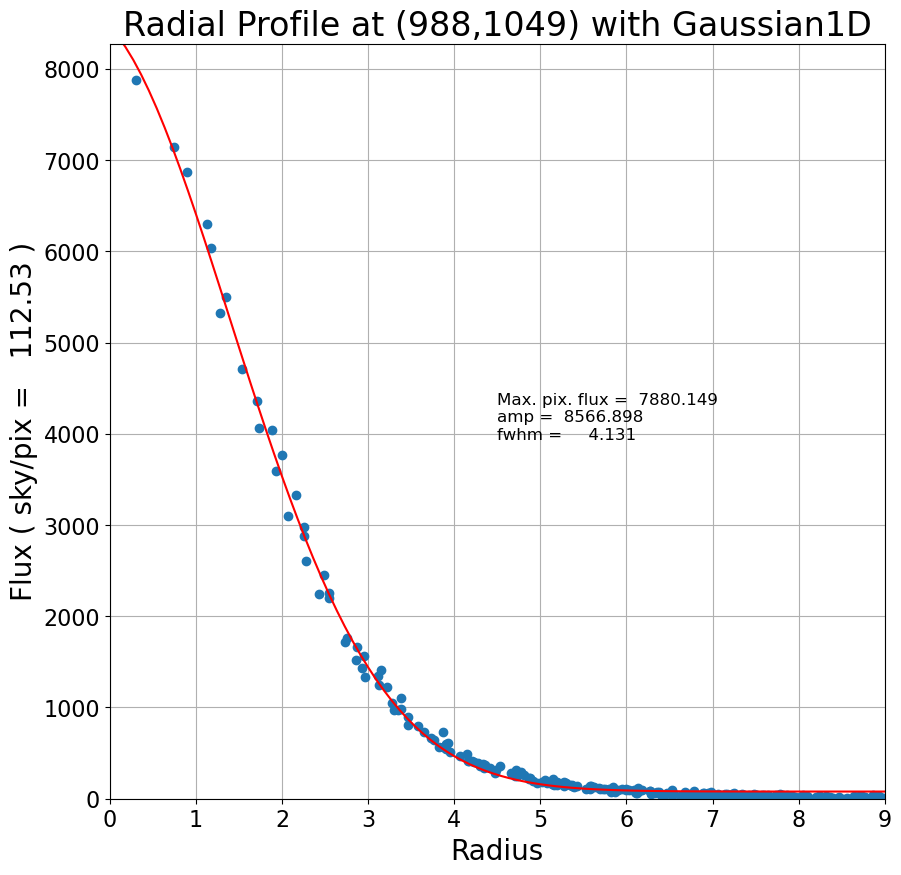

Filter: R
xc=1044.6481	yc=1043.8331


INFO:imexam.util:xc=1044.6481	yc=1043.8331


Background per pixel: 111.04042550264204


INFO:imexam.util:Background per pixel: 111.04042550264204


Max. pix. flux =  5605.163
amp =  6094.775
fwhm =     4.069


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  5605.163
amp =  6094.775
fwhm =     4.069


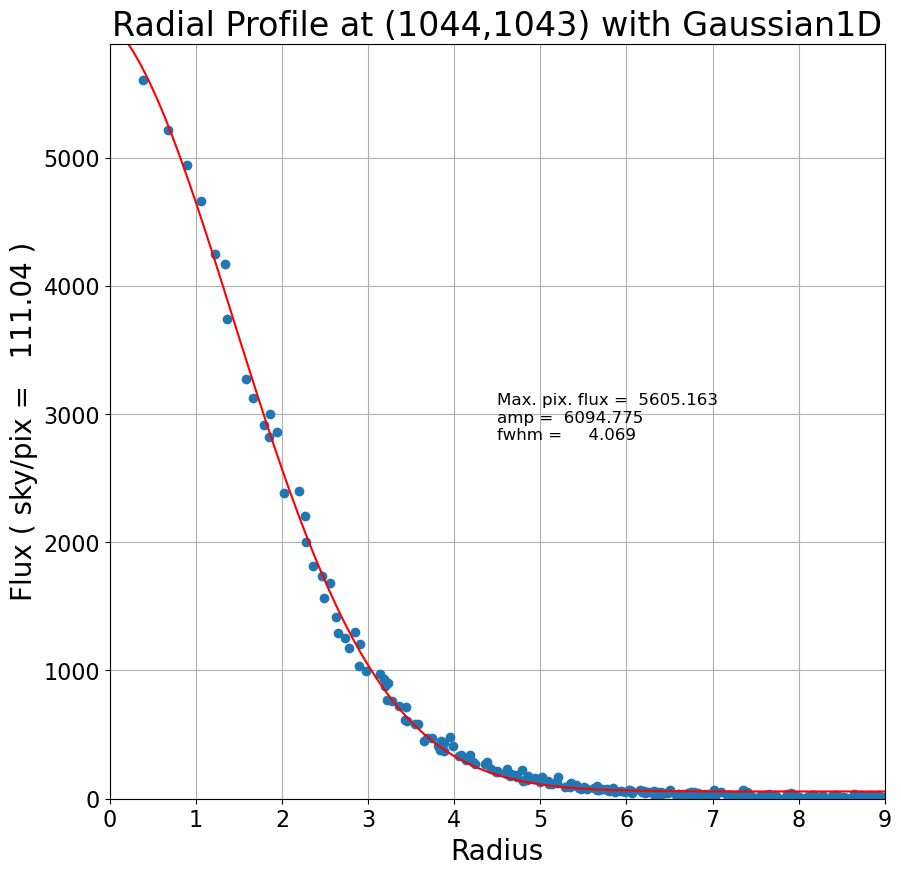

Filter: R
xc=1251.4667	yc=1221.9079


INFO:imexam.util:xc=1251.4667	yc=1221.9079


Background per pixel: 151.65765005704563


INFO:imexam.util:Background per pixel: 151.65765005704563


Max. pix. flux = 49928.181
amp = 58137.774
fwhm =     4.232


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux = 49928.181
amp = 58137.774
fwhm =     4.232


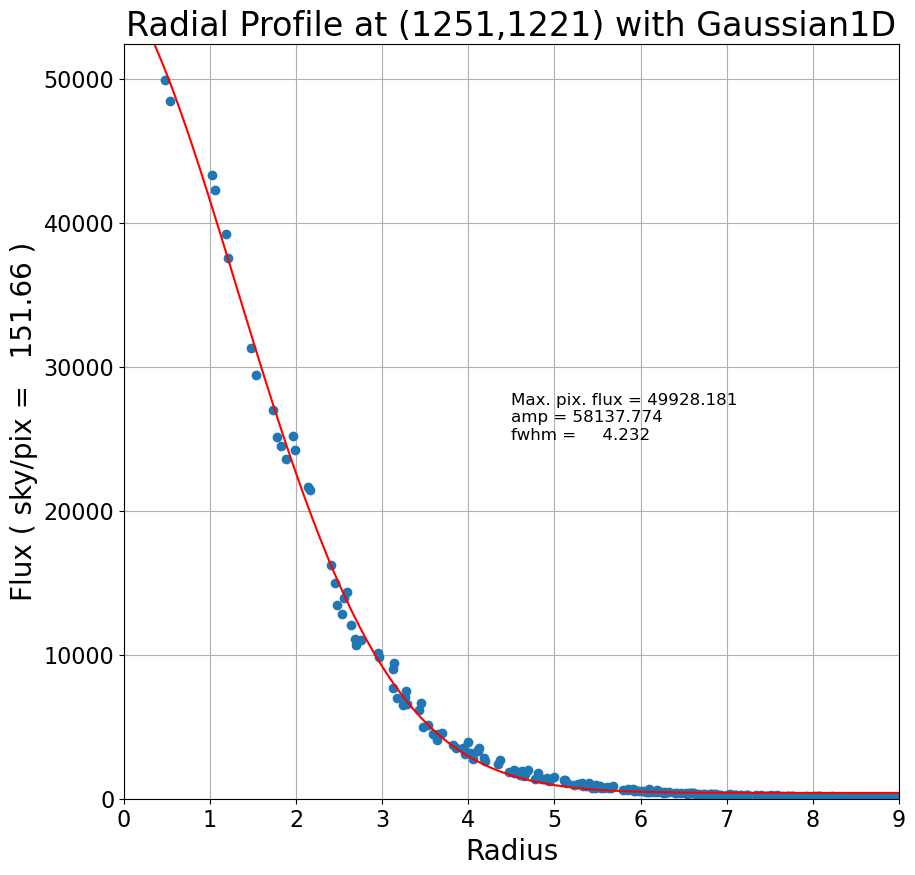

Filter: R
xc=1363.7776	yc=1231.5033


INFO:imexam.util:xc=1363.7776	yc=1231.5033


Background per pixel: 143.95968888969068


INFO:imexam.util:Background per pixel: 143.95968888969068


Max. pix. flux = 39869.943
amp = 47236.444
fwhm =     4.274


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux = 39869.943
amp = 47236.444
fwhm =     4.274


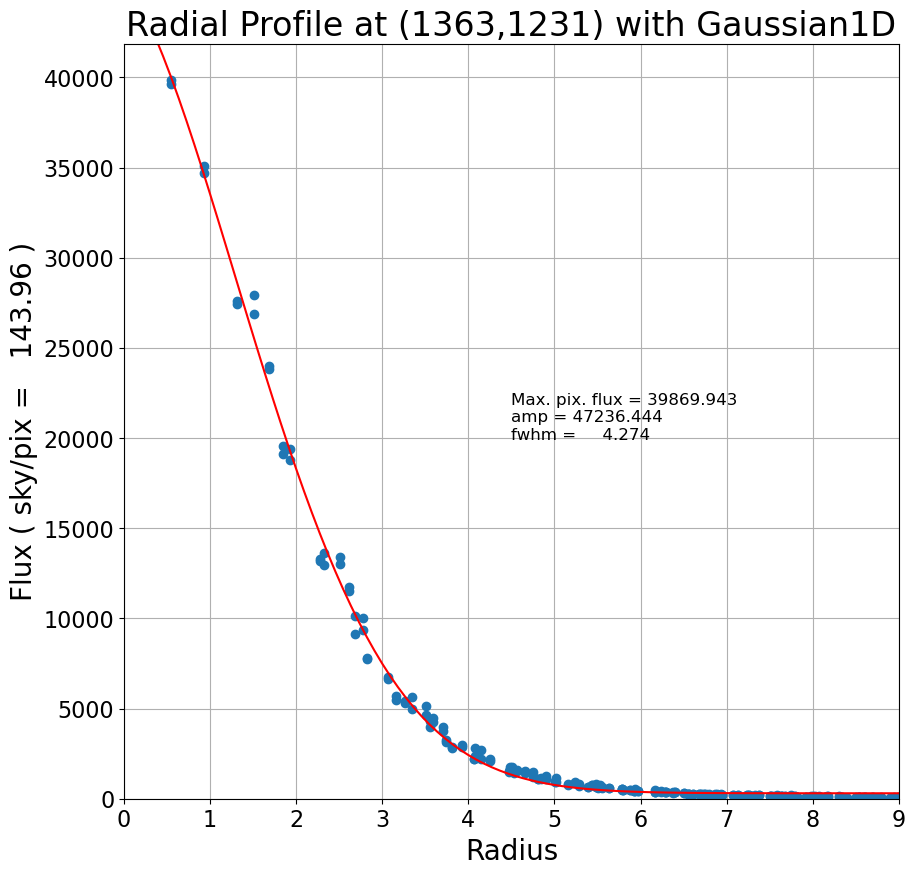

Filter: R
xc=1443.8077	yc=1182.5491


INFO:imexam.util:xc=1443.8077	yc=1182.5491


Background per pixel: 124.9092708534118


INFO:imexam.util:Background per pixel: 124.9092708534118


Max. pix. flux = 20443.719
amp = 24341.938
fwhm =     4.326


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux = 20443.719
amp = 24341.938
fwhm =     4.326


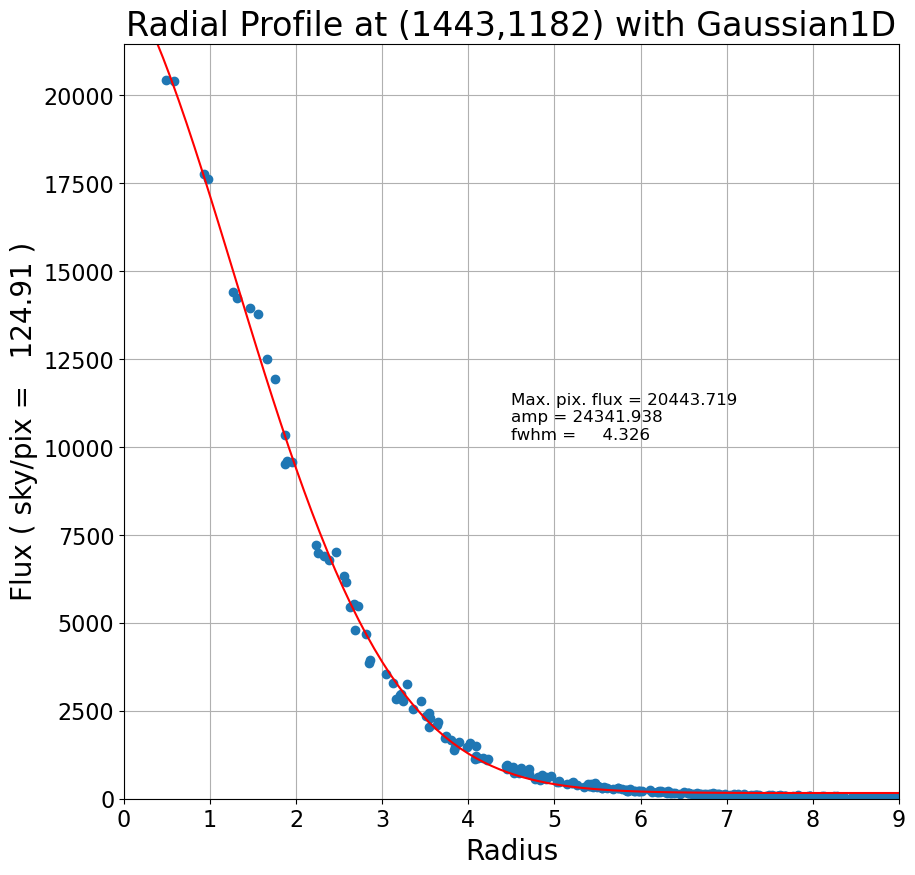

Filter: I
xc=986.1107	yc=1050.3540


INFO:imexam.util:xc=986.1107	yc=1050.3540


Background per pixel: 387.7788202347358


INFO:imexam.util:Background per pixel: 387.7788202347358


Max. pix. flux =  4483.448
amp =  4744.527
fwhm =     3.887


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  4483.448
amp =  4744.527
fwhm =     3.887


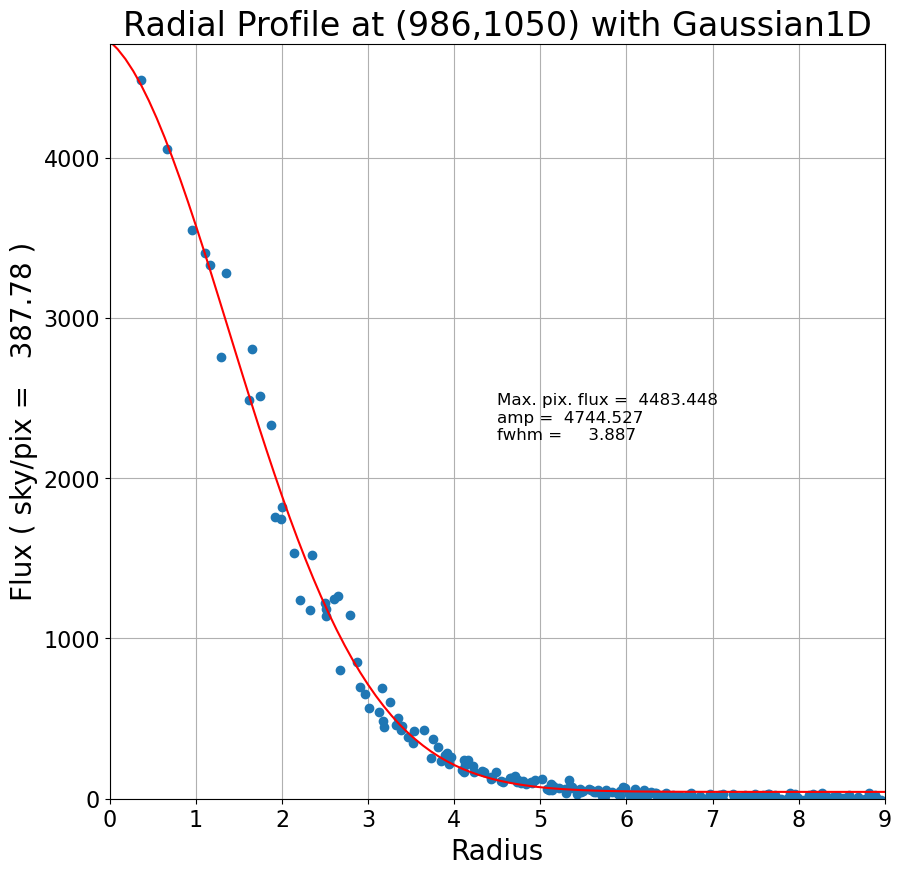

Filter: I
xc=1042.0209	yc=1044.2553


INFO:imexam.util:xc=1042.0209	yc=1044.2553


Background per pixel: 396.7618807427439


INFO:imexam.util:Background per pixel: 396.7618807427439


Max. pix. flux =  6548.176
amp =  6962.623
fwhm =     3.990


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux =  6548.176
amp =  6962.623
fwhm =     3.990


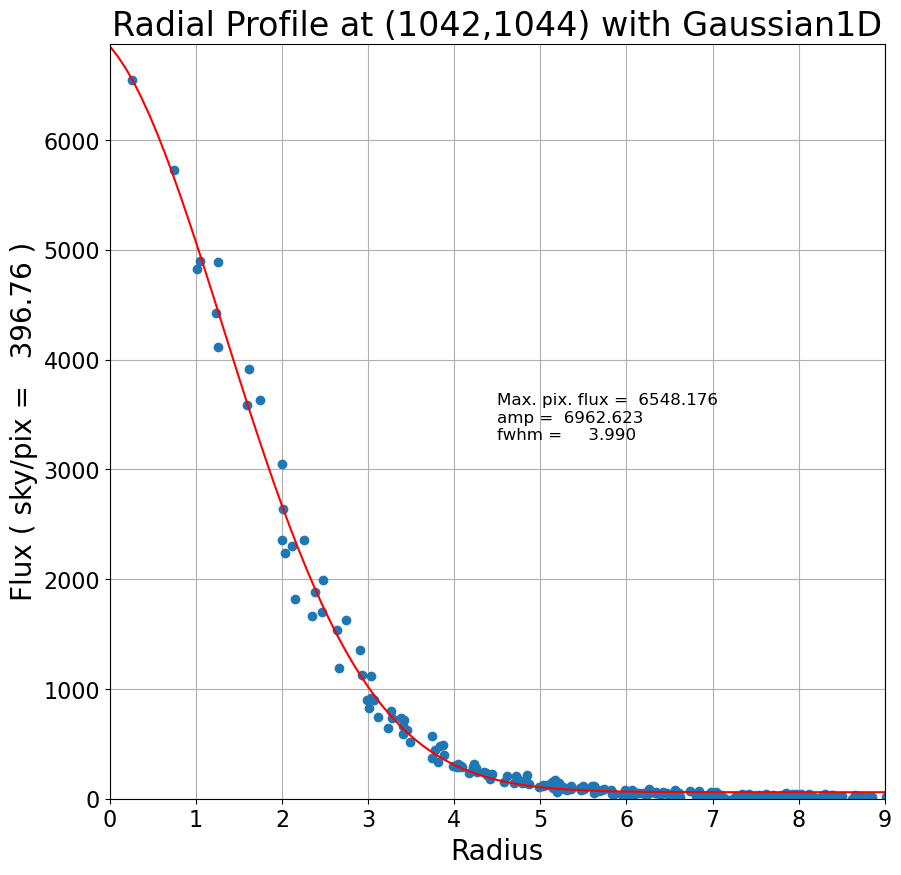

Filter: I
xc=1248.8095	yc=1222.3356


INFO:imexam.util:xc=1248.8095	yc=1222.3356


Background per pixel: 435.7203462510546


INFO:imexam.util:Background per pixel: 435.7203462510546


Max. pix. flux = 55376.964
amp = 60360.601
fwhm =     3.964


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux = 55376.964
amp = 60360.601
fwhm =     3.964


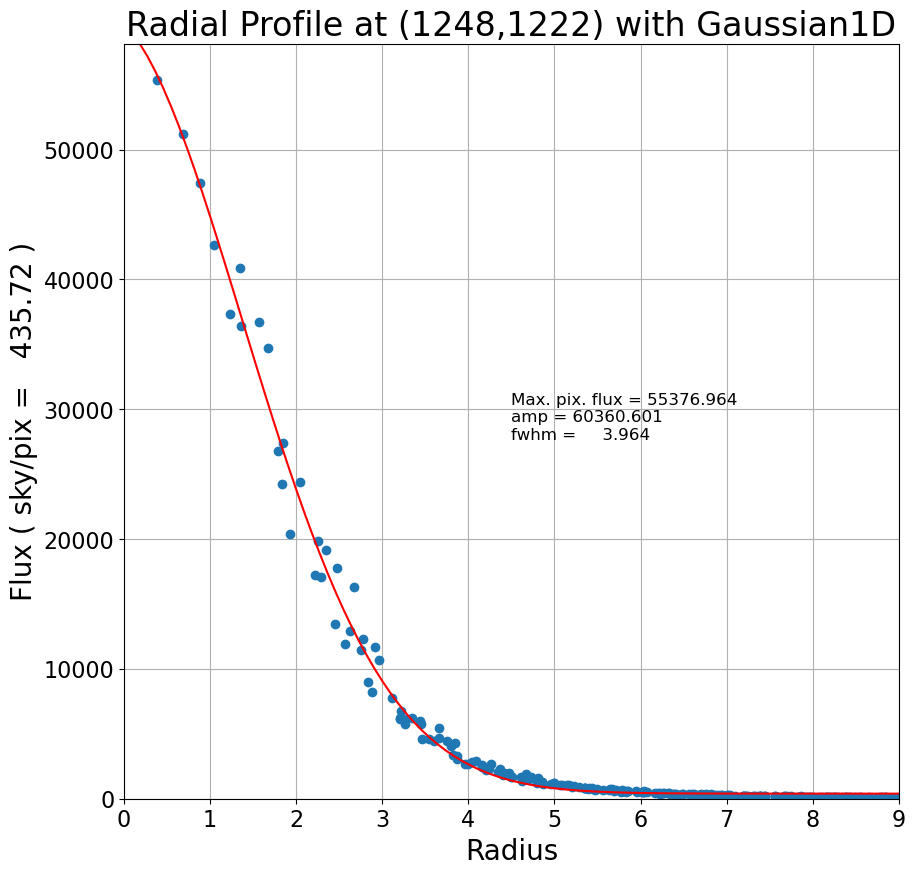

Filter: I
xc=1361.1554	yc=1231.8824


INFO:imexam.util:xc=1361.1554	yc=1231.8824


Background per pixel: 432.819294832891


INFO:imexam.util:Background per pixel: 432.819294832891


Max. pix. flux = 45769.693
amp = 47763.606
fwhm =     3.907


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux = 45769.693
amp = 47763.606
fwhm =     3.907


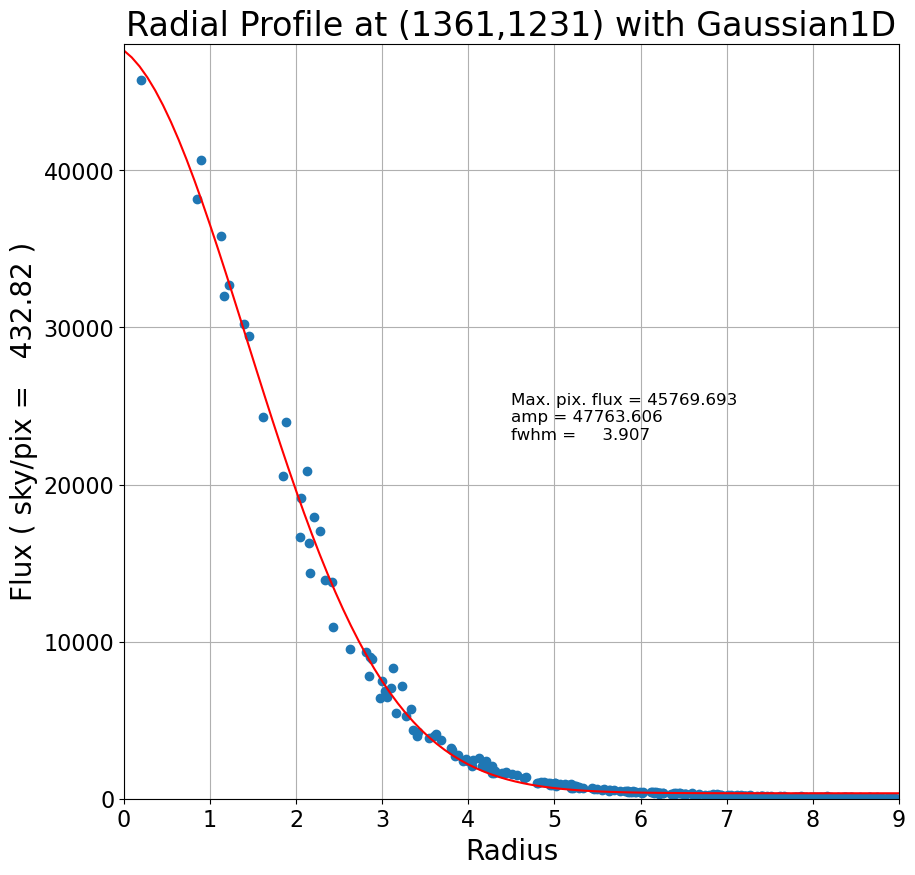

Filter: I
xc=1441.1940	yc=1182.9486


INFO:imexam.util:xc=1441.1940	yc=1182.9486


Background per pixel: 397.7977376617808


INFO:imexam.util:Background per pixel: 397.7977376617808


Max. pix. flux = 19067.338
amp = 19717.459
fwhm =     3.855


/Users/polinapetrov/anaconda3/envs/python37/lib/python3.7/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))
INFO:imexam.util:Max. pix. flux = 19067.338
amp = 19717.459
fwhm =     3.855


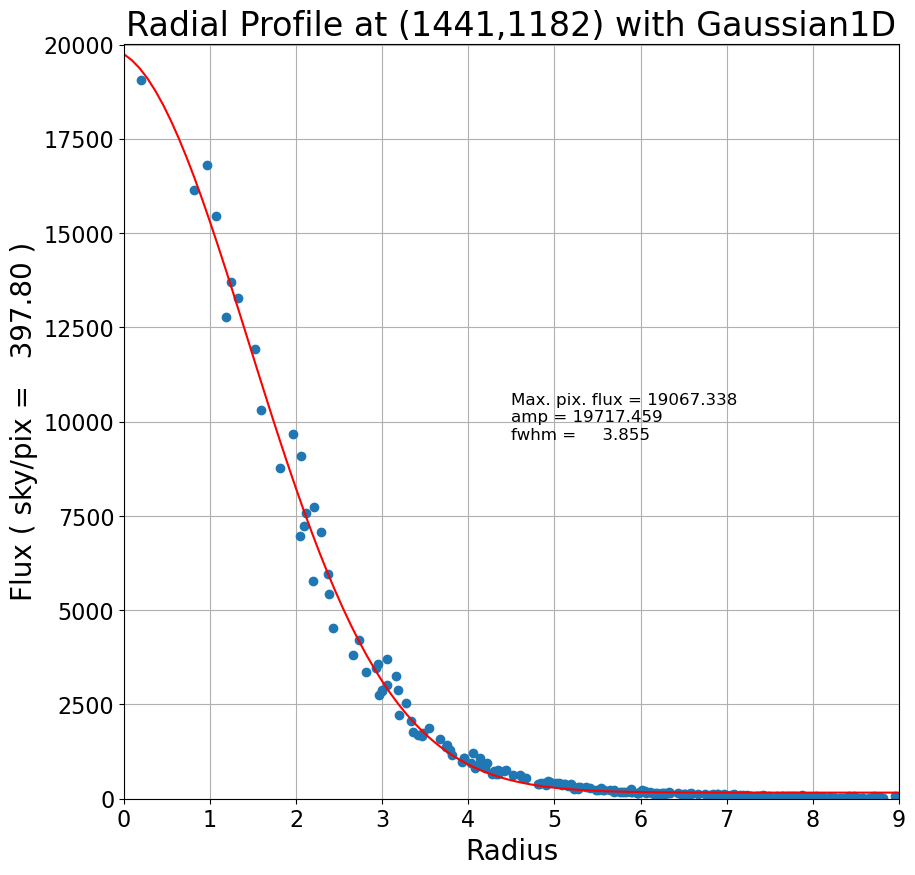

In [95]:
#plotting to look at FWHMs for aperture size
for i in range(0,len(pg1633_data)):
    data_by_filter = pg1633_data[i]
    for j in range(0,len(Xs)):
        print('Filter:',filters[i])
        x_val = star_positions[i][j][0]
        y_val = star_positions[i][j][1]
        plots.radial_profile(x_val,y_val,data_by_filter,genplot=True)

In [102]:
#FWHM values look to be around 4 for all
radius = 4.

#now need to get total count in each filter, for each star
U_aps = [CircularAperture(p, r=radius) for p in star_positions[0]]
U_tables = [aperture_photometry(data, ap) for data,ap in zip(pg1633_data,U_aps)]
U_tot = [table['aperture_sum'][0] for table in U_tables]

B_aps = [CircularAperture(p, r=radius) for p in star_positions[1]]
B_tables = [aperture_photometry(data, ap) for data,ap in zip(pg1633_data,B_aps)]
B_tot = [table['aperture_sum'][0] for table in B_tables]

V_aps = [CircularAperture(p, r=radius) for p in star_positions[2]]
V_tables = [aperture_photometry(data, ap) for data,ap in zip(pg1633_data,V_aps)]
V_tot = [table['aperture_sum'][0] for table in V_tables]

R_aps = [CircularAperture(p, r=radius) for p in star_positions[3]]
R_tables = [aperture_photometry(data, ap) for data,ap in zip(pg1633_data,R_aps)]
R_tot = [table['aperture_sum'][0] for table in R_tables]

I_aps = [CircularAperture(p, r=radius) for p in star_positions[4]]
I_tables = [aperture_photometry(data, ap) for data,ap in zip(pg1633_data,I_aps)]
I_tot = [table['aperture_sum'][0] for table in I_tables]

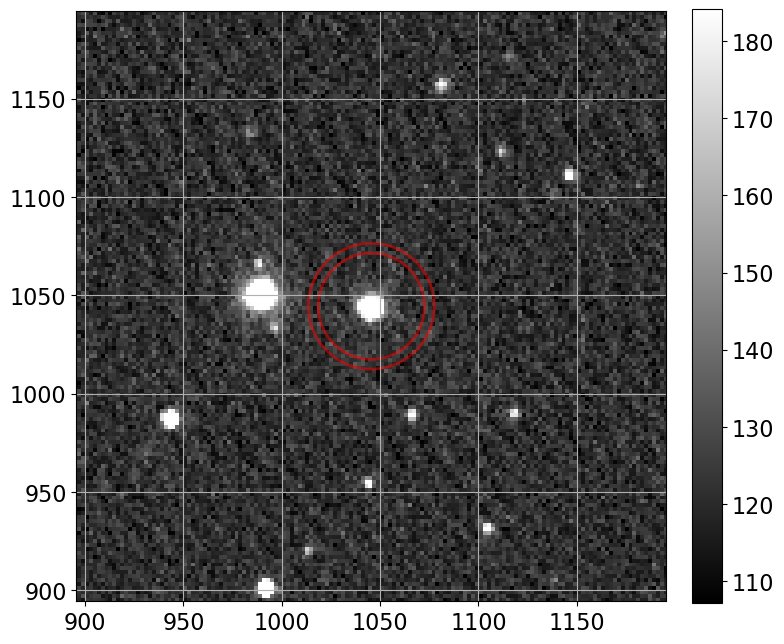

In [129]:
#choosing 1 star around which to get background count
annulus_aper = CircularAnnulus((xA,yA), r_in=27., r_out=32.)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
show_image(pg1633_data[2], cmap='gray', ax=ax1, fig=fig)
annulus_aper.plot(color='red', lw=2, alpha=0.5)
ax1.set_xlim([xA-150,xA+150])
ax1.set_ylim([yA-150,yA+150])
plt.tight_layout()

In [130]:
#calculating mean background
#total counts in the background annulus divided by the area of that annulus

U_backg = aperture_photometry(pg1633_data[0], annulus_aper)['aperture_sum'][0]/annulus_aper.area
B_backg = aperture_photometry(pg1633_data[1], annulus_aper)['aperture_sum'][0]/annulus_aper.area
V_backg = aperture_photometry(pg1633_data[2], annulus_aper)['aperture_sum'][0]/annulus_aper.area
R_backg = aperture_photometry(pg1633_data[3], annulus_aper)['aperture_sum'][0]/annulus_aper.area
I_backg = aperture_photometry(pg1633_data[4], annulus_aper)['aperture_sum'][0]/annulus_aper.area

In [139]:
#calculating signal for each star for each aperture

U_inst_mags = [-2.5*np.log10(T-U_backg*(np.pi*radius**2)) for T in U_tot]
B_inst_mags = [-2.5*np.log10(T-B_backg*(np.pi*radius**2)) for T in B_tot]
V_inst_mags = [-2.5*np.log10(T-V_backg*(np.pi*radius**2)) for T in V_tot]
R_inst_mags = [-2.5*np.log10(T-R_backg*(np.pi*radius**2)) for T in R_tot]
I_inst_mags = [-2.5*np.log10(T-I_backg*(np.pi*radius**2)) for T in I_tot]

stars = ['1','A','B','C','D']

print('Filter:',filters[0])
for j in range(0,5): 
    print('Star '+stars[j]+' mag:',U_inst_mags[j])
print('')
print('Filter:',filters[1])
for j in range(0,5): 
    print('Star '+stars[j]+' mag:',B_inst_mags[j])
print('')
print('Filter:',filters[2])
for j in range(0,5): 
    print('Star '+stars[j]+' mag:',V_inst_mags[j])
print('')
print('Filter:',filters[3])
for j in range(0,5): 
    print('Star '+stars[j]+' mag:',R_inst_mags[j])
print('')
print('Filter:',filters[4])
for j in range(0,5): 
    print('Star '+stars[j]+' mag:',I_inst_mags[j])

Filter: U
Star 1 mag: -12.936319431619907
Star A mag: -12.157246492058007
Star B mag: -14.793802697083828
Star C mag: -14.357486045952205
Star D mag: -12.520324220166831

Filter: B
Star 1 mag: -12.882982325716199
Star A mag: -12.151941428886692
Star B mag: -14.880670263075572
Star C mag: -14.46672504900887
Star D mag: -12.975556086553357

Filter: V
Star 1 mag: -12.74296240214216
Star A mag: -12.095309111191678
Star B mag: -14.896049091599213
Star C mag: -14.499834223833744
Star D mag: -13.311712329788406

Filter: R
Star 1 mag: -12.683085533564984
Star A mag: -12.083222209169914
Star B mag: -14.88905909855374
Star C mag: -14.513593203208018
Star D mag: -13.407469652816335

Filter: I
Star 1 mag: -10.900601266575368
Star A mag: -10.76055779813865
Star B mag: -14.46431978870404
Star C mag: -14.190831612164756
Star D mag: -13.623051787441298


From the previous questions, some things I kept in mind while finding the instrumental magnitudes:
- Higher airmass results in higher FWHM, so best to use images taken with lower airmass. I used the lowest airmass images for PG1633+099, X=1.18
- Stay away from edges of the chip, but didn't need to take this into account as the standard stars were not close to the edge
- Tried not to use images that had very short exposure times
- Looked at FWHM of the stars in each filter, all were roughly around 4 pixels so I used that value as my aperture radius

The instrumental magnitudes for each standard star in each filter are listed above. Of course, these magnitudes are too low (too bright) as they still need to be converted into AB magnitudes. In each filter, stars B and C have the brightest magnitudes, followed by star D and then stars 1 and A; the stars' magnitudes relative to each other seem to match up well with the relative brightnesses I can see in the images, so it looks like I'm on the right track here.